# cygnus-target-cache

Analyze behavior of Cygnus when performing action sampling + with a realistic Target Cache.


In [1]:
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

from utils import plots, stats, tables, utils

In [2]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    #'L2C_pf_issued',
]
features = [
    {'Delta_Path', 'PC_Delta'},
]
baselines = ['spp_dev2', 'bingo', 'spp_ppf_dev']
dpi = 192
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

targetcache_dirs = [
    "degreedyn/cygnus/bwaware3_width_moreactions_targetcache",
]
targetcache_schemes = [
    "16set_4way_1triggers",
    "16set_4way_4triggers",
    "32set_4way_1triggers",
    "32set_4way_4triggers",
    "64set_4way_1triggers",
    "64set_4way_2triggers",
    "64set_4way_4triggers",
    "128set_4way_1triggers",
    "128set_4way_2triggers",
    "128set_4way_4triggers",
    "256set_4way_1triggers",
    "256set_4way_4triggers"
]

prefetchcache_dirs = [
    "degreedyn/cygnus/bwaware3_width_moreactions_prefetchcache",
]
prefetchcache_schemes = [
    "8set_4way_1triggers",
    "16set_4way_1triggers",
    "32set_4way_1triggers",
    "64set_4way_1triggers",
    "128set_4way_1triggers",
    "256set_4way_1triggers",
]

tagbits_dirs = [
    "degreedyn/cygnus/bwaware3_width_moreactions_tagbits",
]
tagbits_schemes = [
    "1bits", "2bits", "4bits", "6bits", "8bits", "10bits", "12bits", "14bits",
    "16bits", "18bits", "20bits"
]

# Plots (suites)

In [9]:
dfs = {
    # ===
    # ===== Degree 1 =====
    # ===
    # Baselines
    'degree1/baseline': tables.load_stats_csv(
        base_dir, 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    # Pythia
    'degree1/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/bwaware3.csv', 
        features),

    # Cygnus
    # 'degree1/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3.csv', 
    #     features, feature_key='cygnus_features'),

    # Cygnus-Ignore
    'degree1/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/cygnus/bwaware3_ignorequeued.csv', 
        features, feature_key='cygnus_features'),

    # Pythia-Ignore
    # 'degree1/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3_pythialike_ignorequeued.csv', 
    #     features, feature_key='cygnus_features'),

    # ===
    # ===== Dynamic degree =====
    # ===
    # Baselines
    'degreedyn/baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    # Pythia
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    # Cygnus
    # 'degreedyn/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3.csv',
    #     features, feature_key='cygnus_features'),

    # Cygnus-Ignore
    'degreedyn/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_ignorequeued.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width (all actions, tuned threshold)
    'degreedyn/cygnus/bwaware3_width_moreactions': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_threshold/-3.0prefetch.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width (1 sample, tuned threshold)
    'degreedyn/cygnus/bwaware3_width_moreactions_sampling/1random': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_sampling/1random.csv',
        features, feature_key='cygnus_features'),

    # Pythia-Ignore
    # 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued.csv',
    #     features, feature_key='cygnus_features'),

    # Pythia-Width
    # 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions.csv',
    #     features, feature_key='cygnus_features'), 
}

for dir in targetcache_dirs:
    for samp in targetcache_schemes:
        dfs[f'{dir}/{samp}'] = tables.load_stats_csv_pythia(
            base_dir, f'{dir}/{samp}.csv', features, feature_key='cygnus_features')
        
for dir in prefetchcache_dirs:
    for samp in prefetchcache_schemes:
        dfs[f'{dir}/{samp}'] = tables.load_stats_csv_pythia(
            base_dir, f'{dir}/{samp}.csv', features, feature_key='cygnus_features')

for dir in tagbits_dirs:
    for samp in tagbits_schemes:
        dfs[f'{dir}/{samp}'] = tables.load_stats_csv_pythia(
            base_dir, f'{dir}/{samp}.csv', features, feature_key='cygnus_features')

## Target Cache
Unless otherwise noted:
- 1 random sample
- Ideal prefetch cache

In [10]:
feature = 'Delta_Path, PC_Delta'
degreedyn_1core_config = 'bwaware3'


degreedyn_1core_tc_df = {
    # f'Pythia ': dfs[f'degreedyn/pythia/{degreedyn_1core_config}'][feature],
    # f'Pythia-Ignore ': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_pythialike_ignorequeued'][feature],
    # f'Pythia-Width ': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_pythialike_width_moreactions'][feature],
    # f'Cygnus': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}'][cygnus_feature],

    f'16 sets (144 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/16set_4way_1triggers'][feature],
    #f'16-4-4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/16set_4way_4triggers'][feature],

    f'32 sets (288 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/32set_4way_1triggers'][feature],
    #f'32-4-4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/32set_4way_4triggers'][feature],
    
    f'64 sets* (576 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/64set_4way_1triggers'][feature],
    #f'64-4-2': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/64set_4way_2triggers'][feature],
    #f'64-4-4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/64set_4way_4triggers'][feature],
    
    f'128 sets (1.125 KiB)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/128set_4way_1triggers'][feature],
    #f'128-4-2': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/128set_4way_2triggers'][feature],
    #f'128-4-4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/128set_4way_4triggers'][feature],
    
    f'256 sets (2.25 KiB)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/256set_4way_1triggers'][feature],
    #f'256-4-4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/256set_4way_4triggers'][feature],

    f'Ideal': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/1random'][feature],
    #f'Ideal, All Samples': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions'][feature],

    #'SPP+PPF': dfs['degreedyn/baseline']['spp_ppf_dev'],
}

degreedyn_1core_tc_colors = {
    f'16 sets (144 B)': colormaps['Greens'](0.35),
    f'32 sets (288 B)': colormaps['Greens'](0.475),
    f'64 sets* (576 B)': 'tab:red', #colormaps['Greens'](0.6),
    f'128 sets (1.125 KiB)': colormaps['Greens'](0.725),
    f'256 sets (2.25 KiB)': colormaps['Greens'](0.85),

    f'Ideal':  colormaps['Greens'](1.0),
    #f'Unlimited TC, All Samples': colormaps['Oranges'](0.6),

    'SPP+PPF': 'darkturquoise'
}

degreedyn_1core_tc_legend_kwargs = {
    'ncol': 2,
    'fontsize': 8,
    'loc': 'lower center',
    'framealpha': 0,
    'bbox_to_anchor': (0.5, 1.0),
}

degreedyn_1core_tc_suptitle = '512 KB, dynamic degree, 1 core'

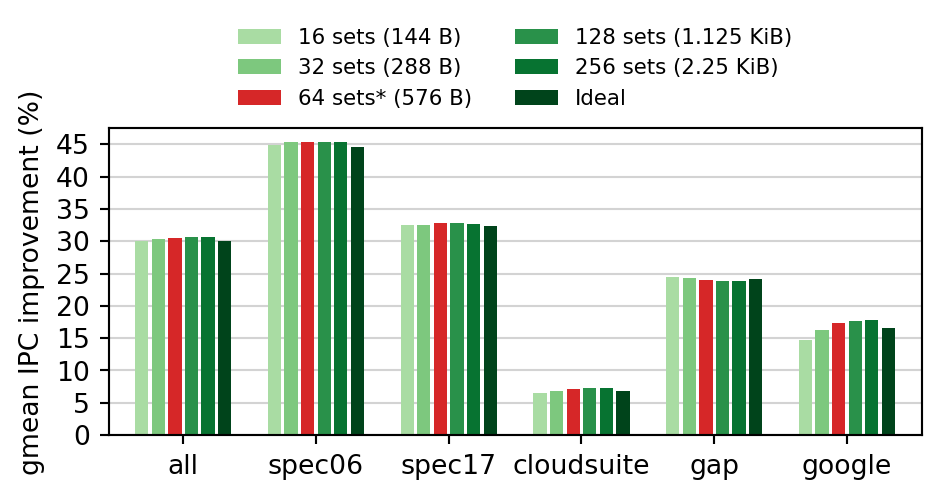

In [39]:
plots.plot_metric_means(degreedyn_1core_tc_df, suites=suites, metric='ipc_improvement', 
                        colors=degreedyn_1core_tc_colors,
                        legend_kwargs=degreedyn_1core_tc_legend_kwargs, 
                        dpi=192, figsize=(5, 2.7),
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 47.5),
                        add_suptitle=False,
                        add_xlabel=False)

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


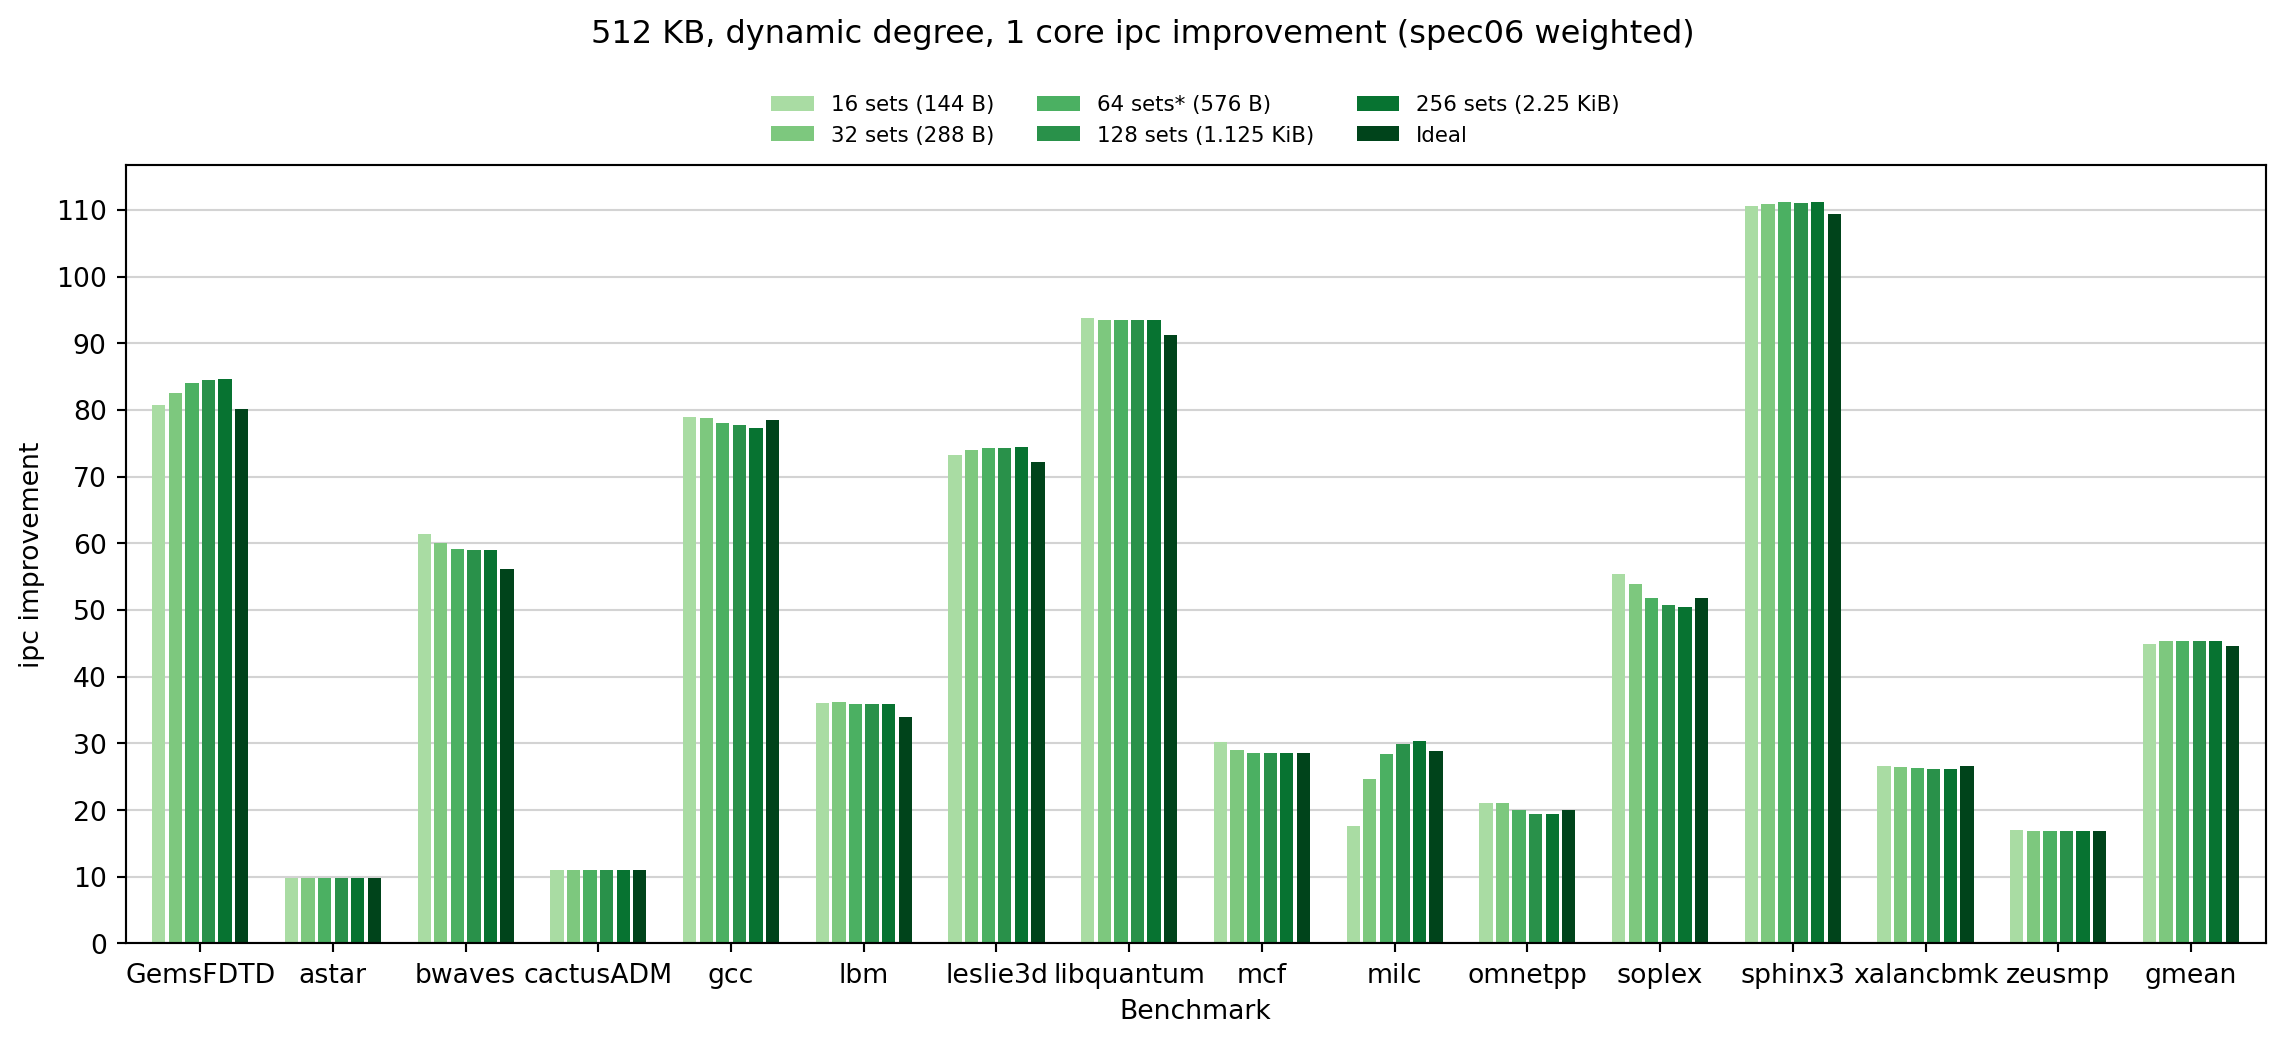

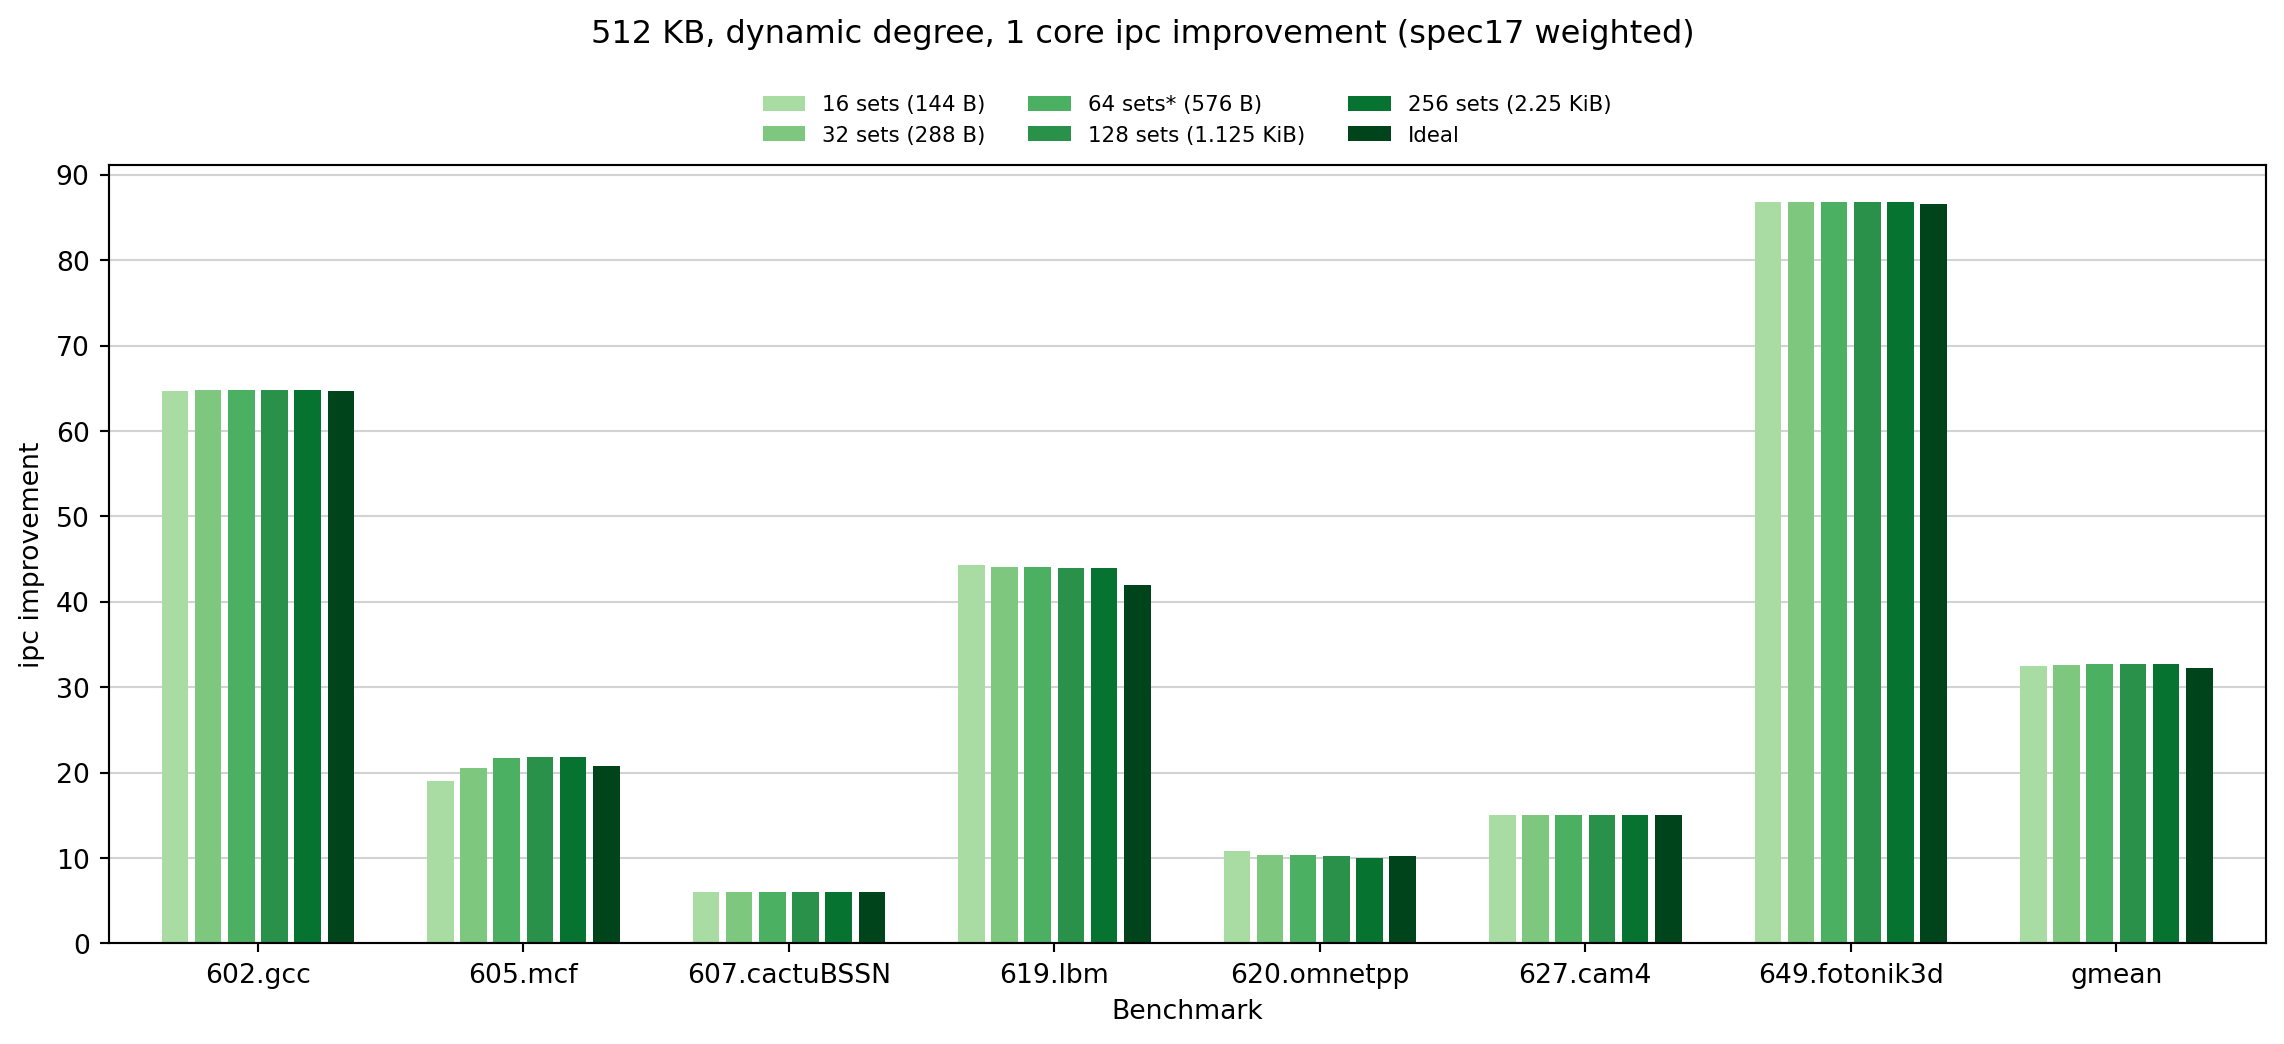

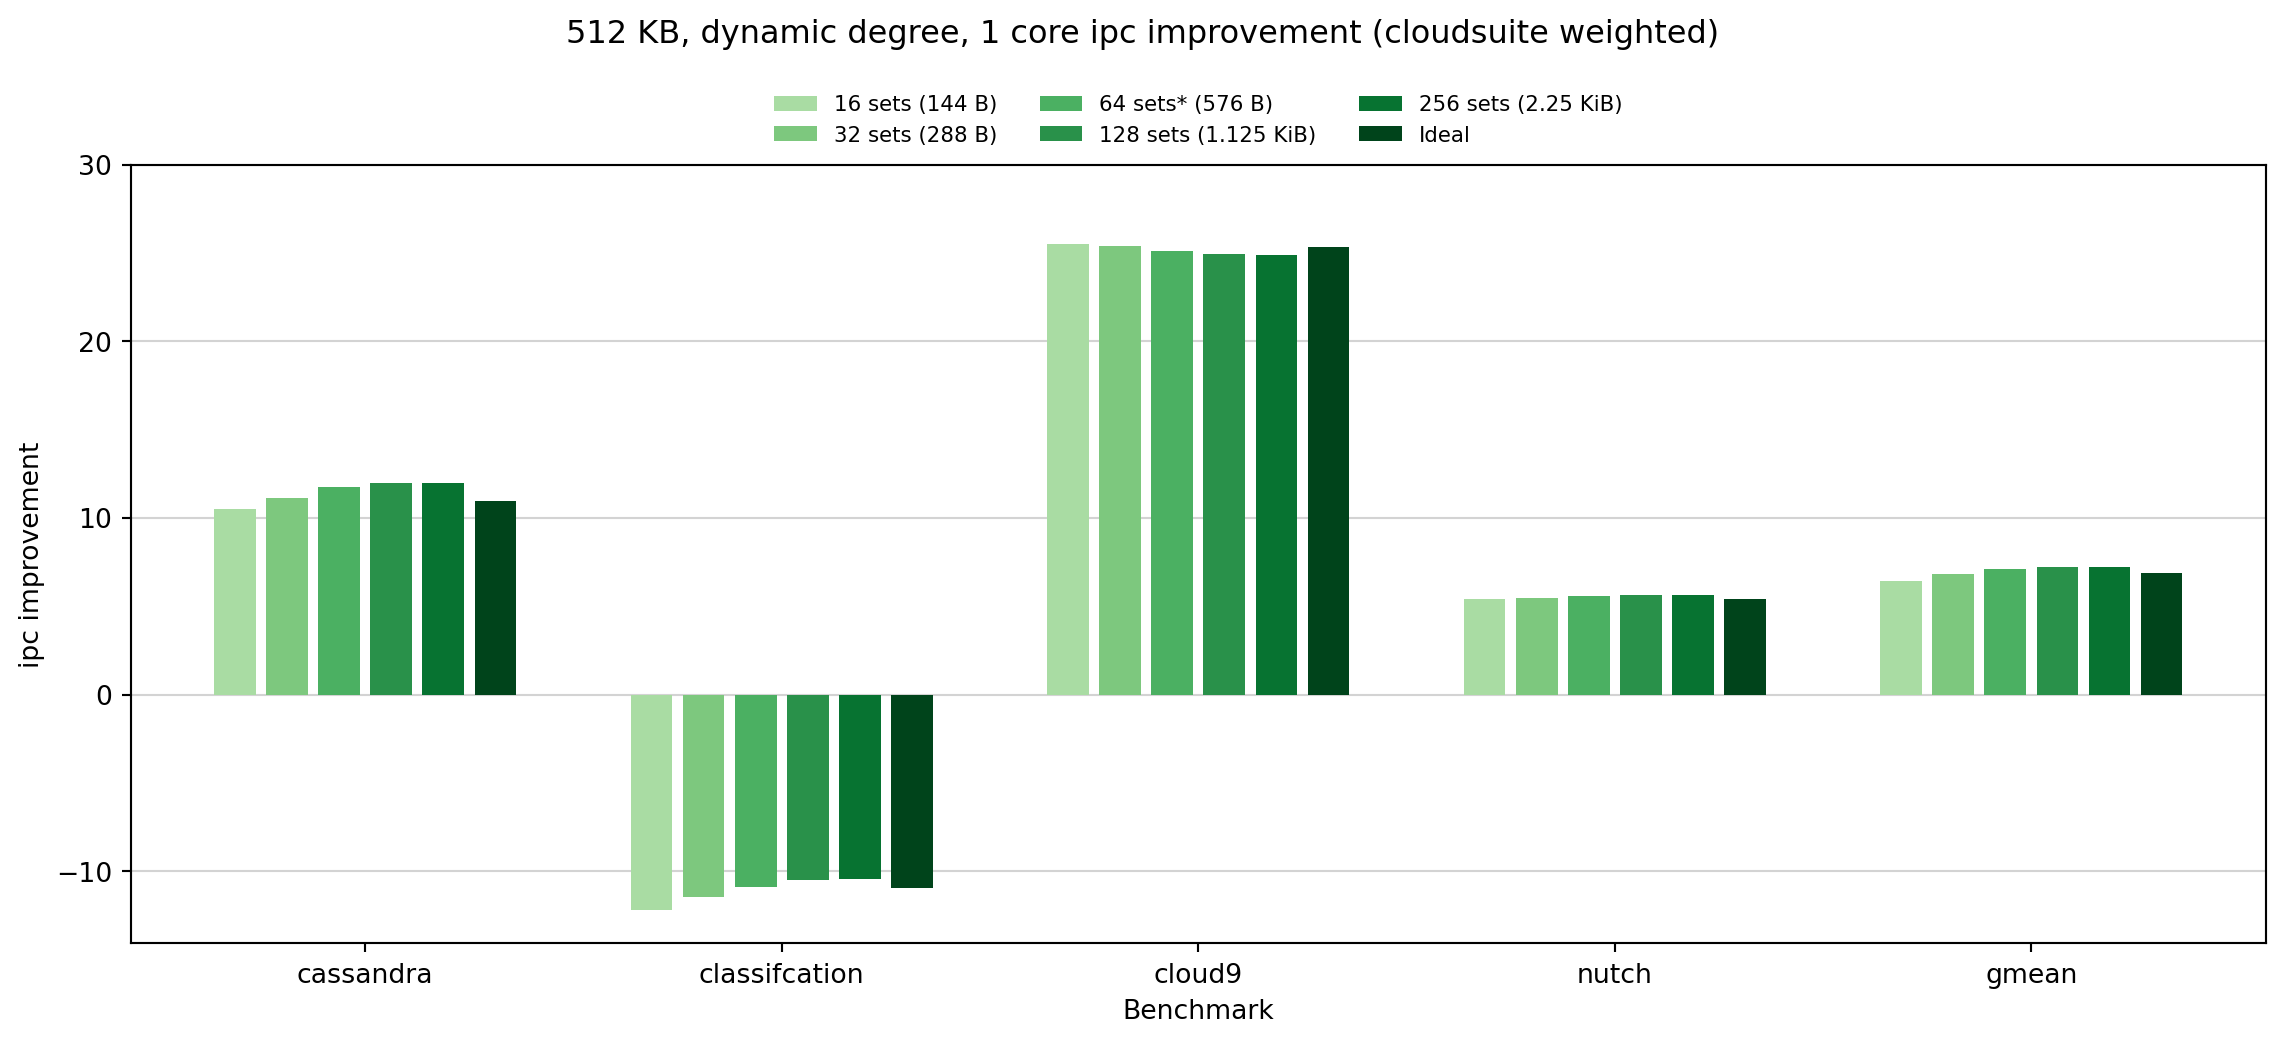

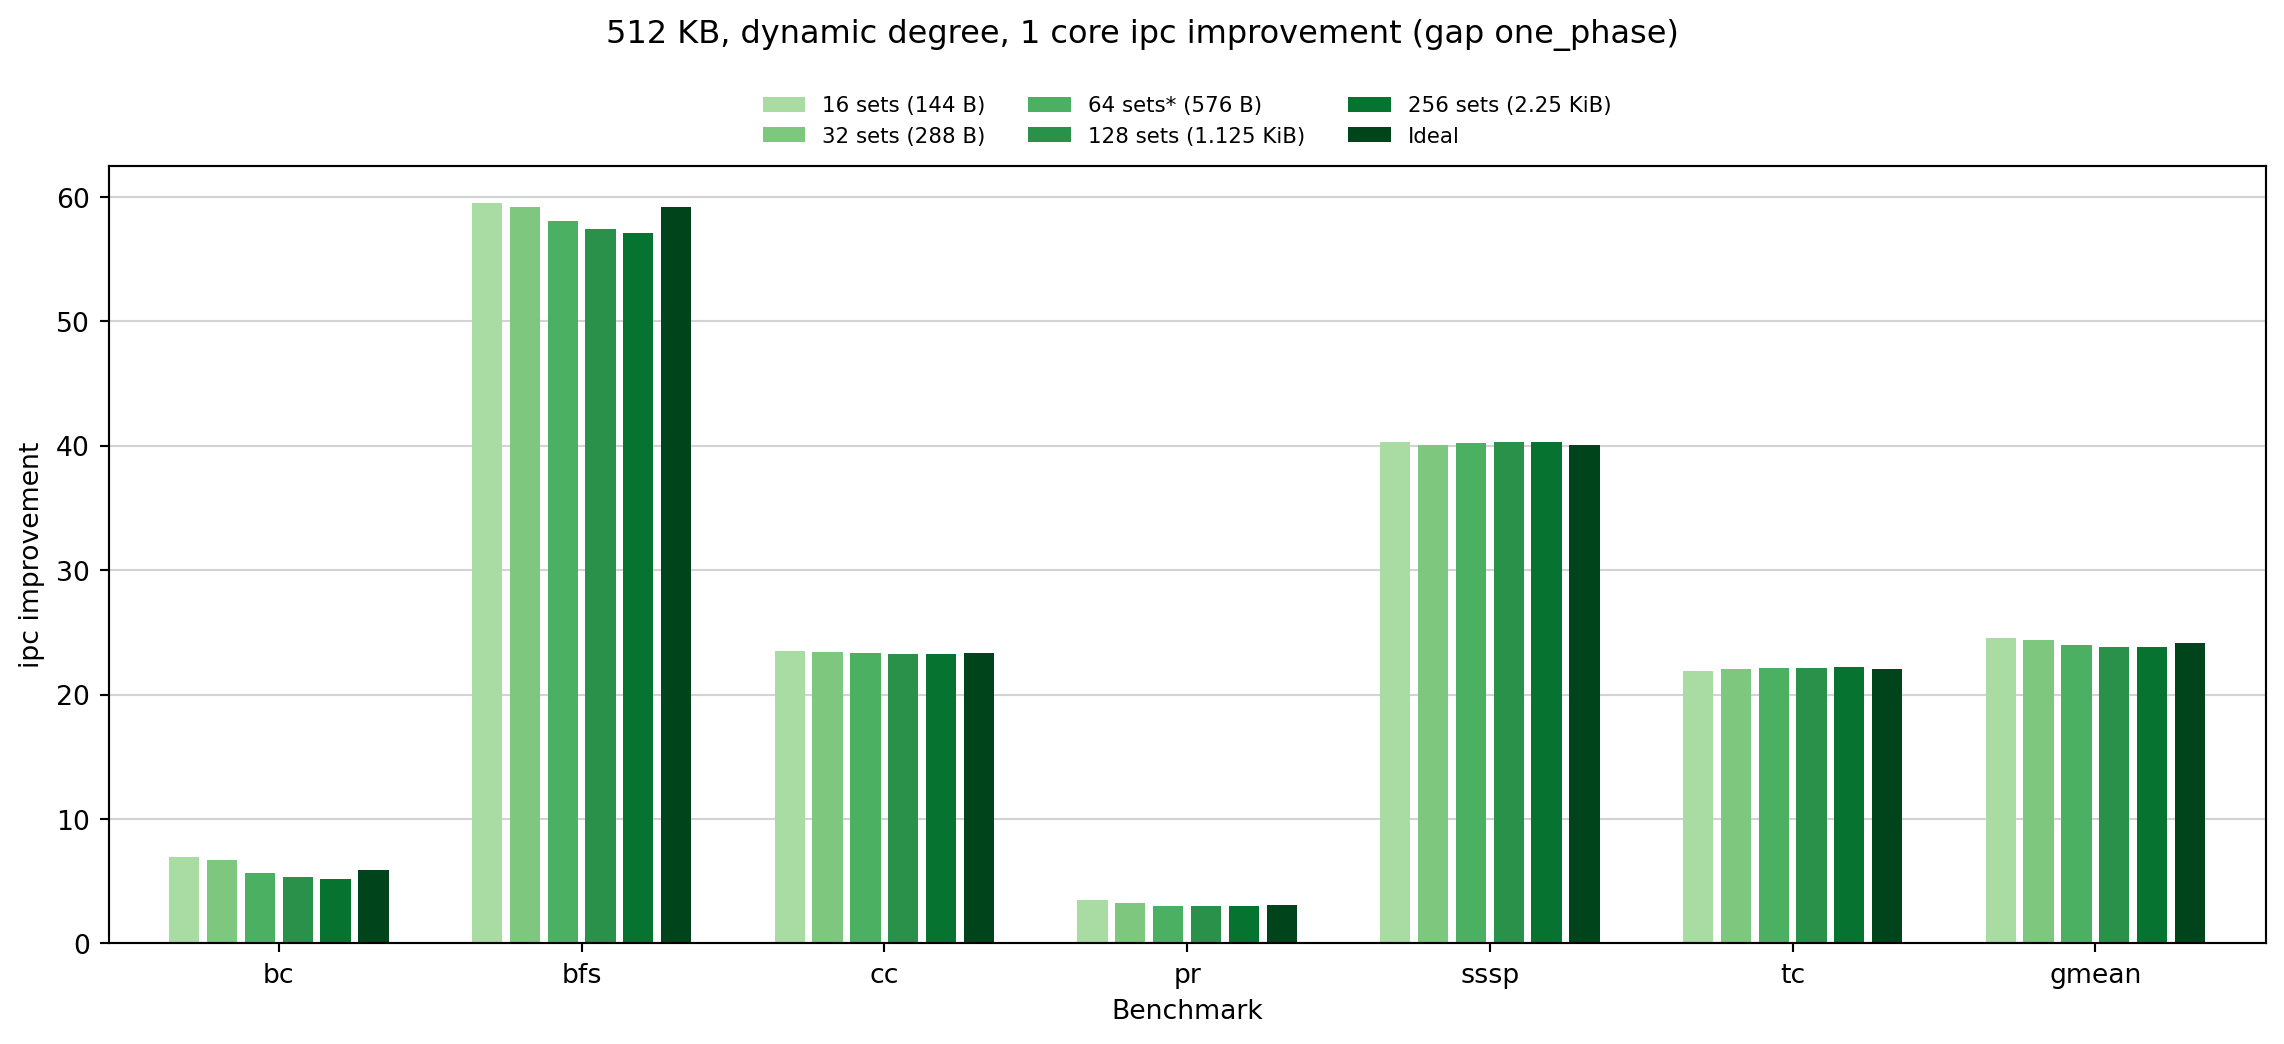

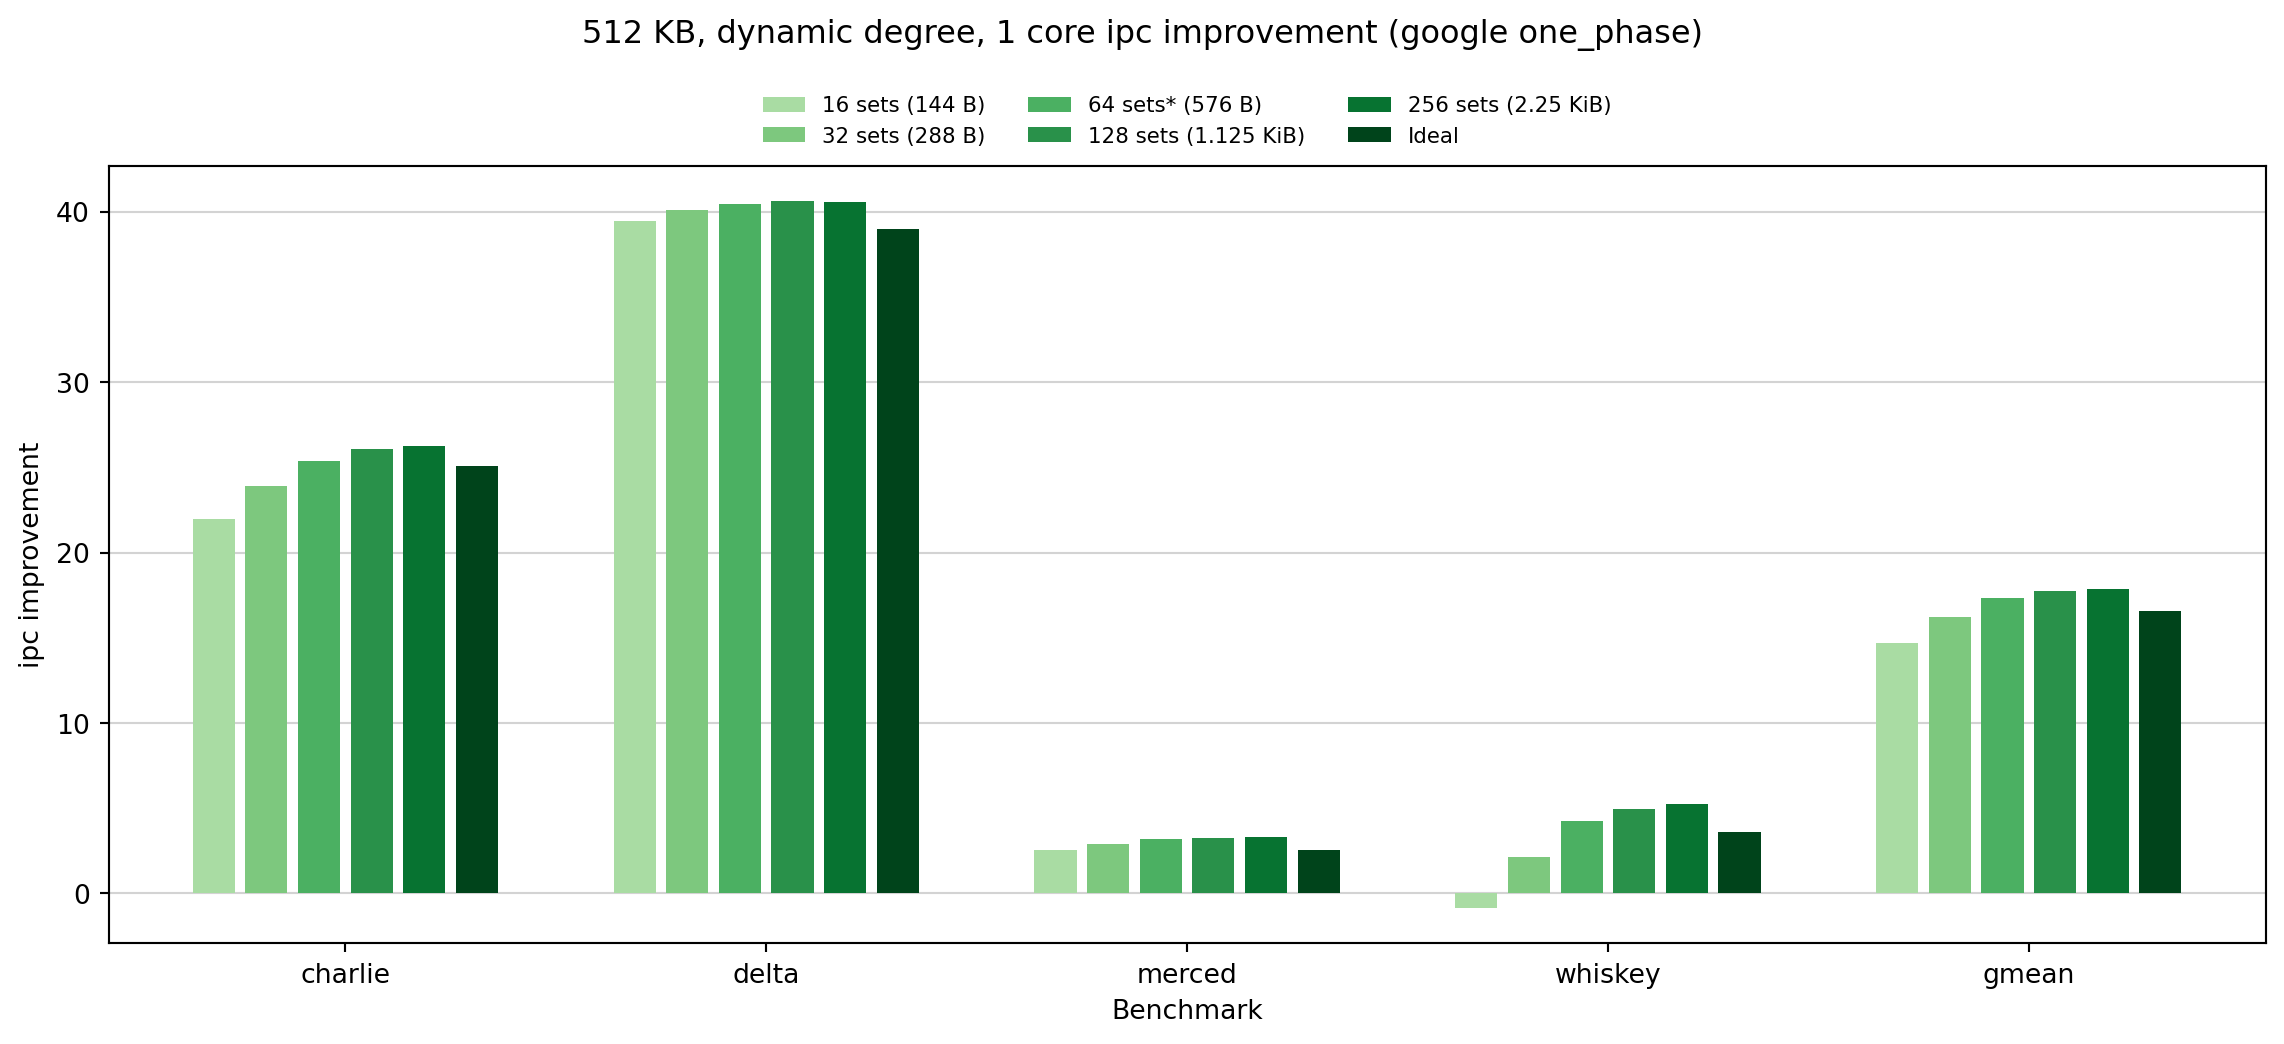

In [49]:
plots.plot_everything(degreedyn_1core_tc_df, suites=suites, metrics=metrics, 
                      colors=degreedyn_1core_tc_colors,
                      legend_kwargs=degreedyn_1core_tc_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_tc_suptitle)

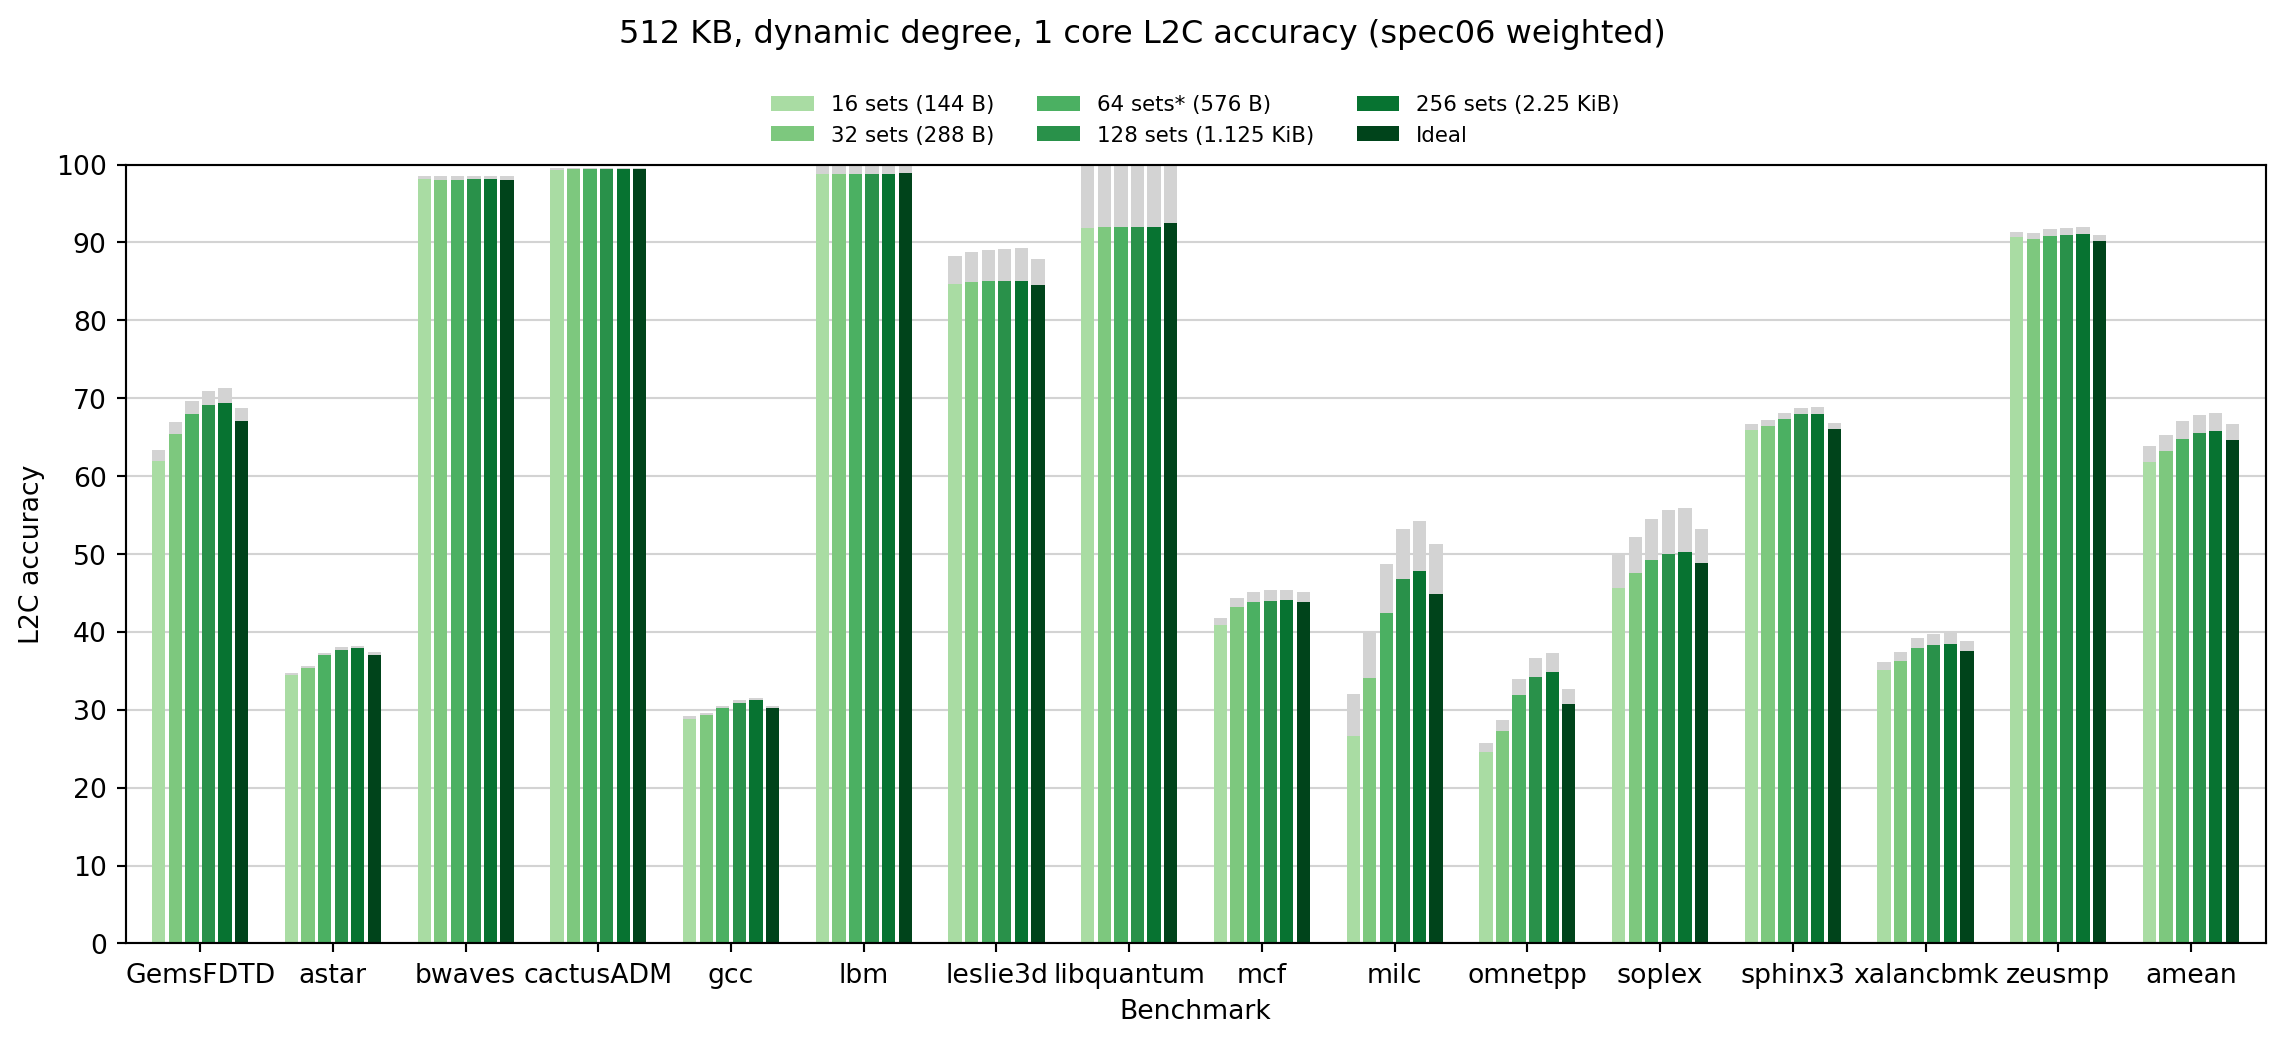

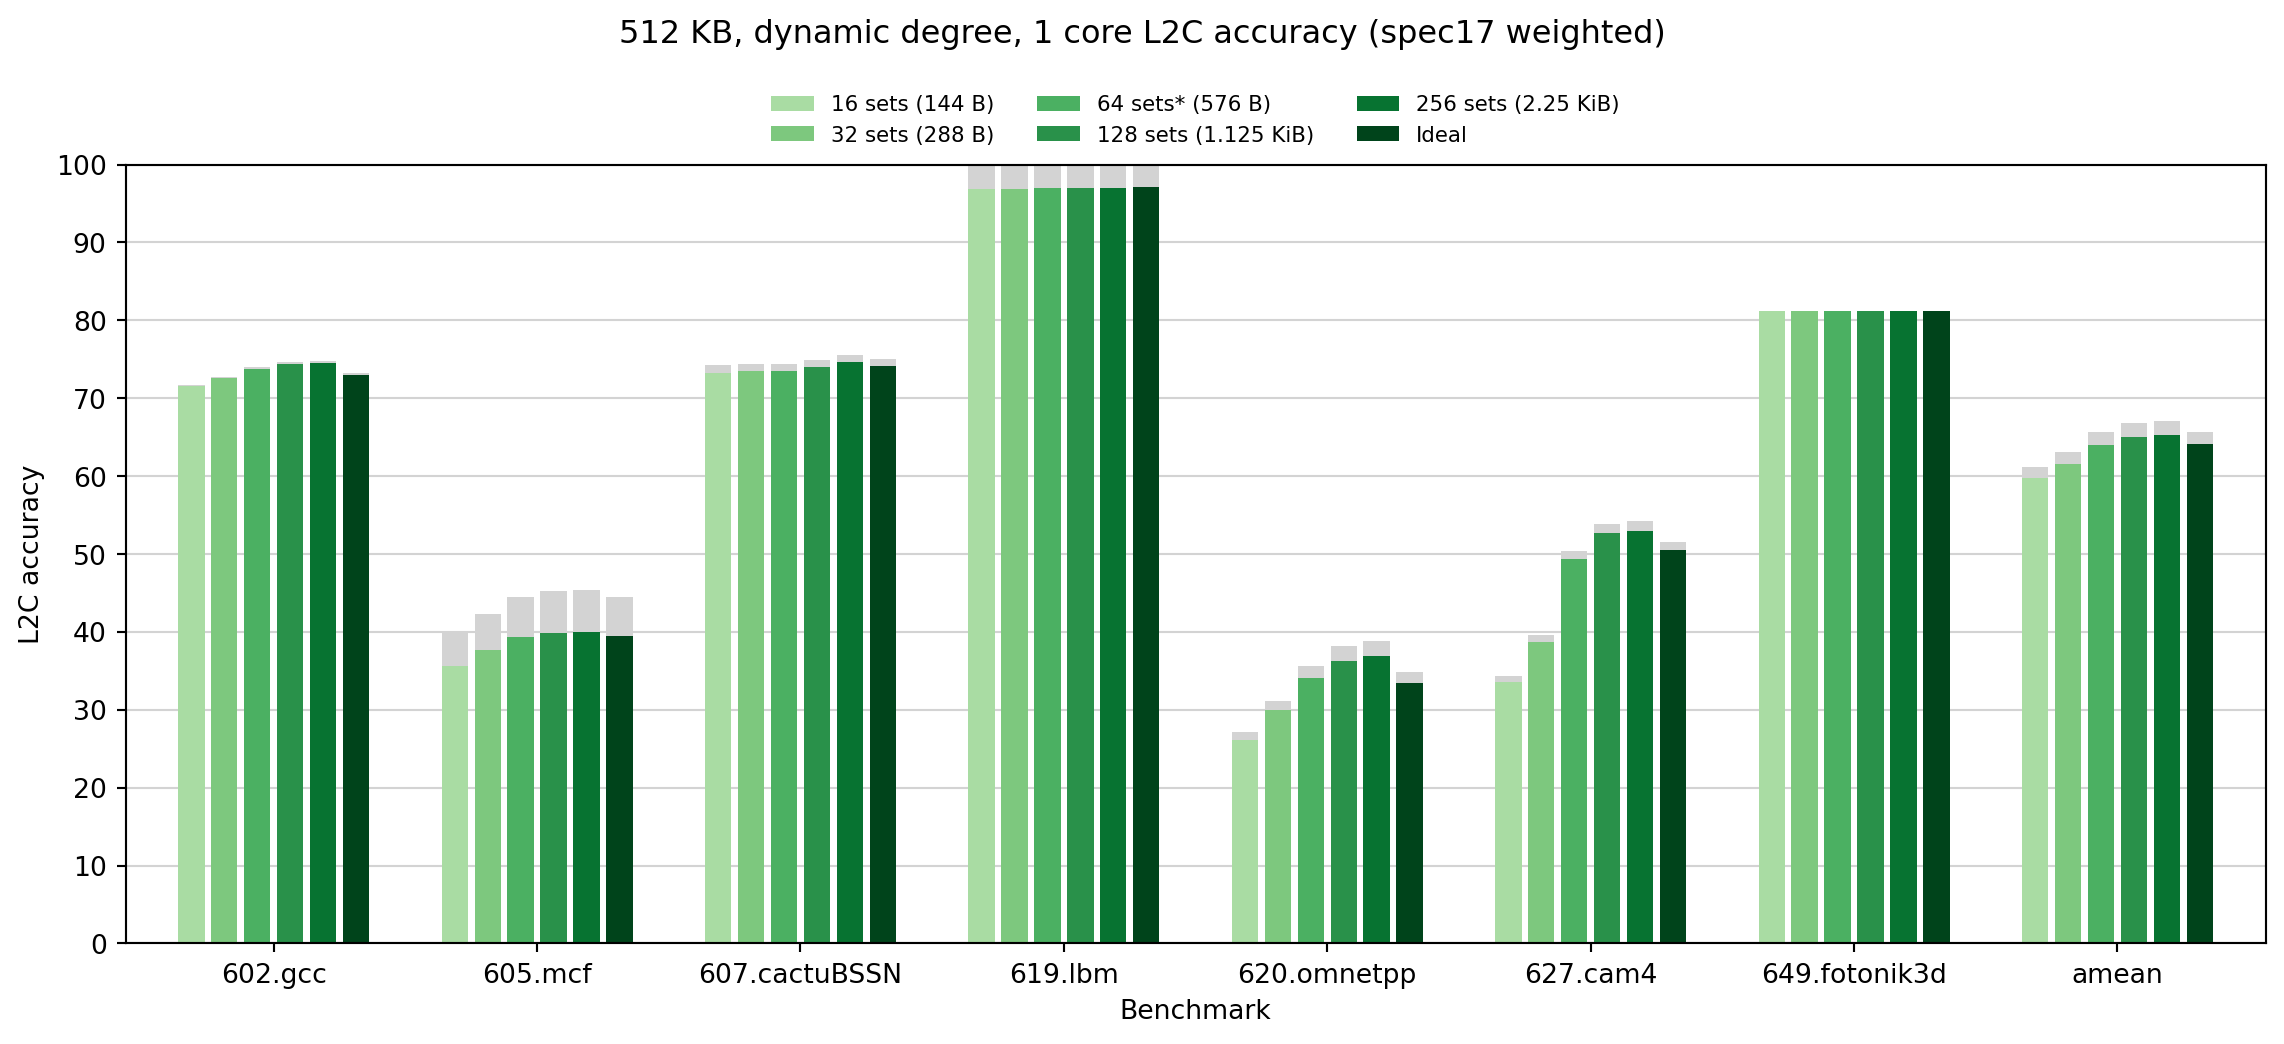

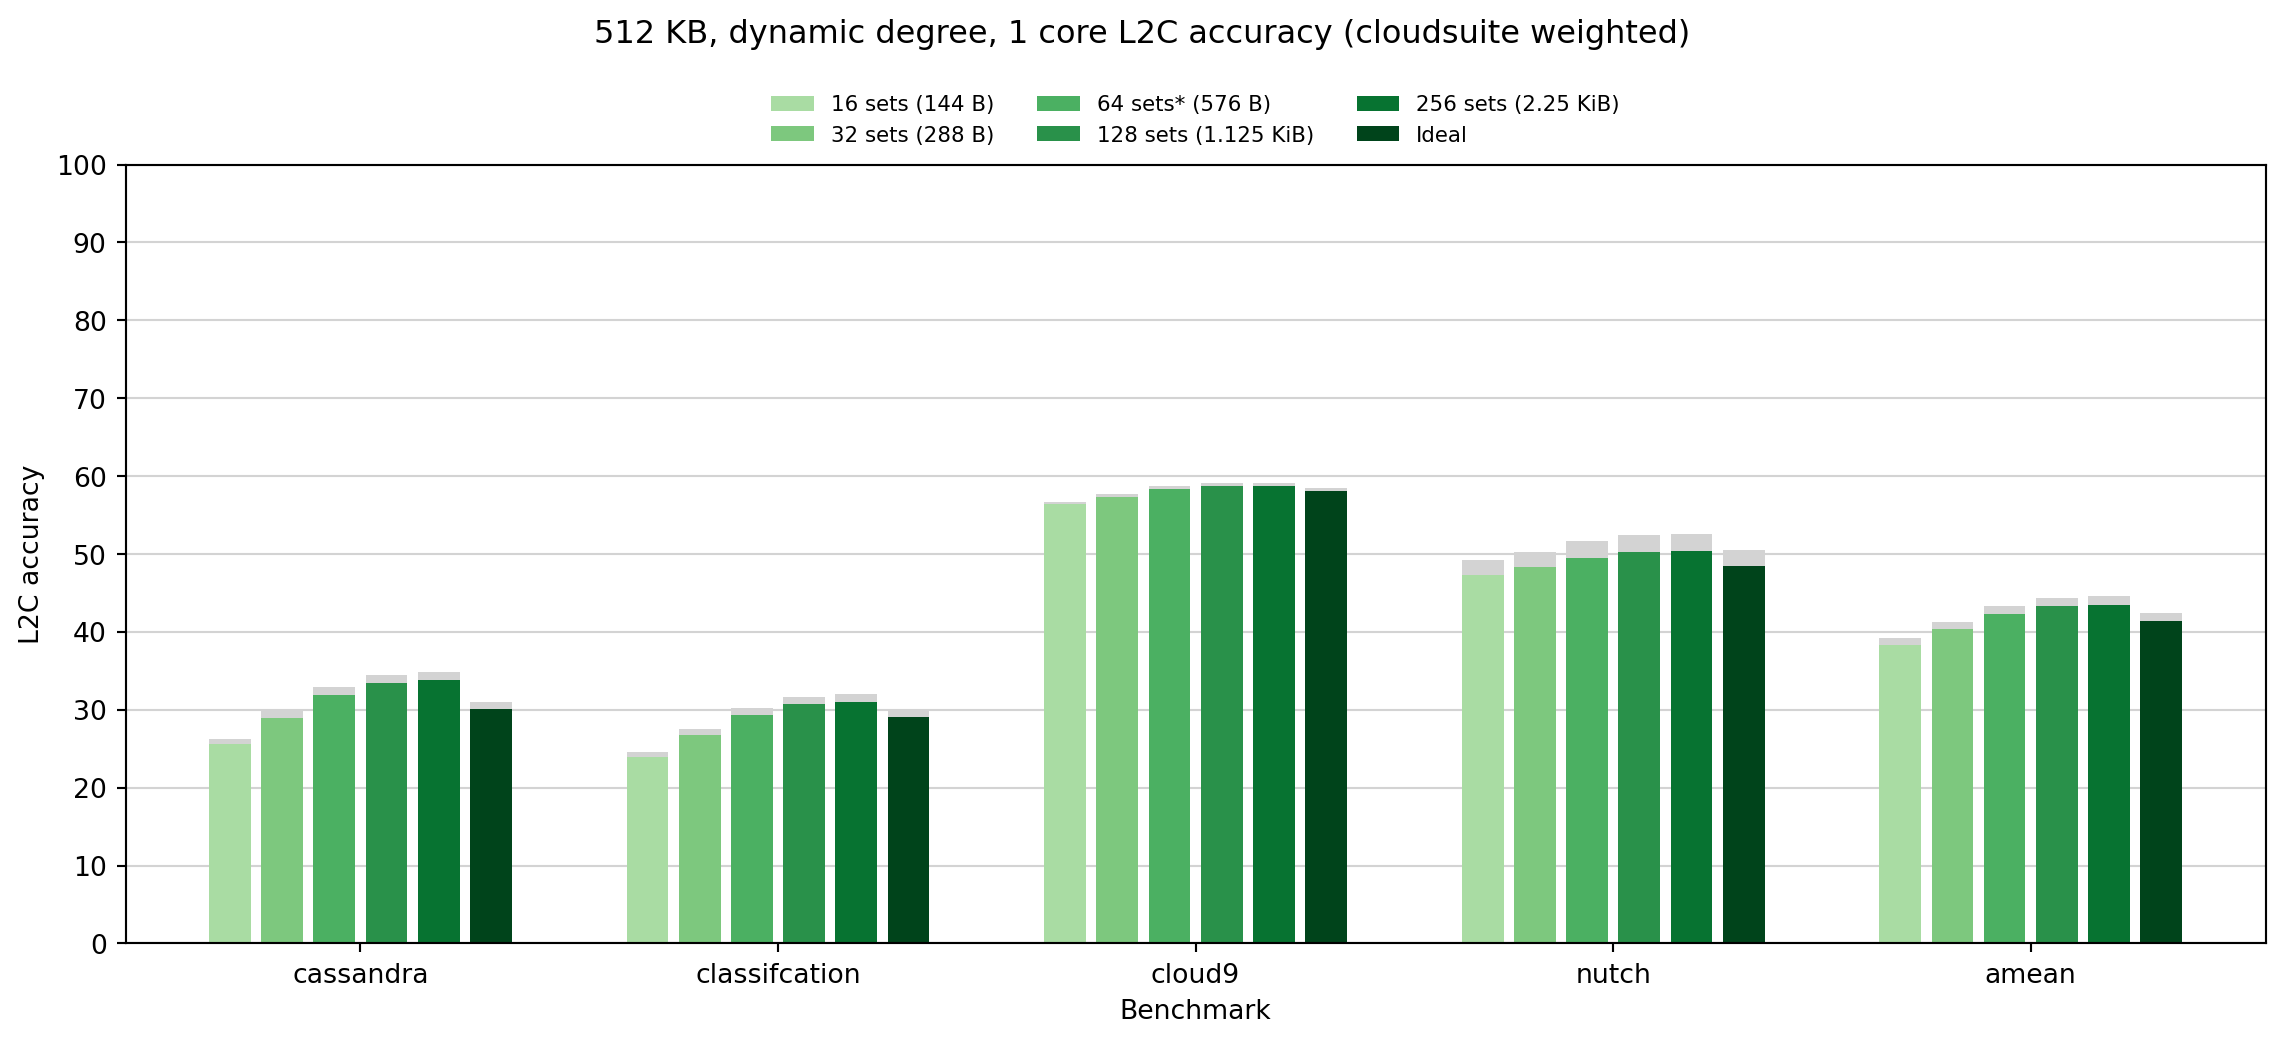

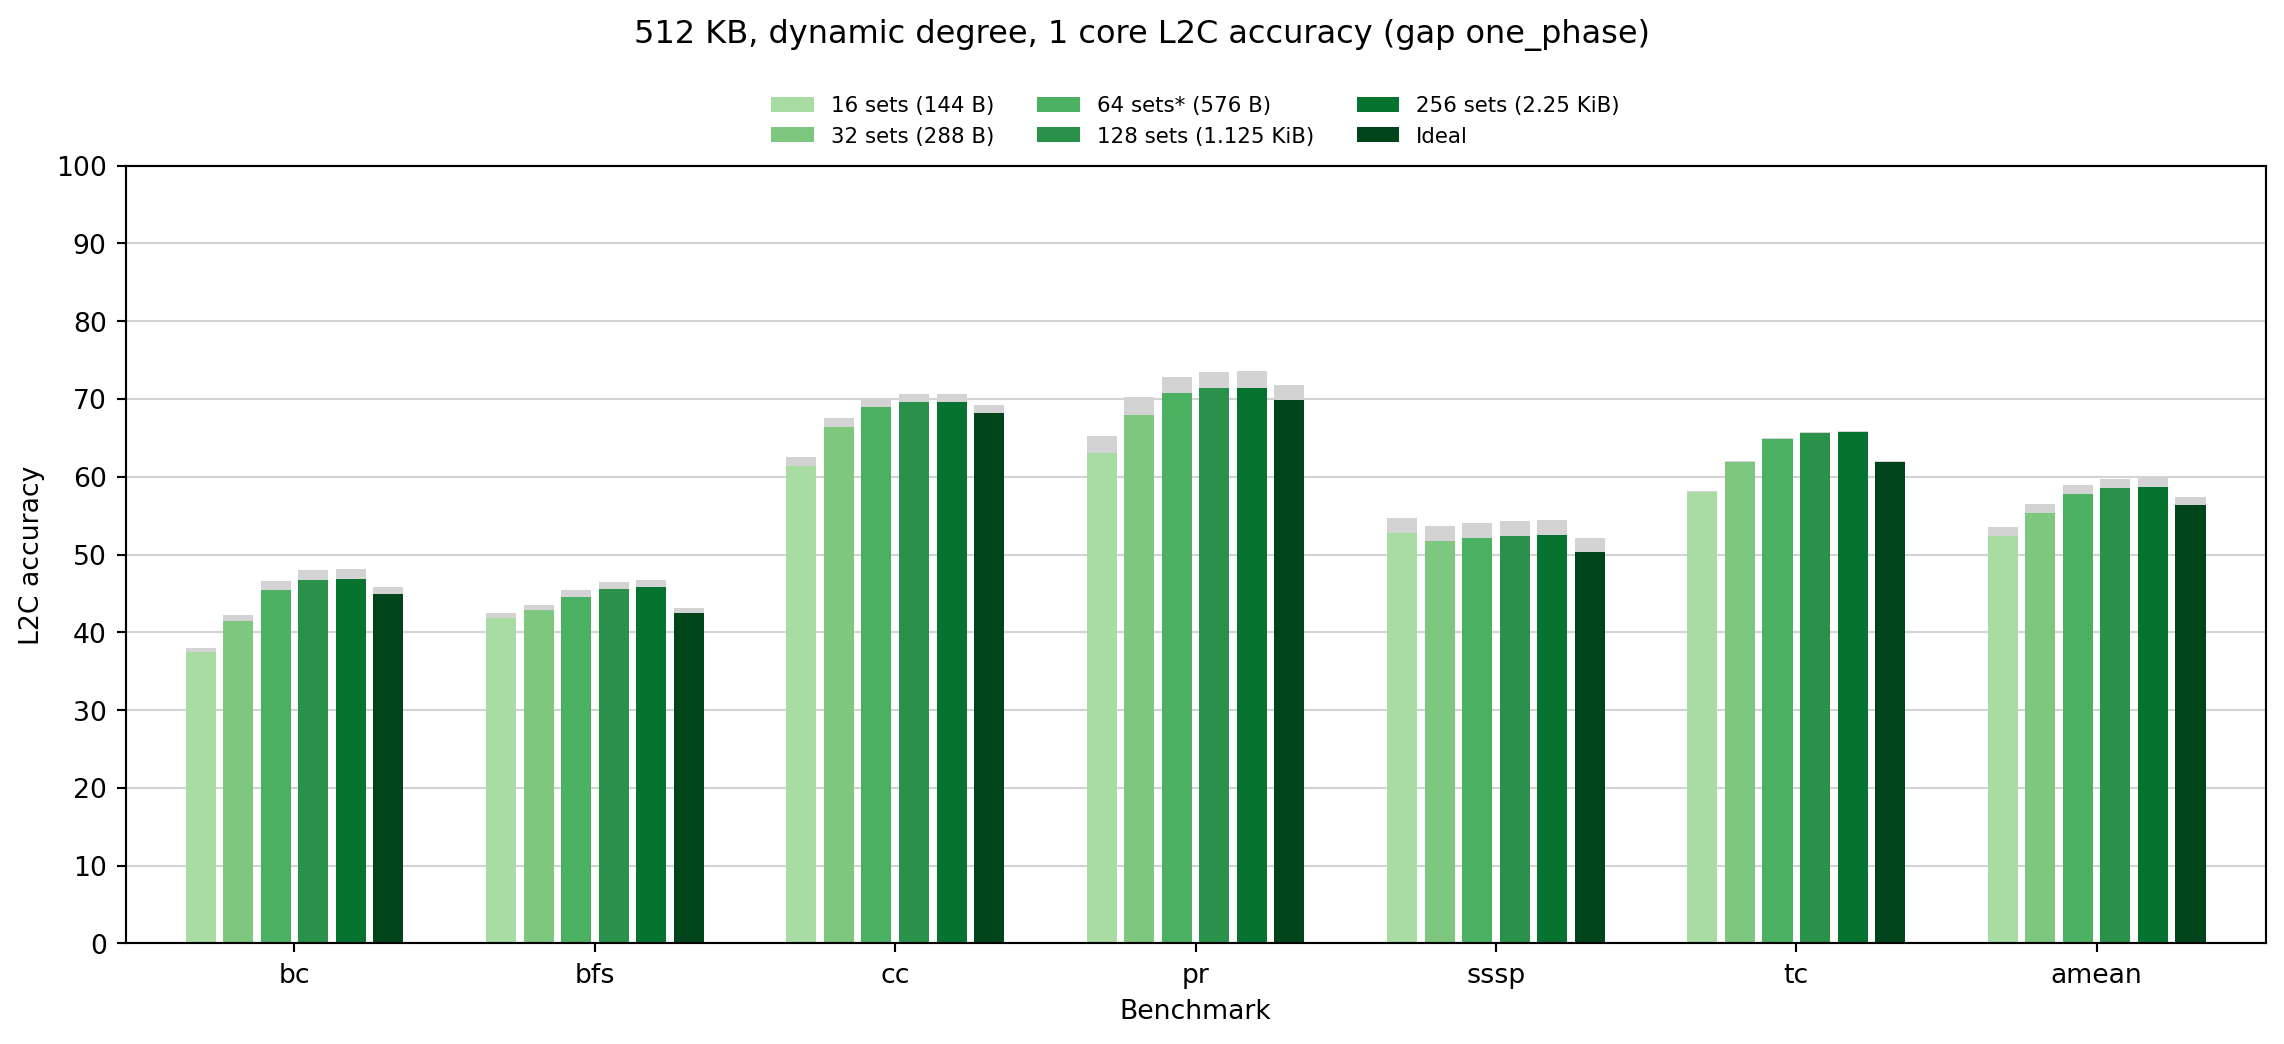

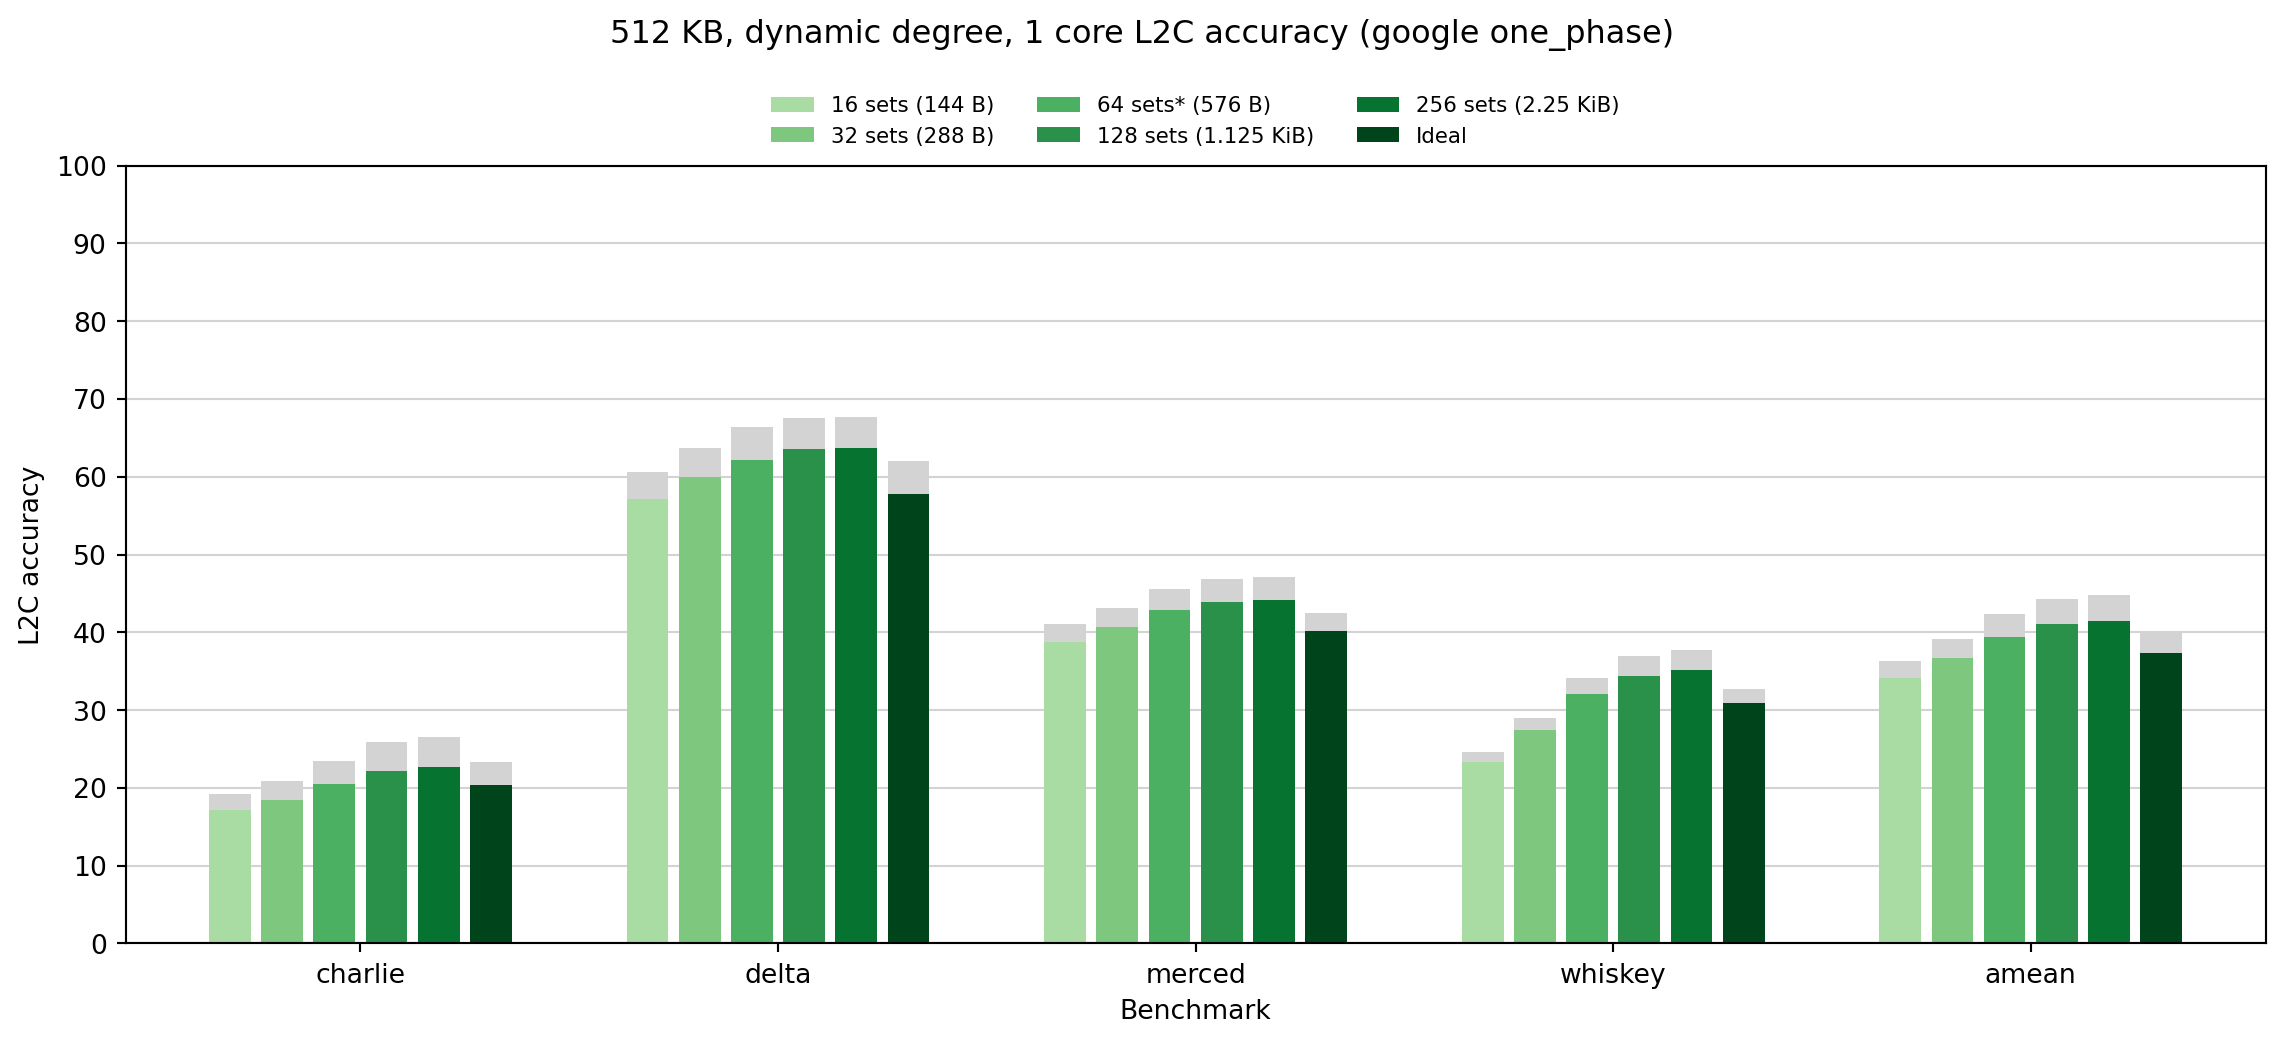

In [50]:
plots.plot_everything_accuracy(degreedyn_1core_tc_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_tc_colors,
                               legend_kwargs=degreedyn_1core_tc_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_tc_suptitle)

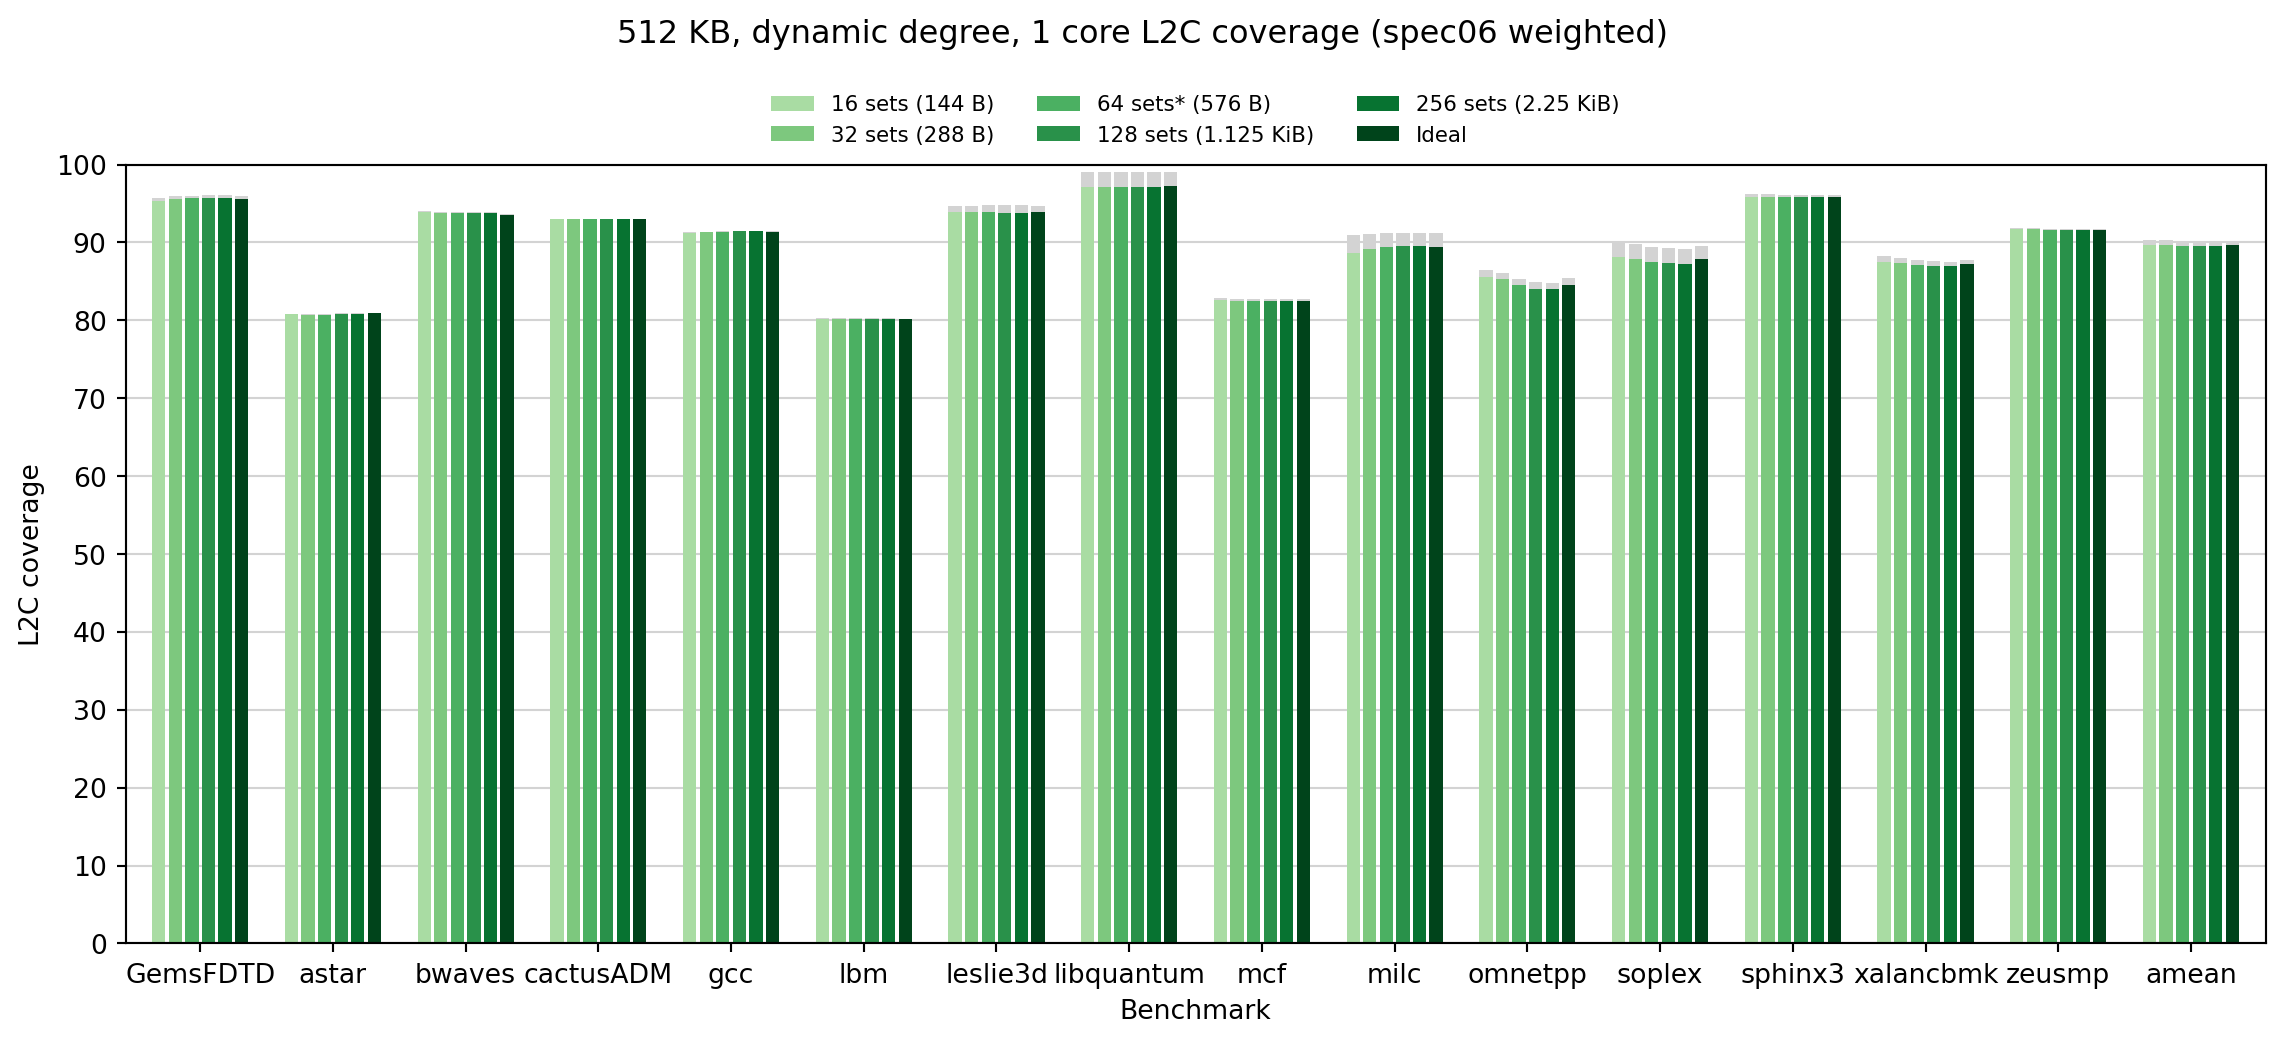

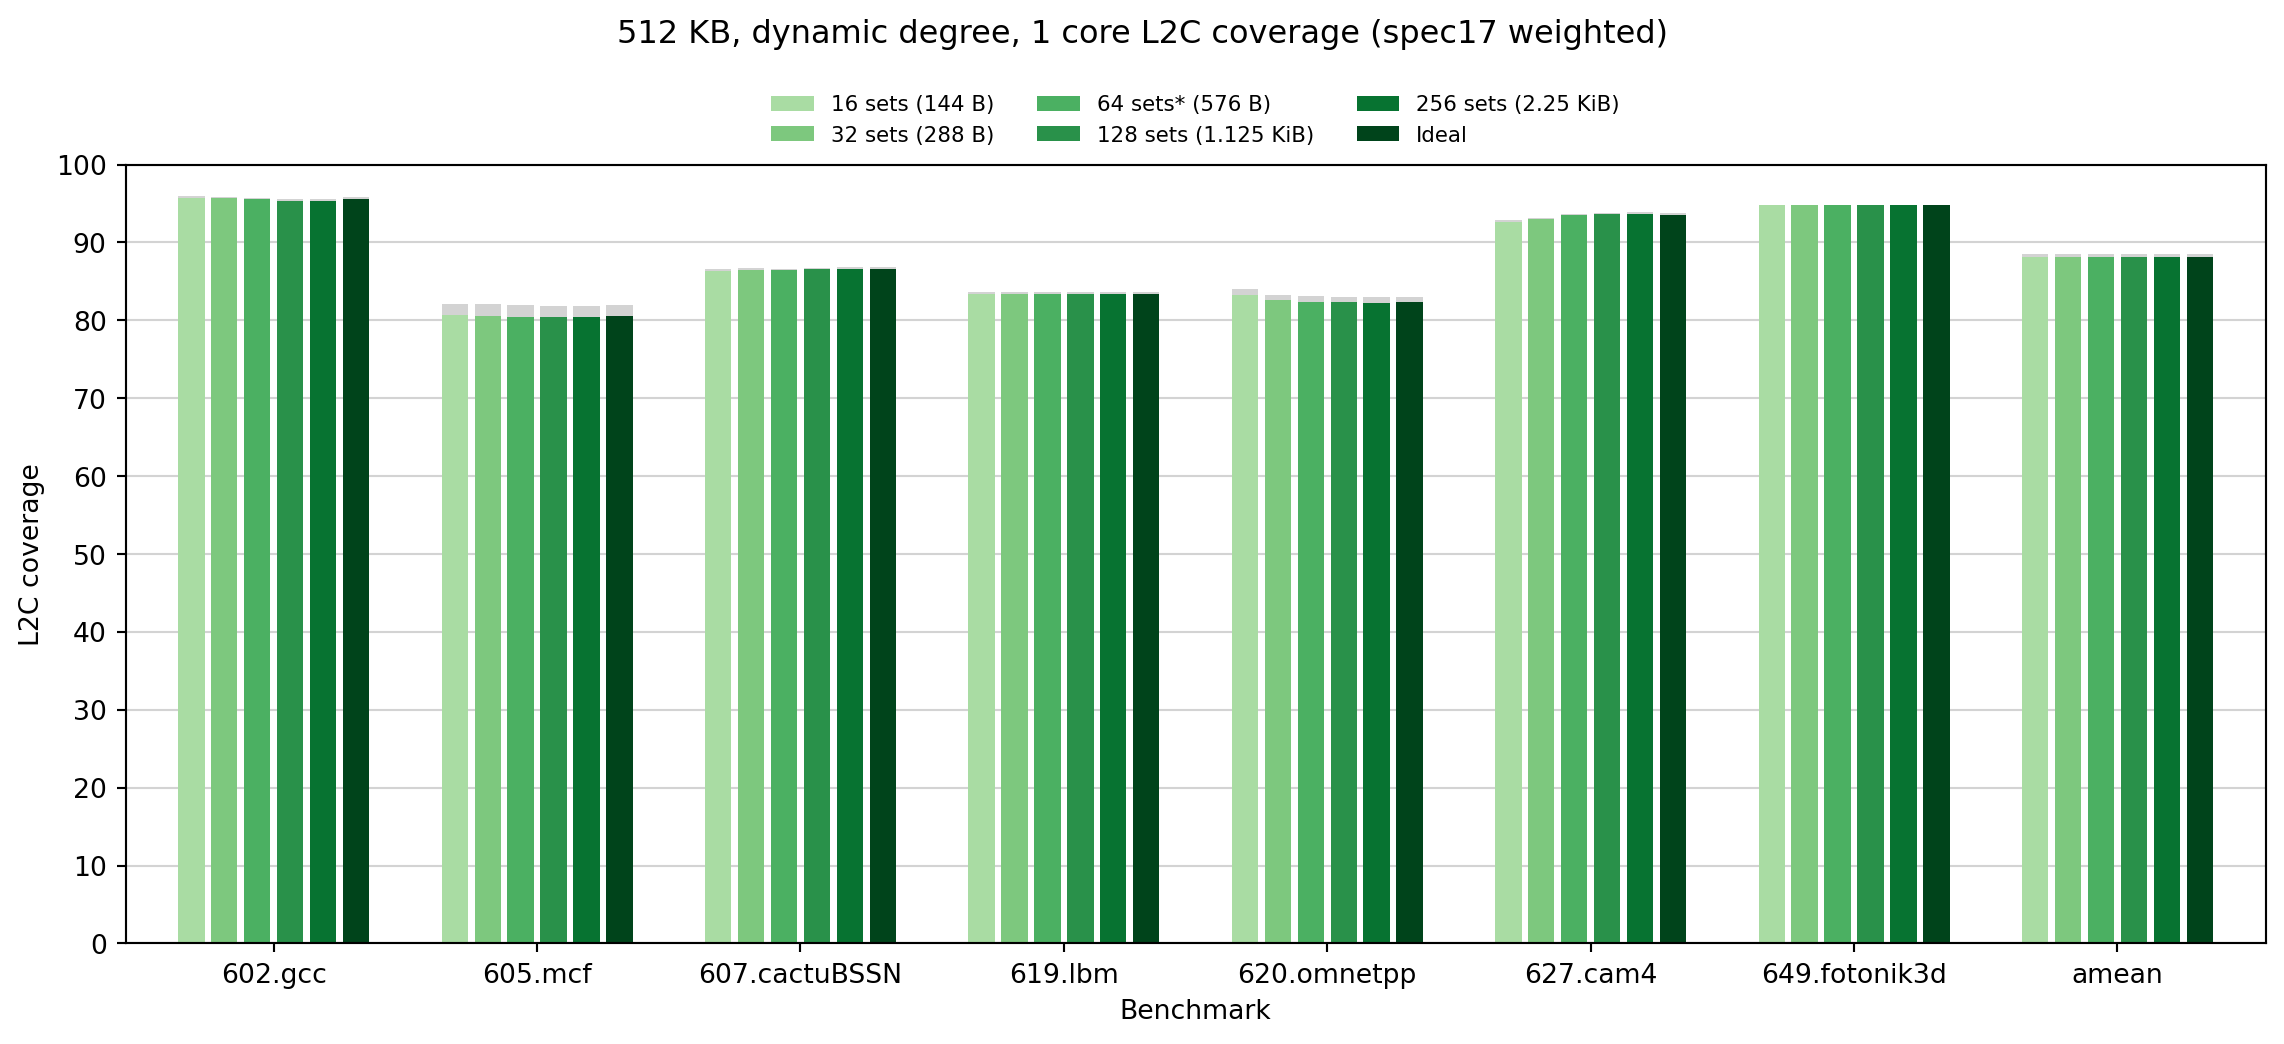

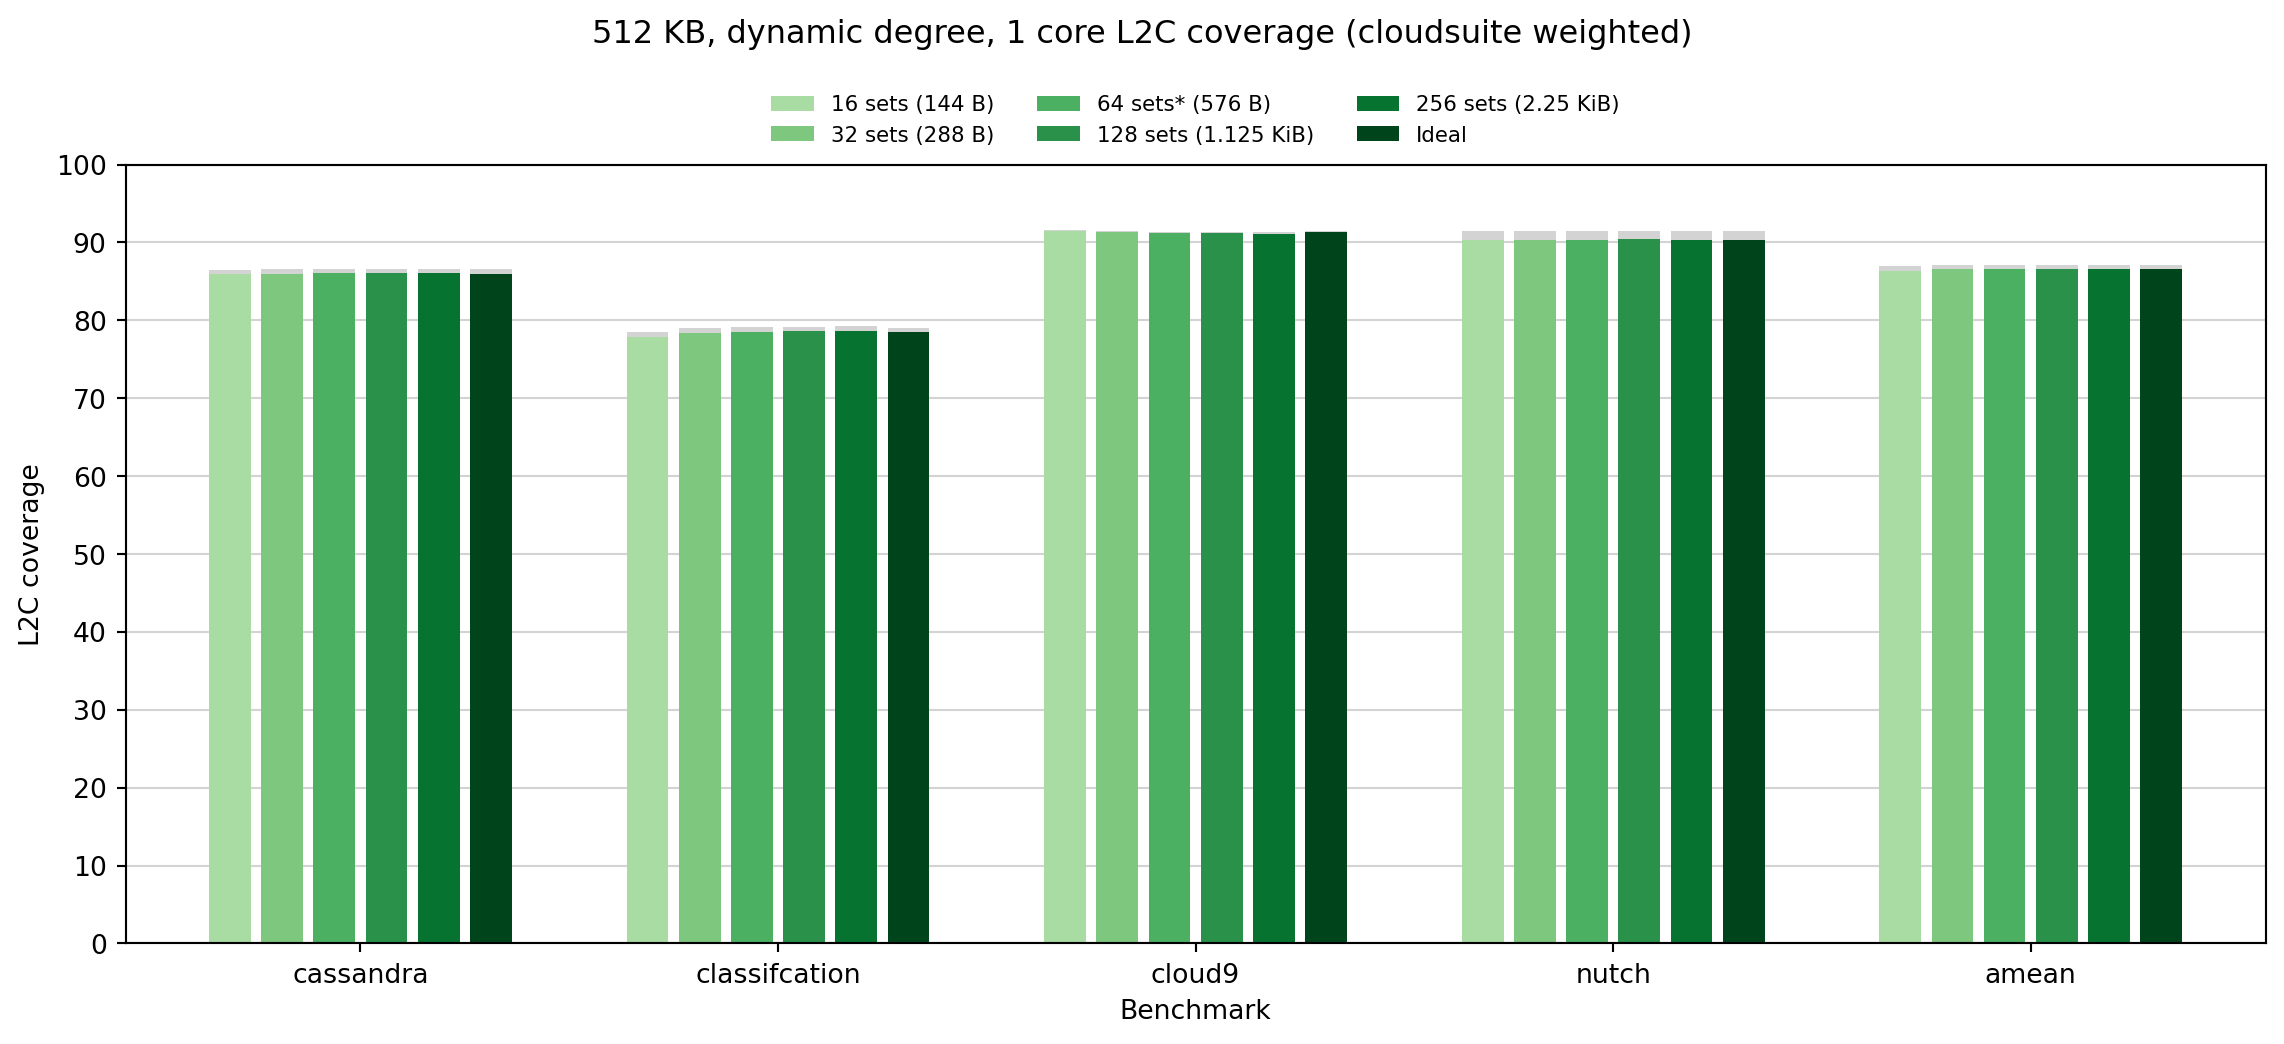

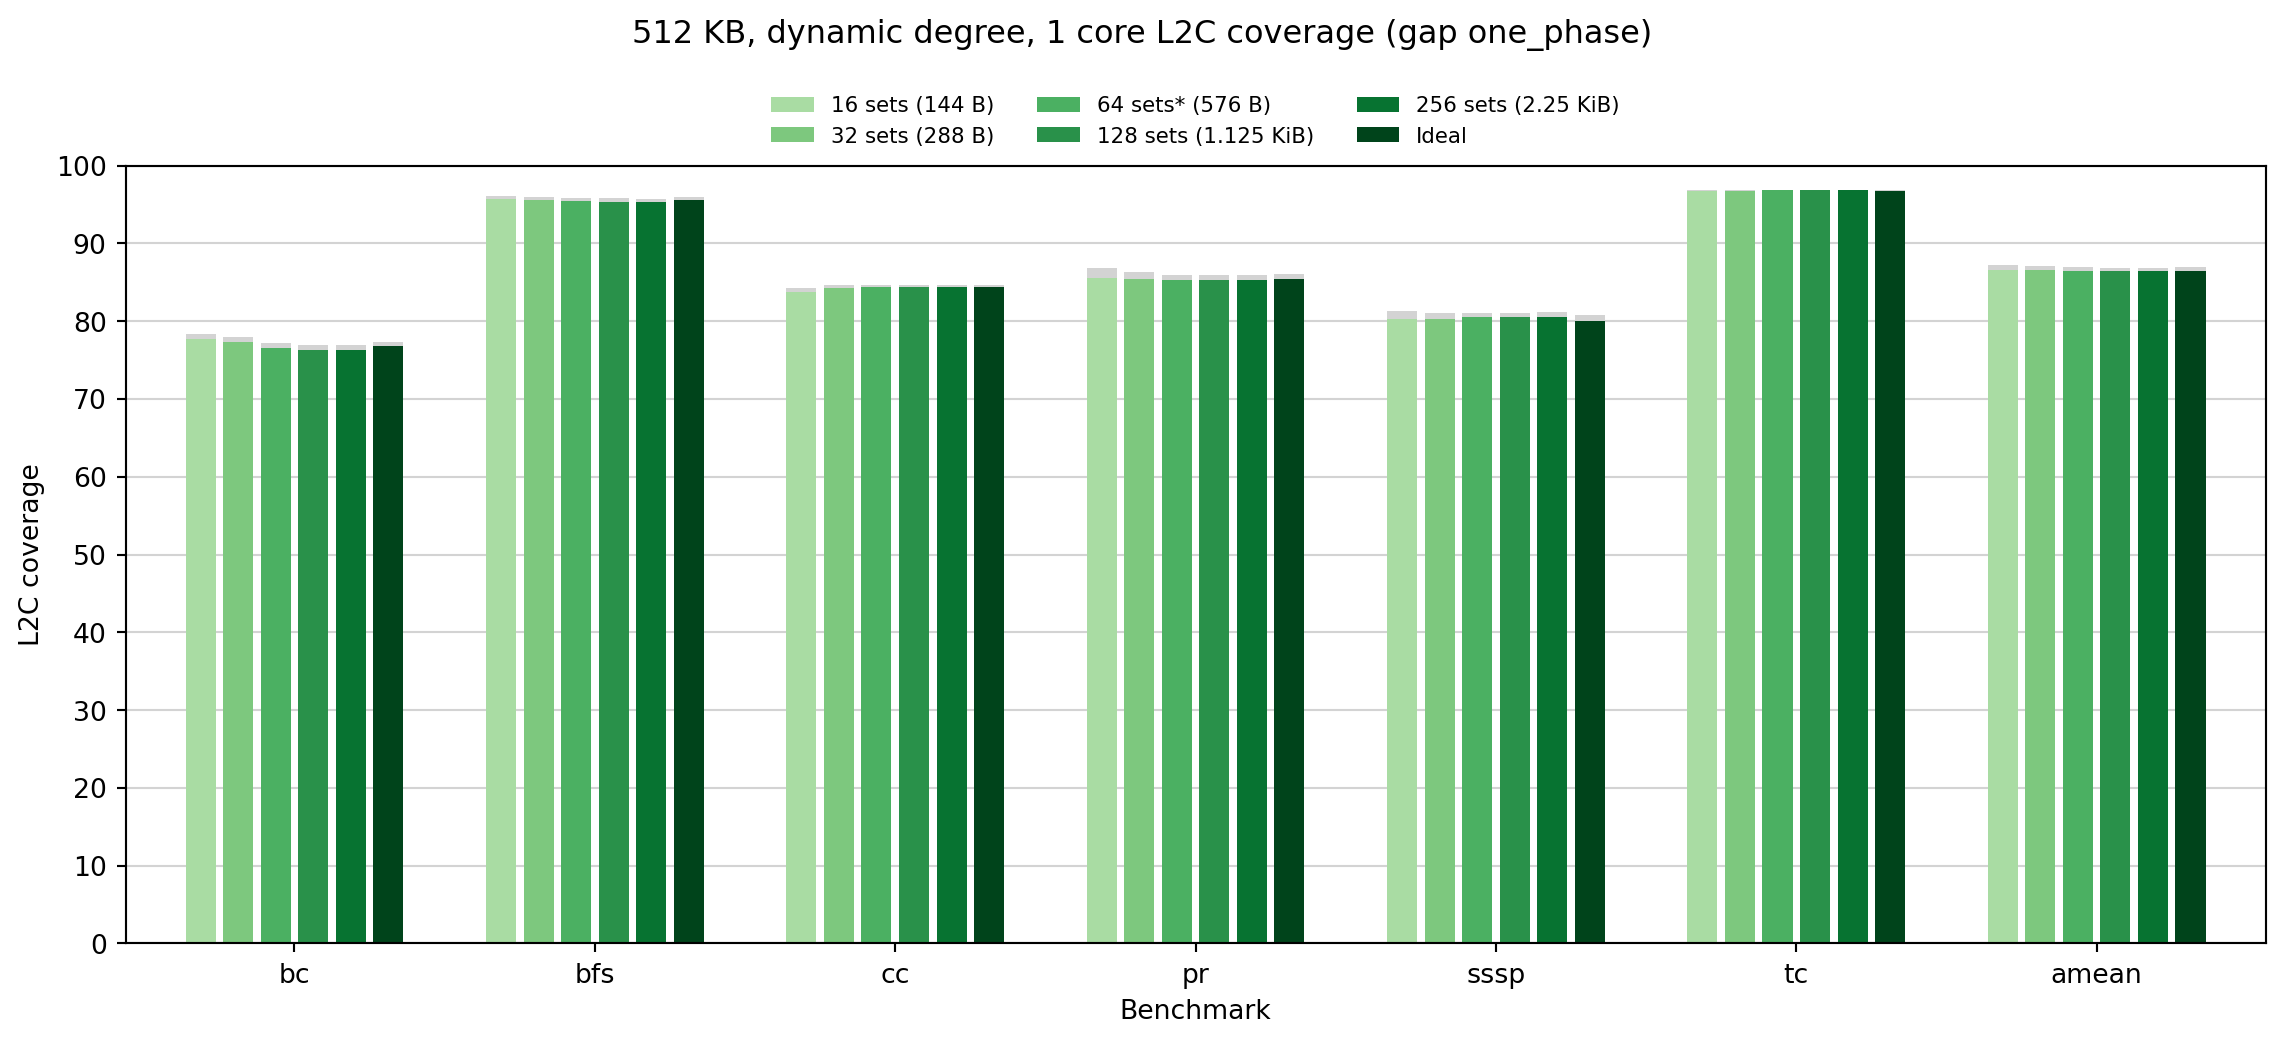

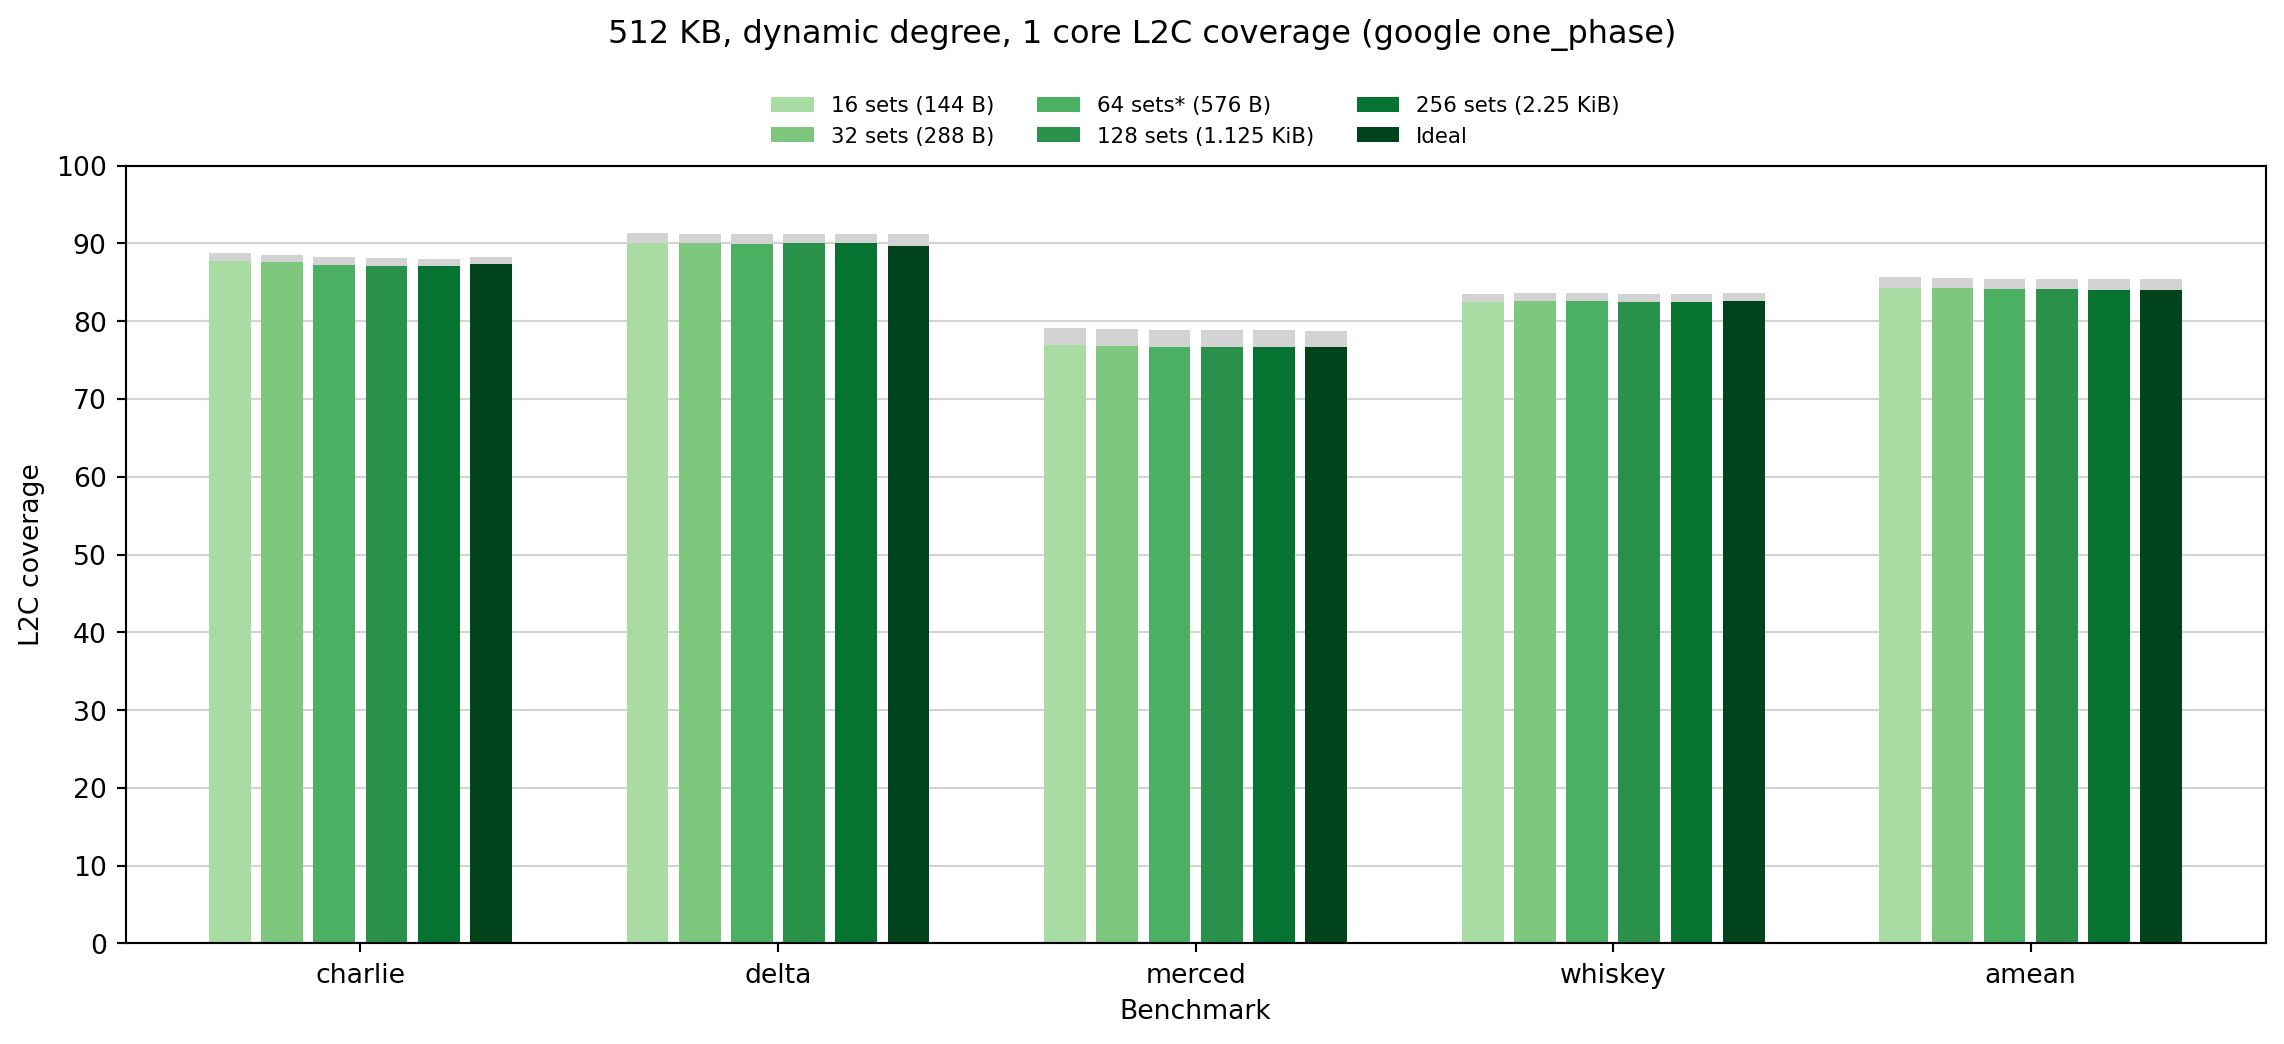

In [51]:
plots.plot_everything_coverage(degreedyn_1core_tc_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_tc_colors,
                               legend_kwargs=degreedyn_1core_tc_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_tc_suptitle)

## Prefetch Cache
Unless otherwise noted:
- 1 random sample
- 64 set, 4 way, 1 target realistic Target Cache

In [11]:
feature = 'Delta_Path, PC_Delta'
cygnus_feature = 'PC'
degreedyn_1core_config = 'bwaware3'

degreedyn_1core_pc_df = {
    f'8 sets (72 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/8set_4way_1triggers'][feature],
    f'16 sets (144 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/16set_4way_1triggers'][feature],
    f'32 sets (288 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/32set_4way_1triggers'][feature],
    f'64 sets (576 B)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/64set_4way_1triggers'][feature],
    f'128 sets* (1.125 KiB)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/128set_4way_1triggers'][feature],
    f'256 sets (2.25 KiB)': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/256set_4way_1triggers'][feature],

    f'Ideal PC, 64-set TC': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/64set_4way_1triggers'][feature],
    # f'Ideal PC, Ideal TC': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/1random'][feature],
    # f'Ideal PC, Ideal TC, All Samples': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions'][feature],

    # 'SPP+PPF': dfs['degreedyn/baseline']['spp_ppf_dev'],
}

degreedyn_1core_pc_colors = {
    f'8 sets (72 B)': colormaps['Blues'](0.225),
    f'16 sets (144 B)': colormaps['Blues'](0.35),
    f'32 sets (288 B)': colormaps['Blues'](0.475),
    f'64 sets (576 B)': colormaps['Blues'](0.6),
    f'128 sets* (1.125 KiB)': 'tab:red', # colormaps['Blues'](0.725),
    f'256 sets (2.25 KiB)': colormaps['Blues'](0.85),

    'Ideal PC, 64-set TC': colormaps['Blues'](1.0),
    # 'Ideal PC, Ideal TC': colormaps['Blues'](0.95),
    # 'Ideal PC, Ideal TC, All Samples': colormaps['Blues'](1.0),

    'SPP+PPF': 'darkturquoise'
}

degreedyn_1core_pc_legend_kwargs = {
    'ncol': 2,
    'fontsize': 8,
    'loc': 'lower center',
    'framealpha': 0,
    'bbox_to_anchor': (0.5, 1.0),
}

degreedyn_1core_pc_suptitle = '512 KB, dynamic degree, 1 core'

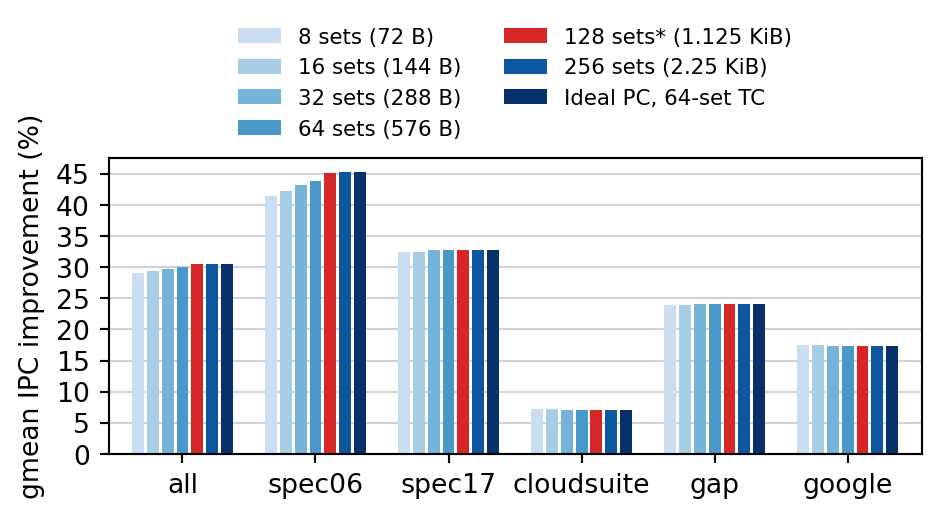

In [6]:
plots.plot_metric_means(degreedyn_1core_pc_df, suites=suites, metric='ipc_improvement', 
                        colors=degreedyn_1core_pc_colors,
                        legend_kwargs=degreedyn_1core_pc_legend_kwargs, 
                        dpi=192, figsize=(5, 2.8),
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 47.5),
                        add_suptitle=False,
                        add_xlabel=False)

=== spec06 weighted ===


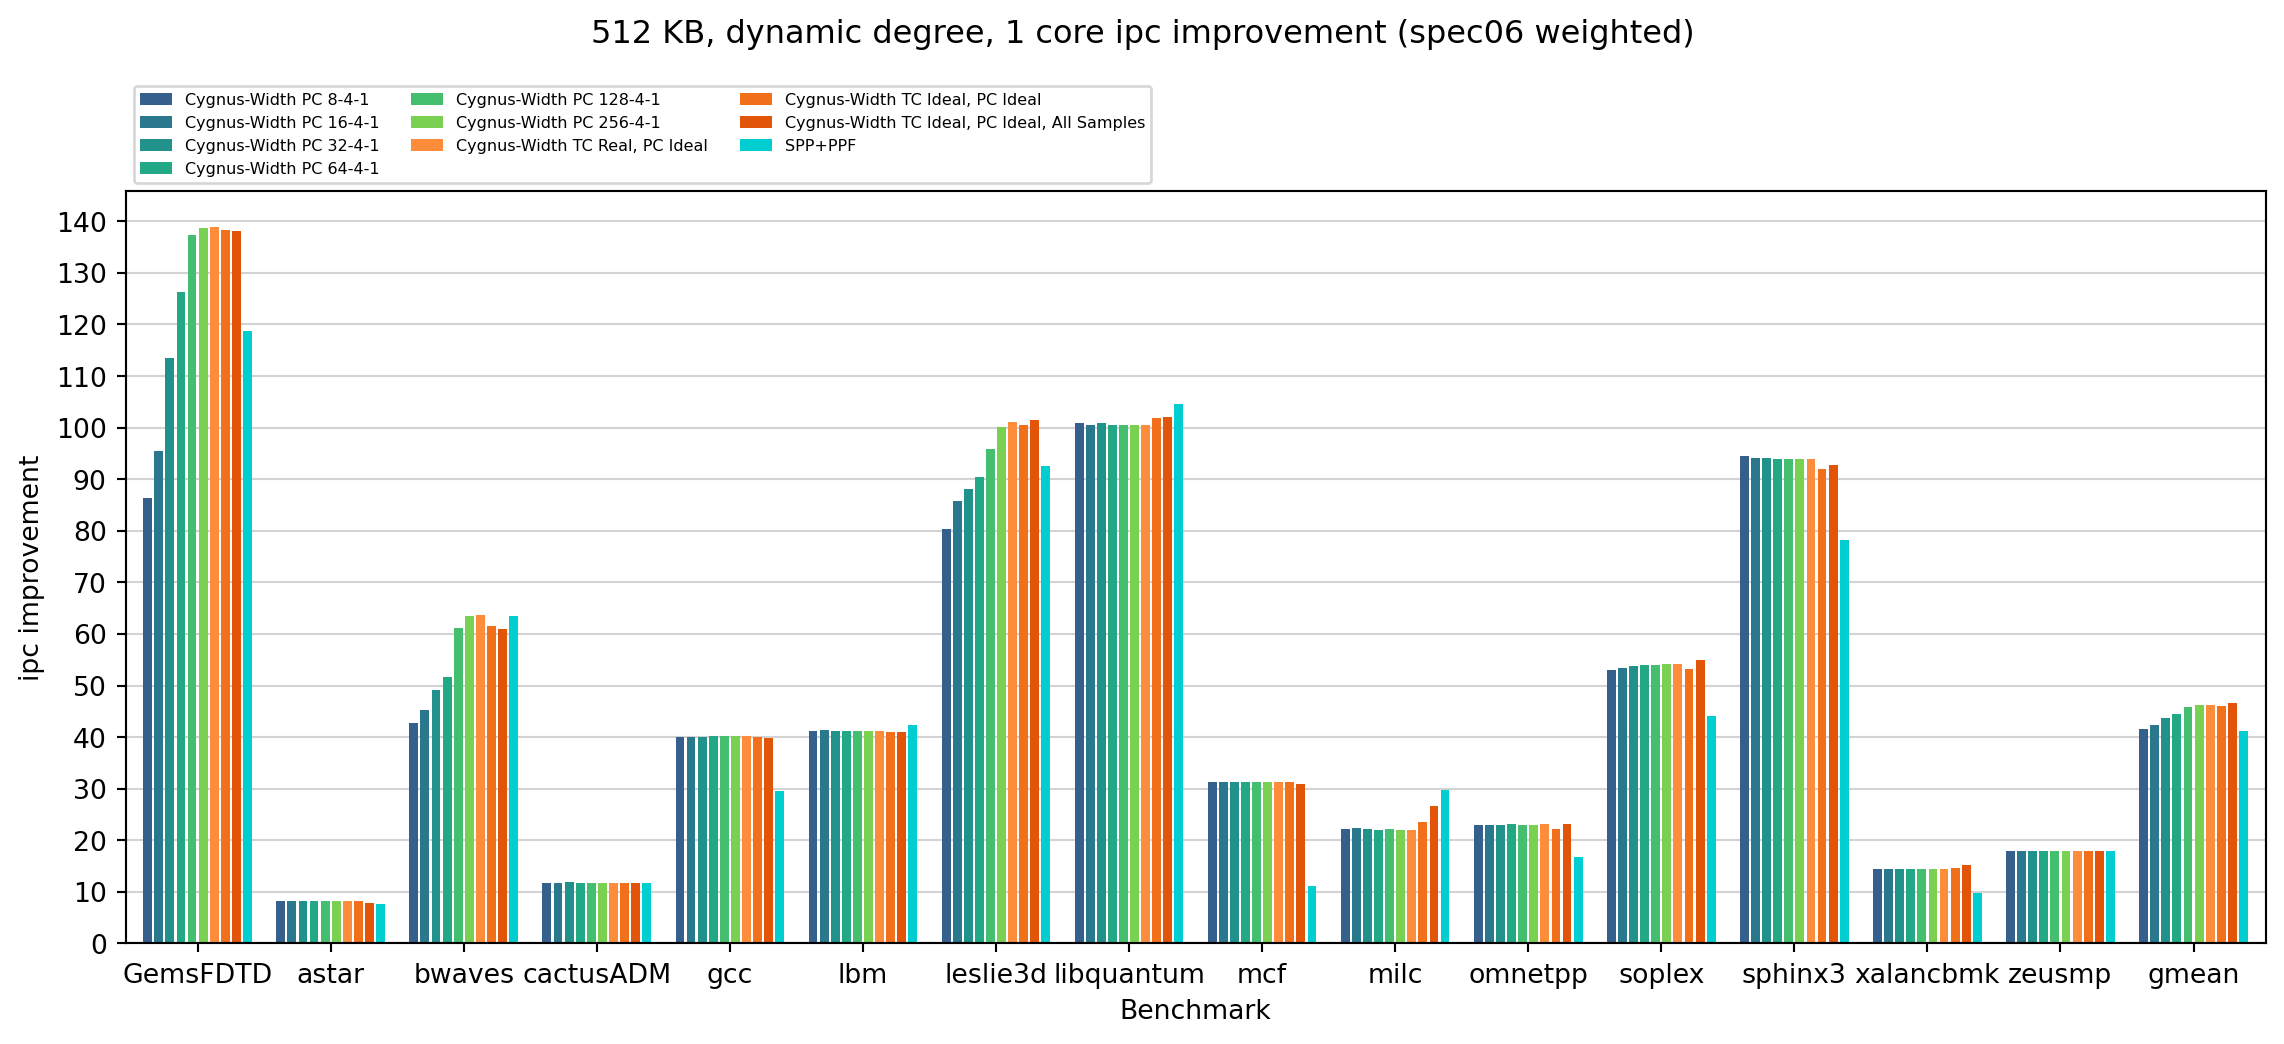

=== spec17 weighted ===


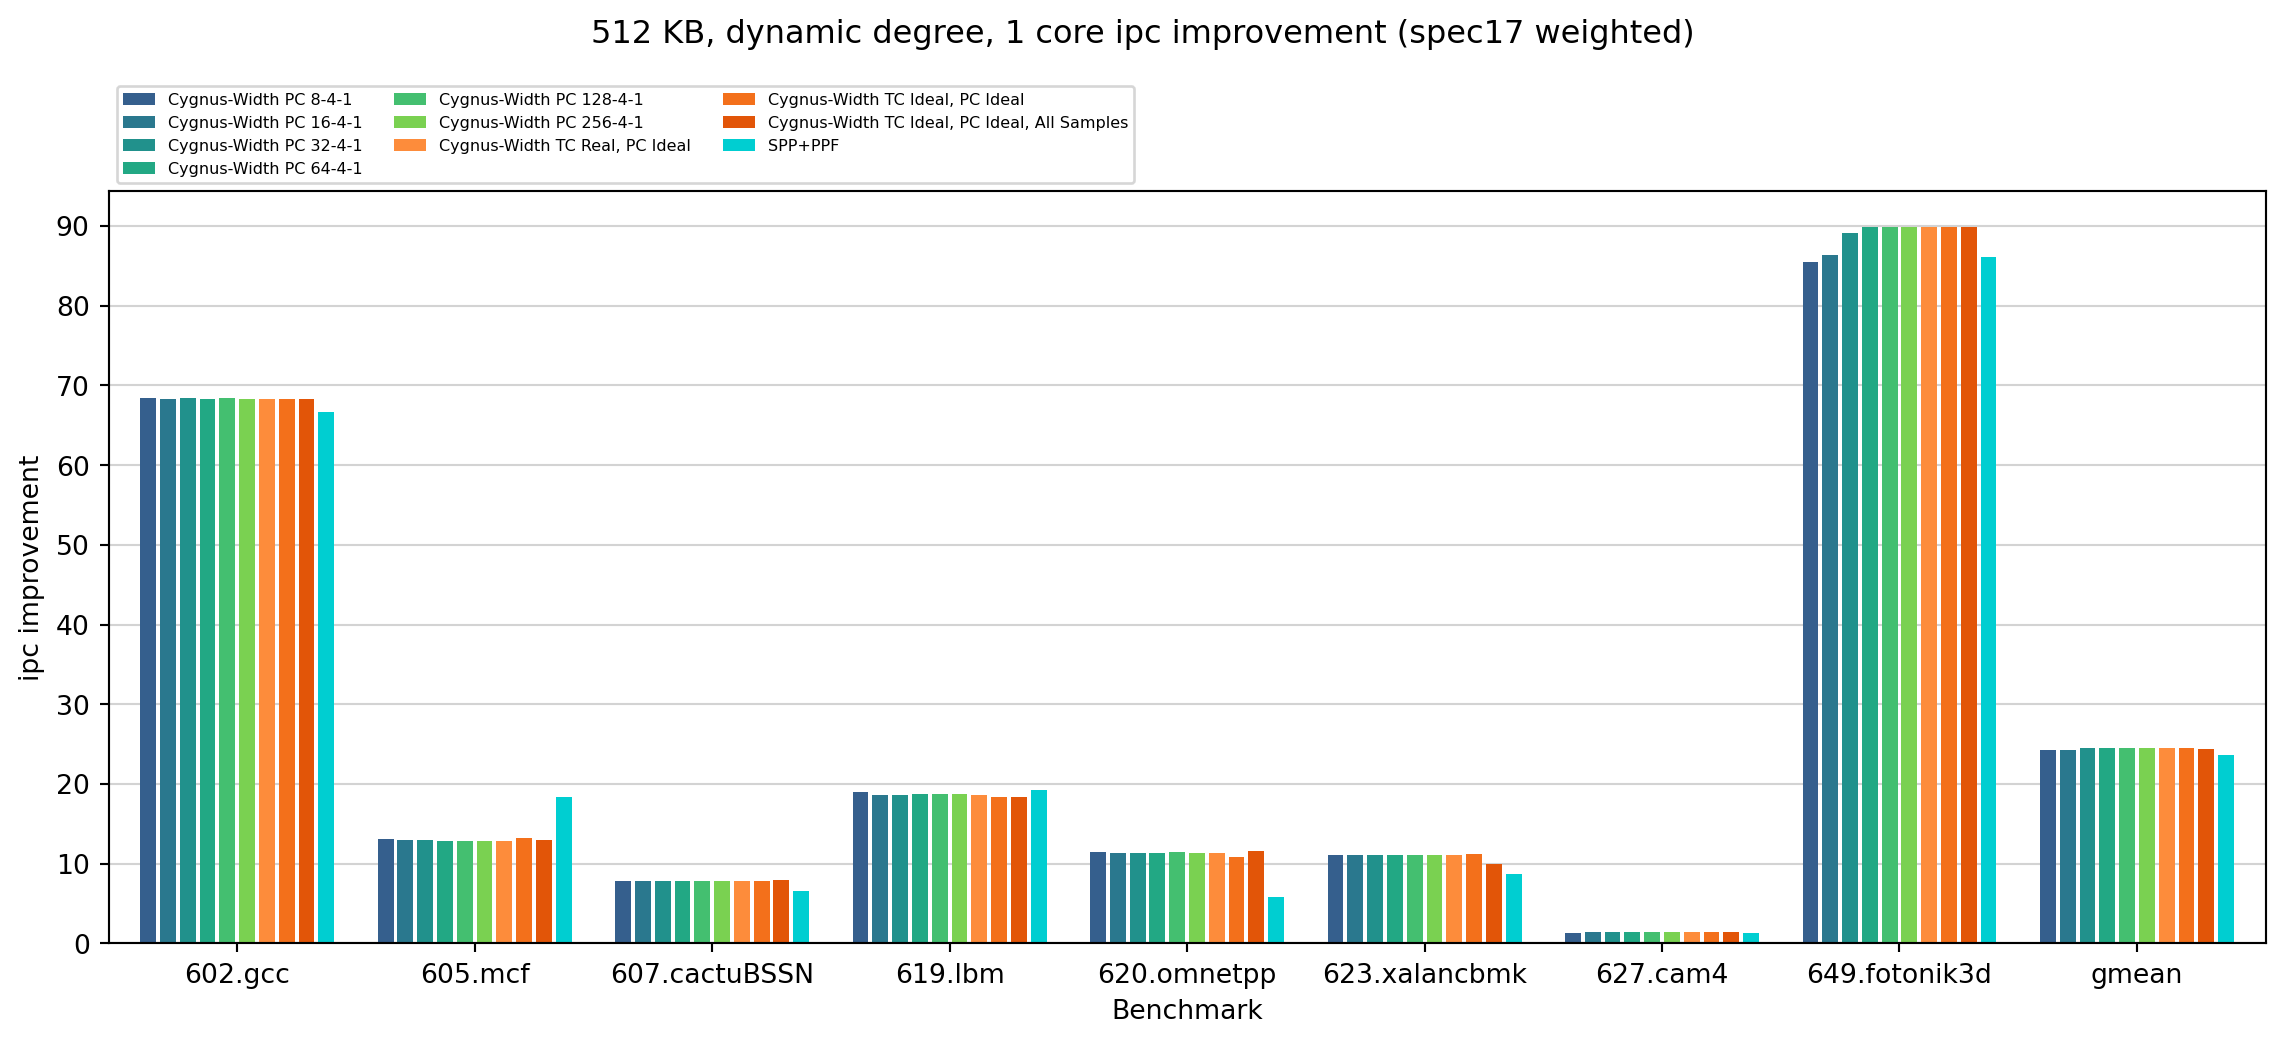

=== cloudsuite weighted ===


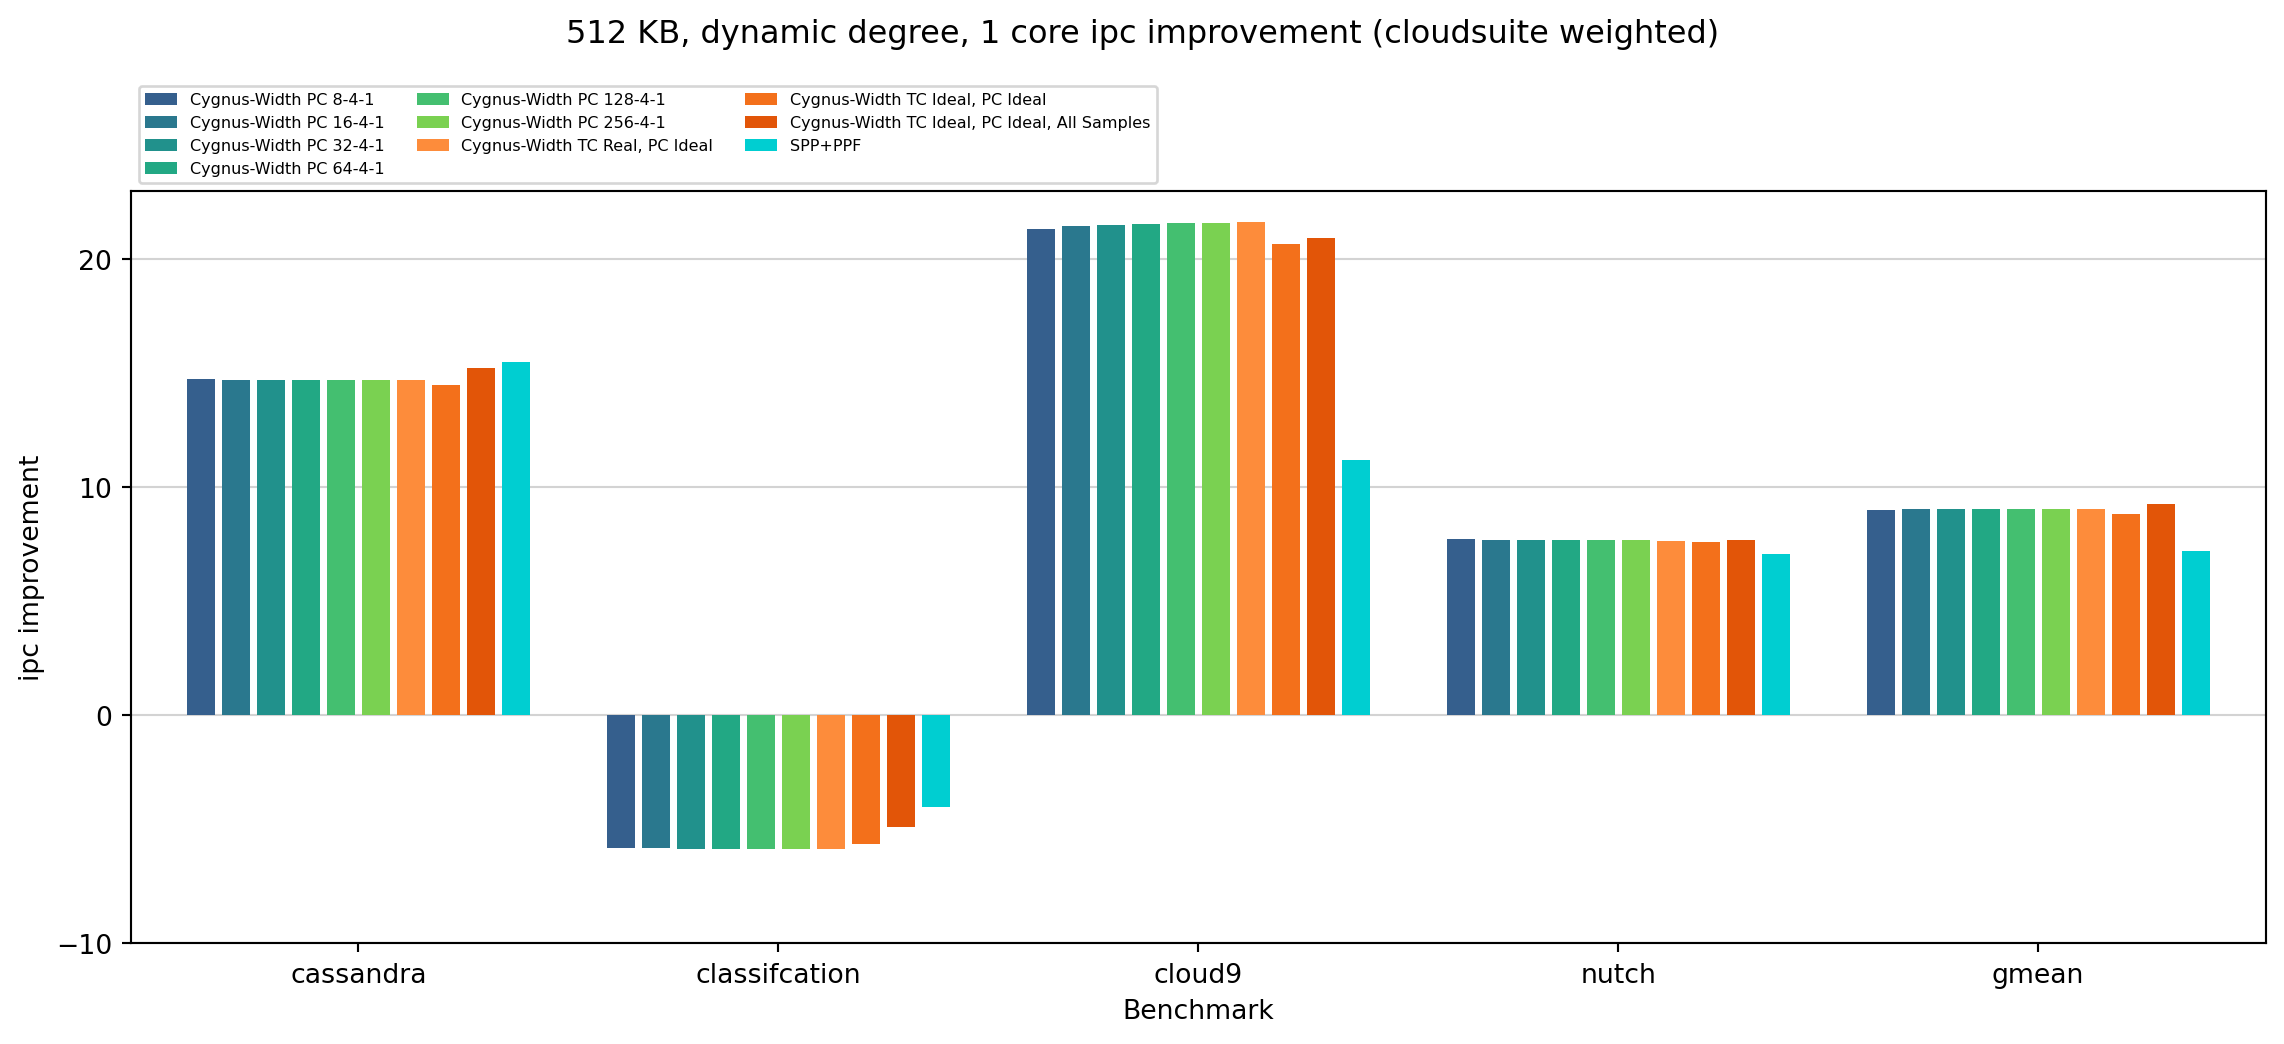

=== gap one_phase ===


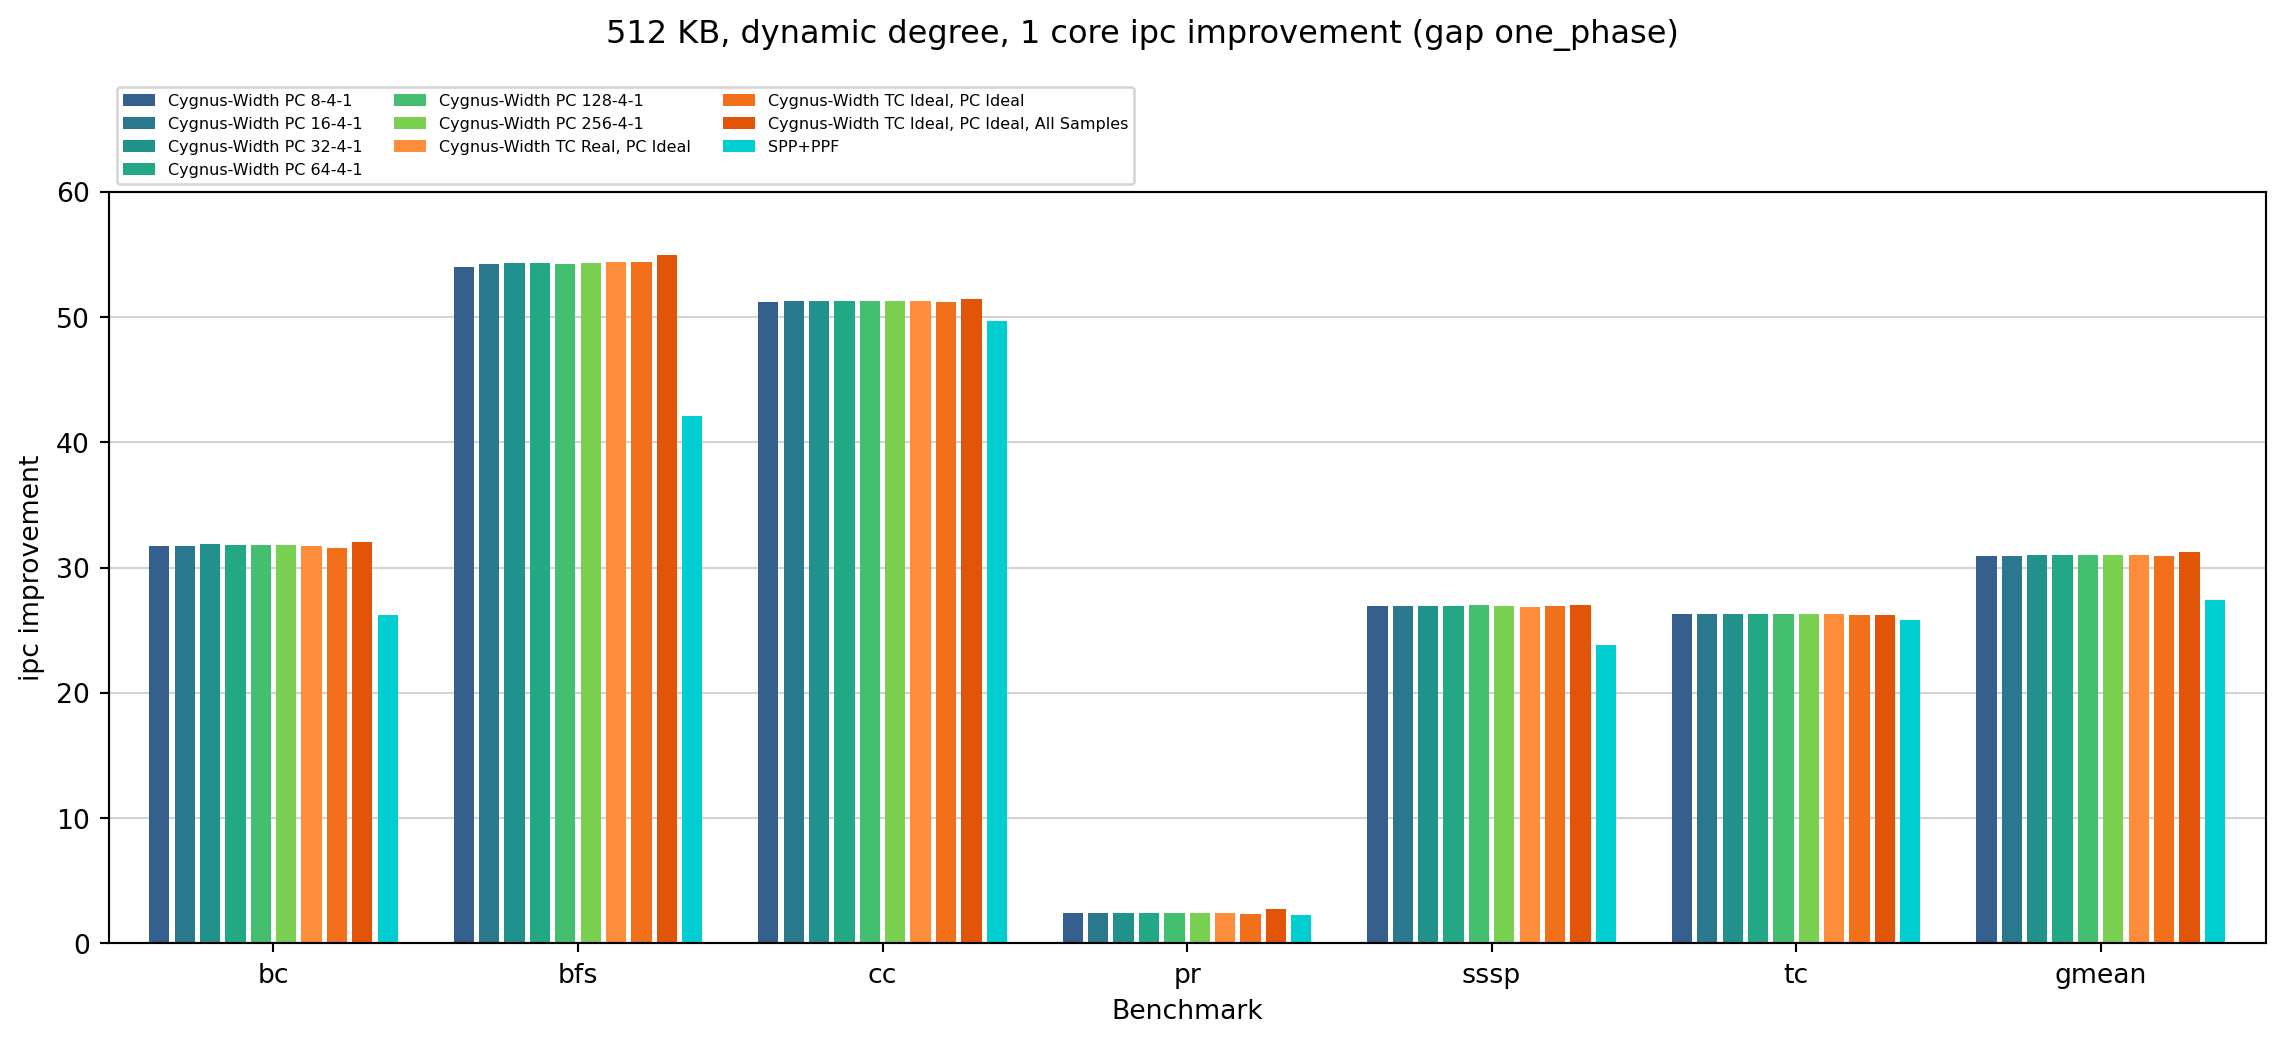

=== google one_phase ===


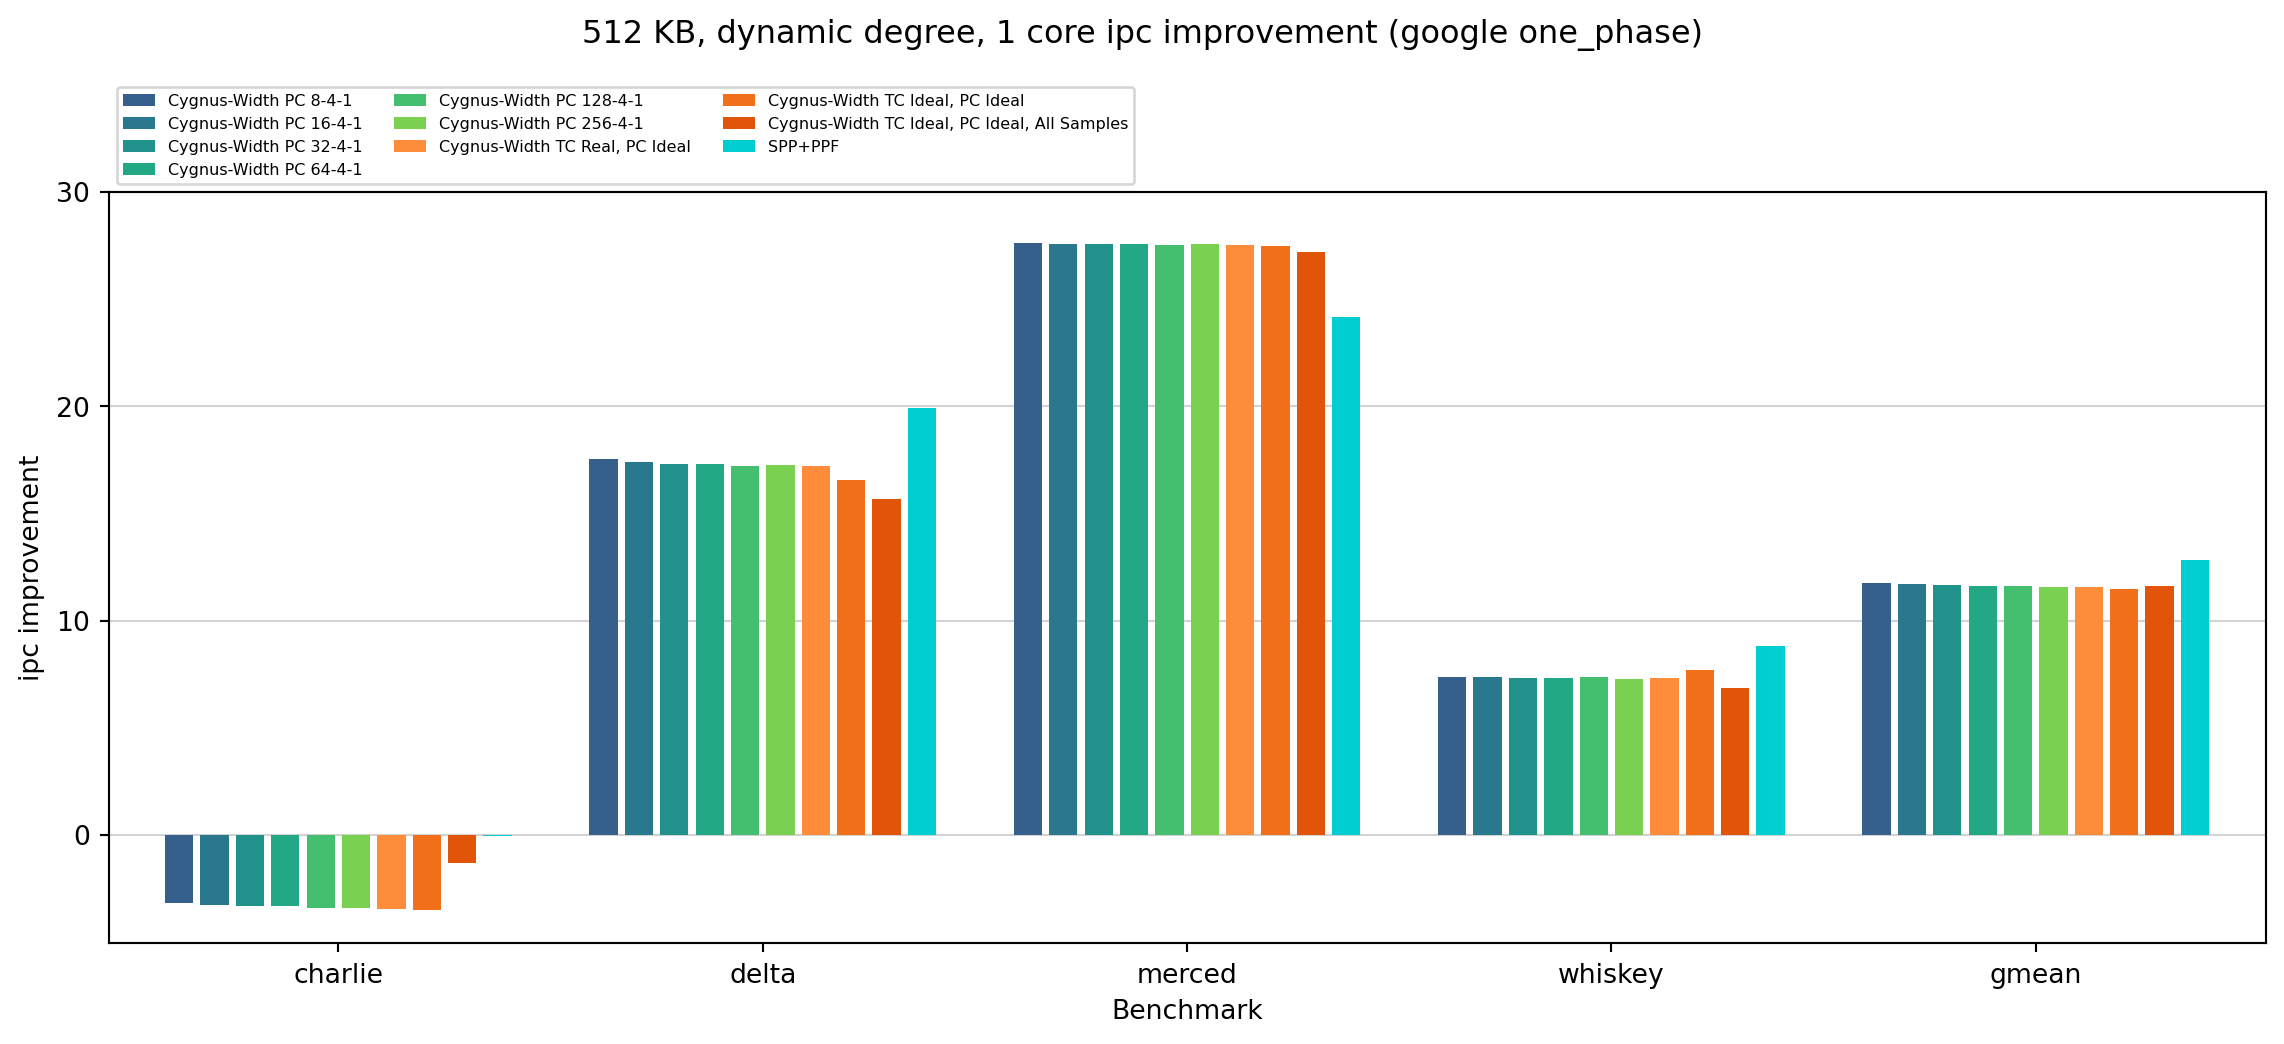

In [36]:
plots.plot_everything(degreedyn_1core_pc_df, suites=suites, metrics=metrics, 
                      colors=degreedyn_1core_pc_colors,
                      legend_kwargs=degreedyn_1core_pc_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_pc_suptitle)

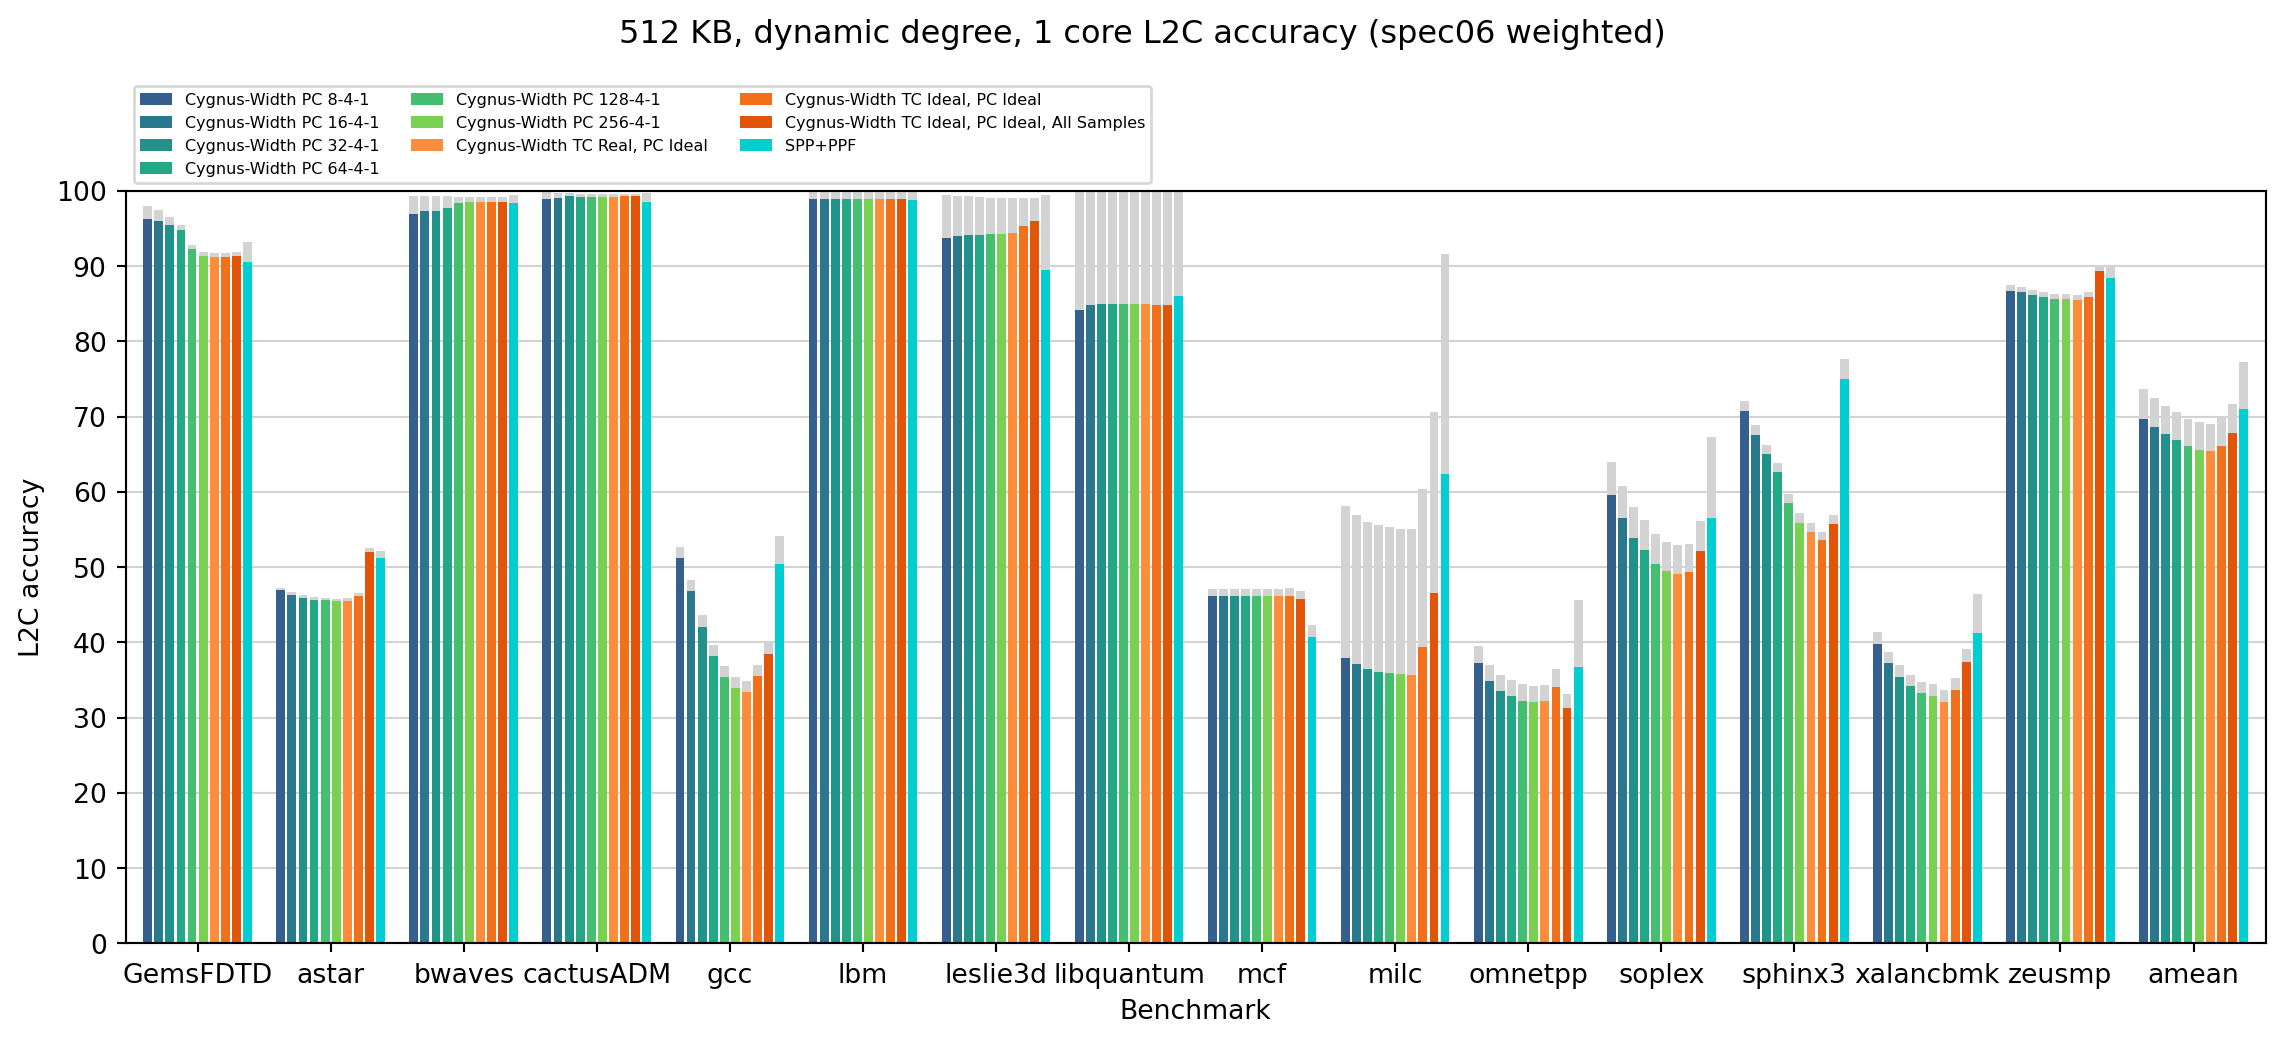

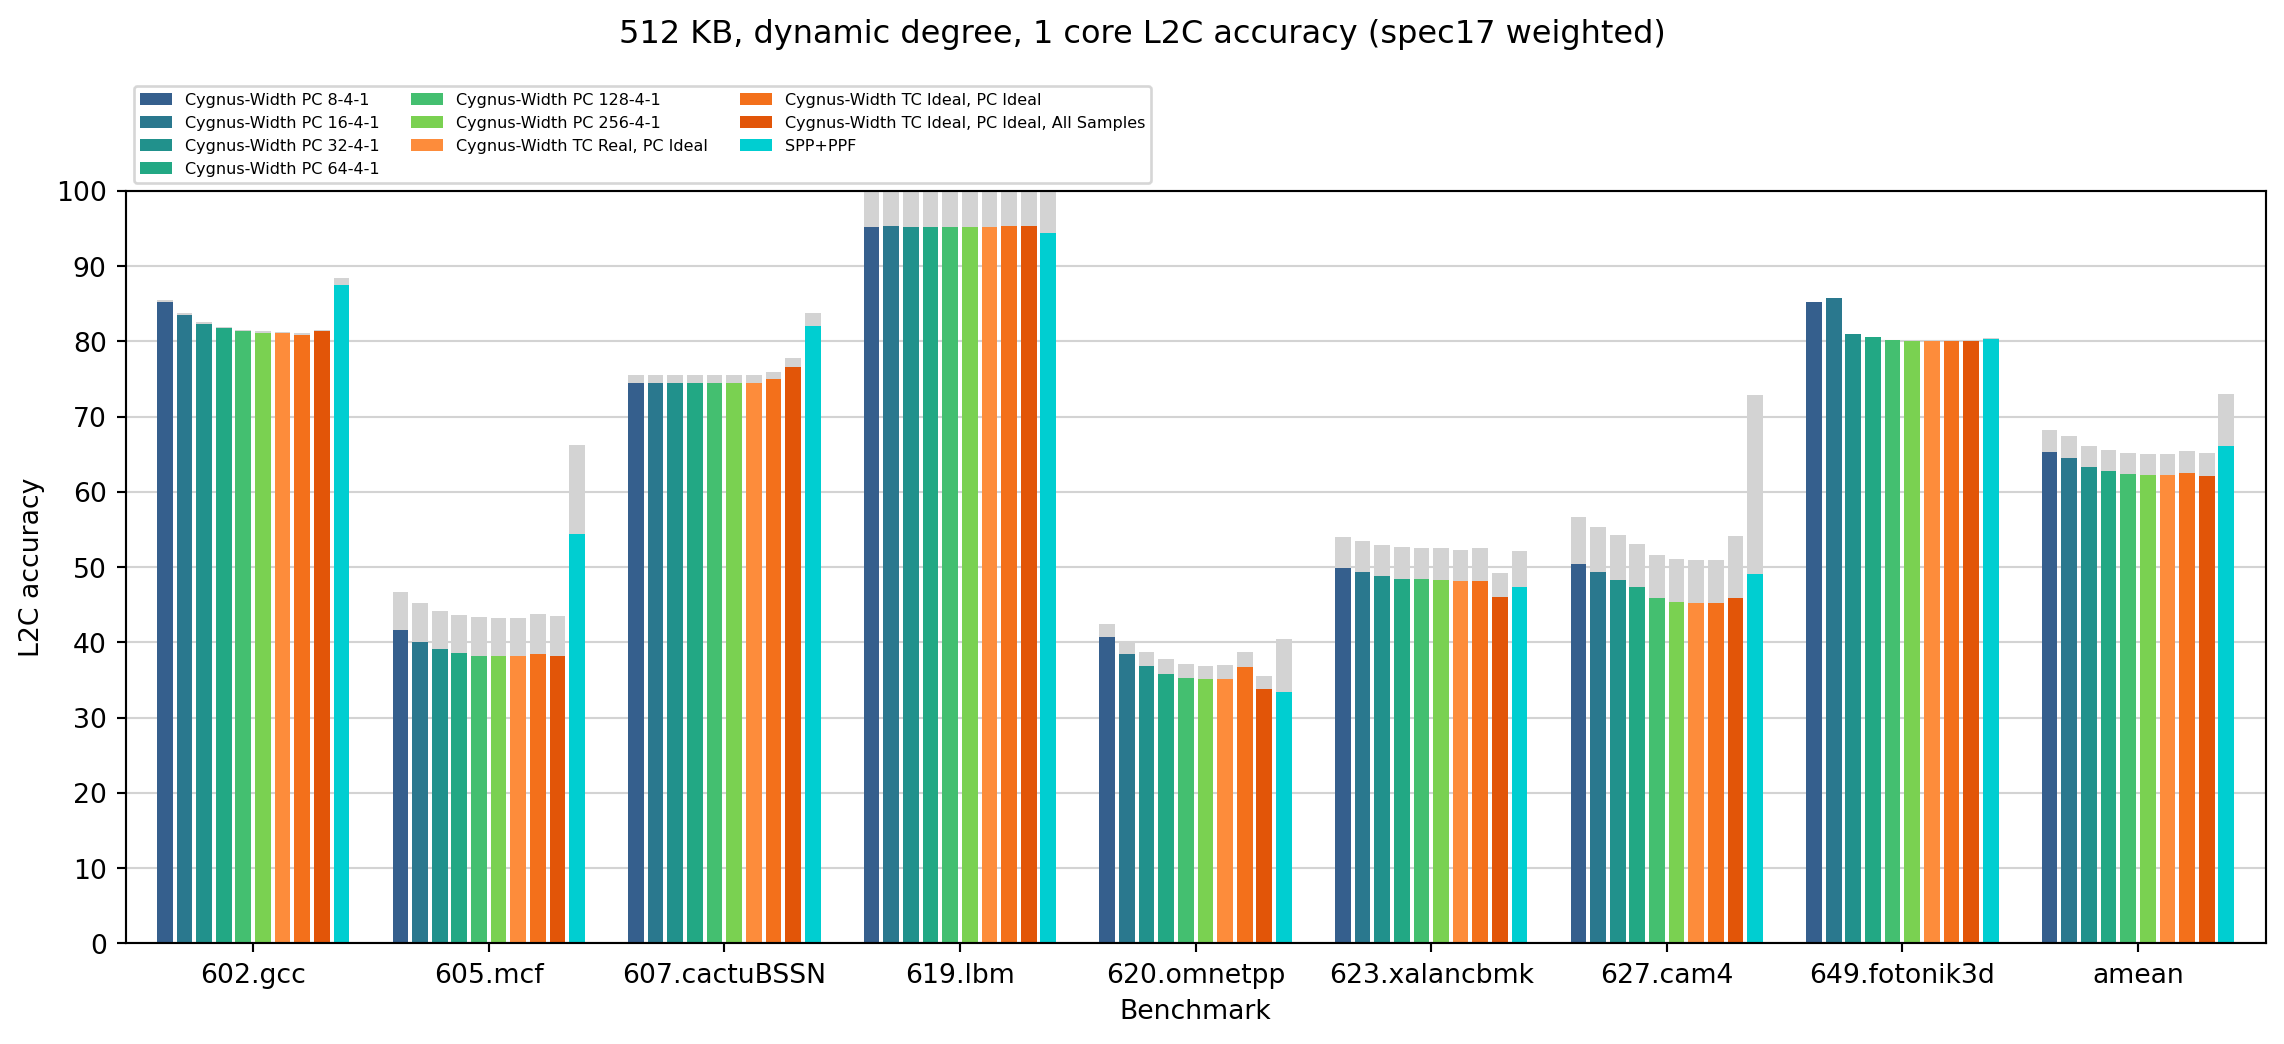

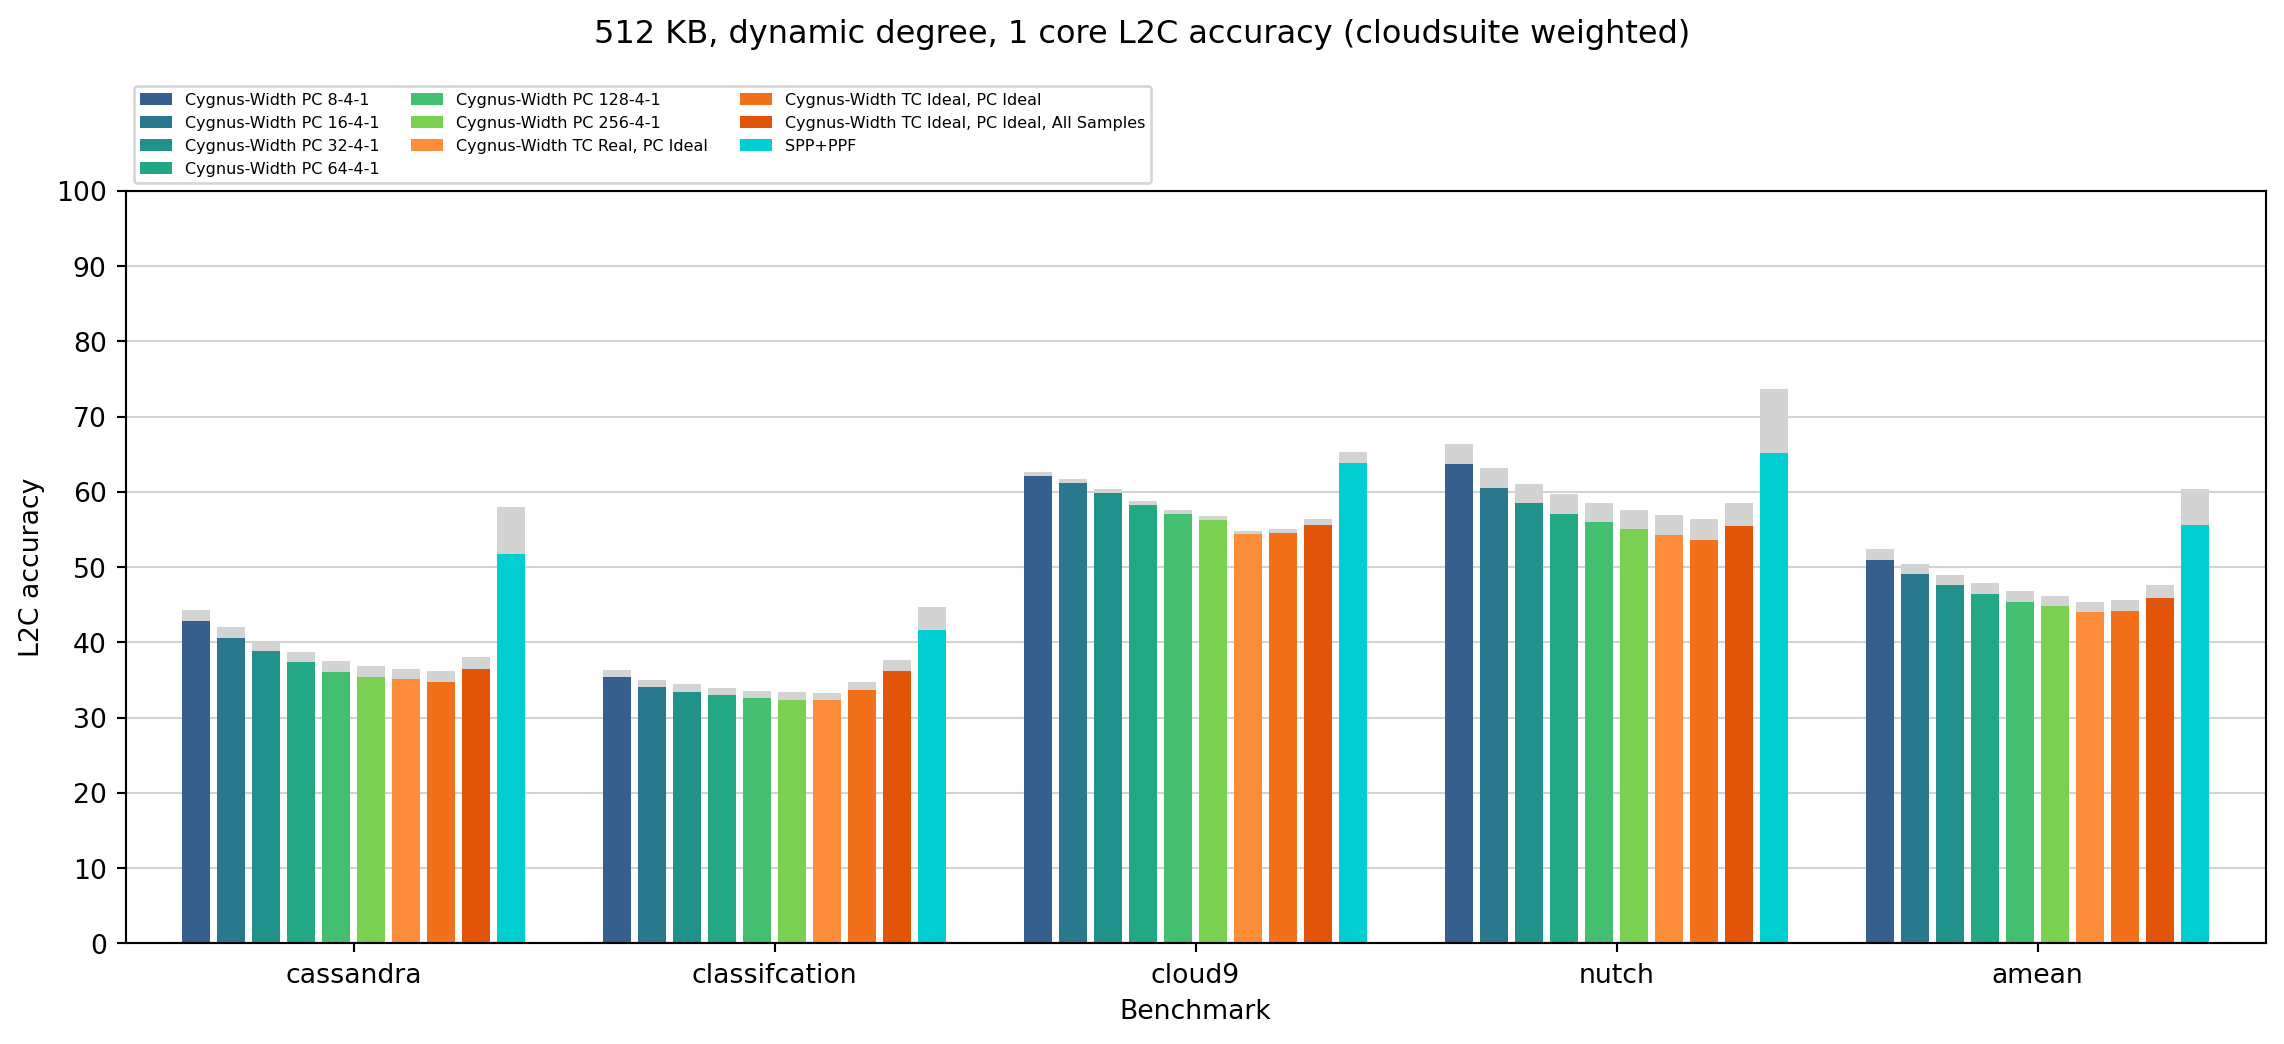

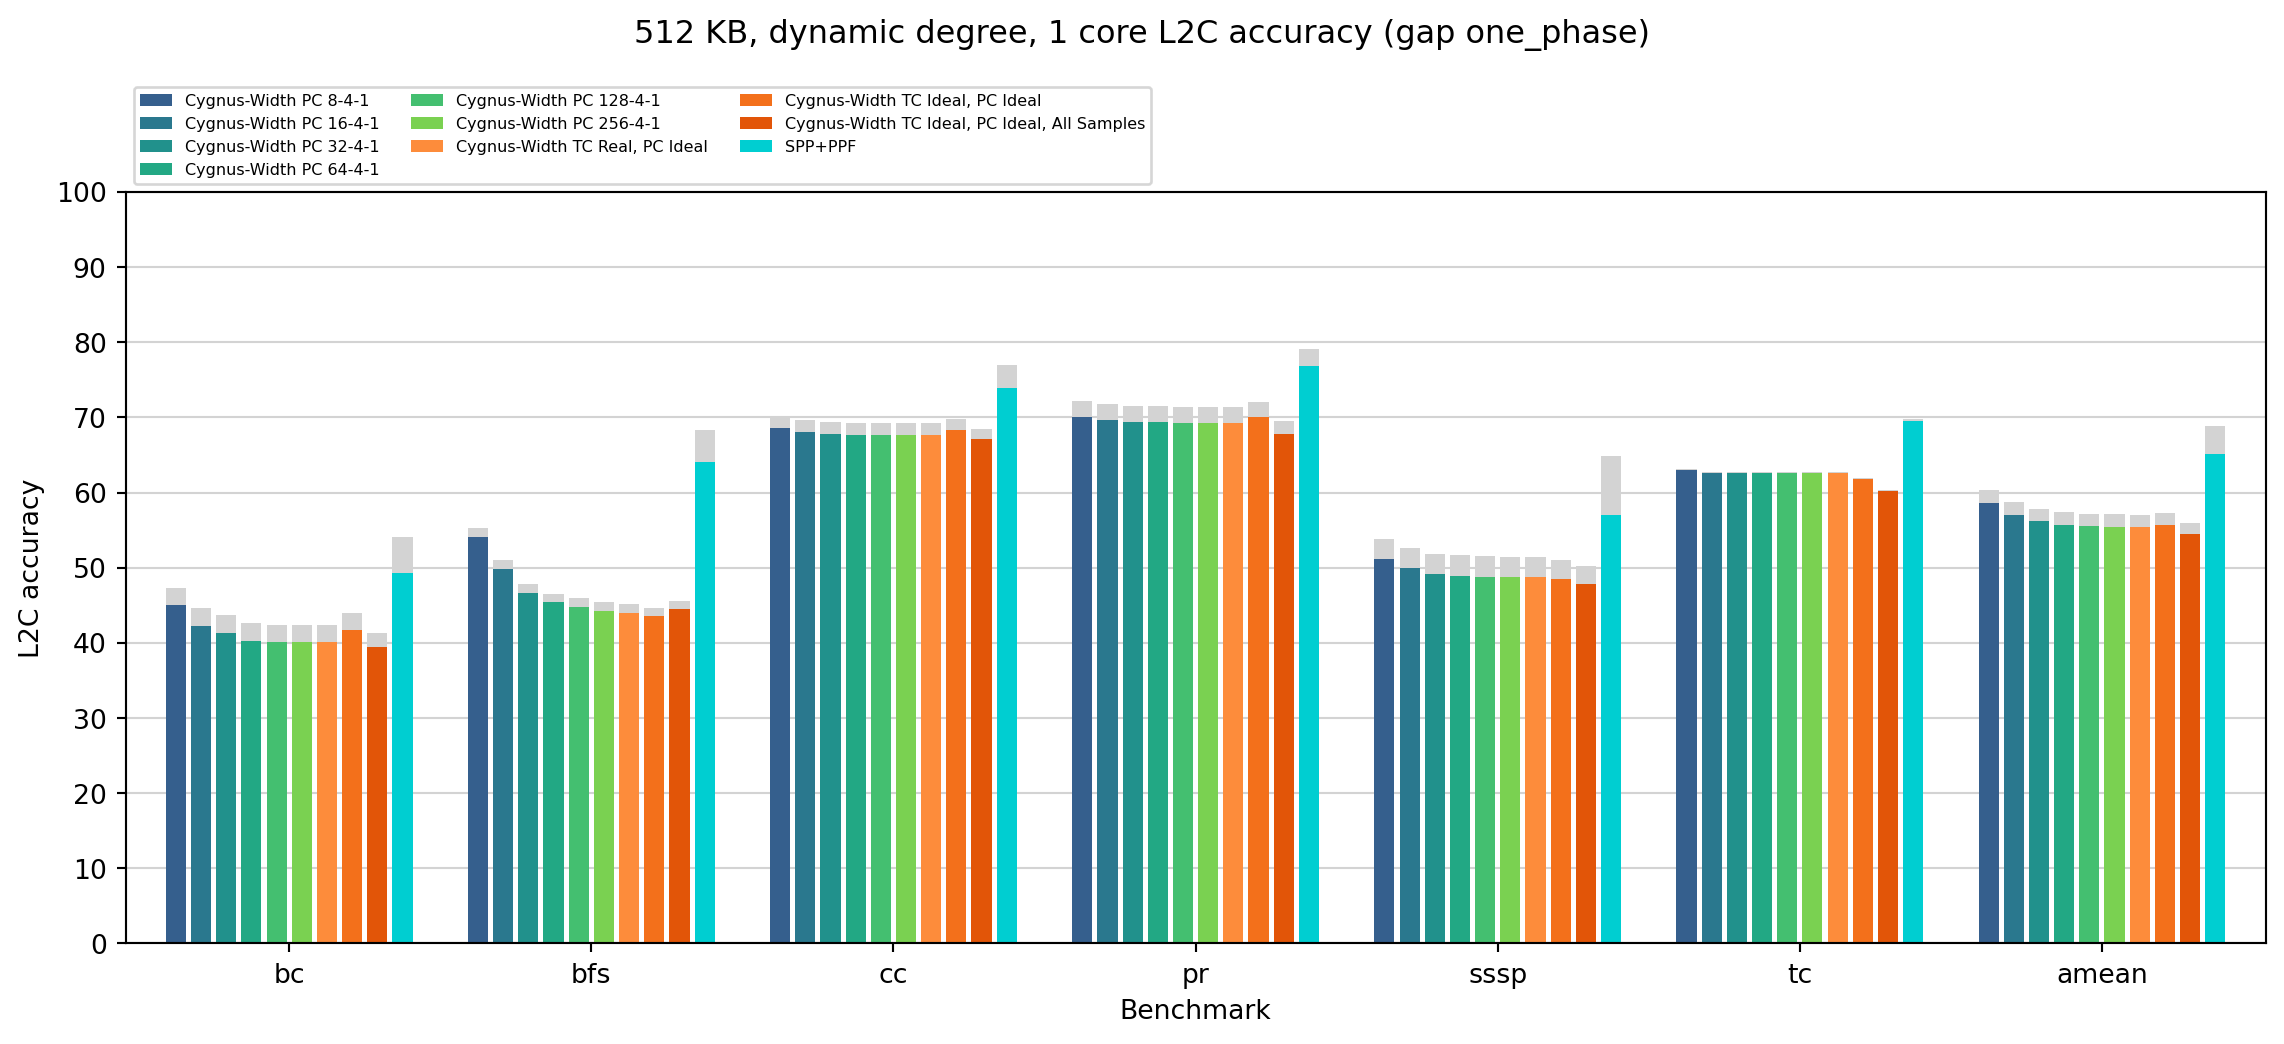

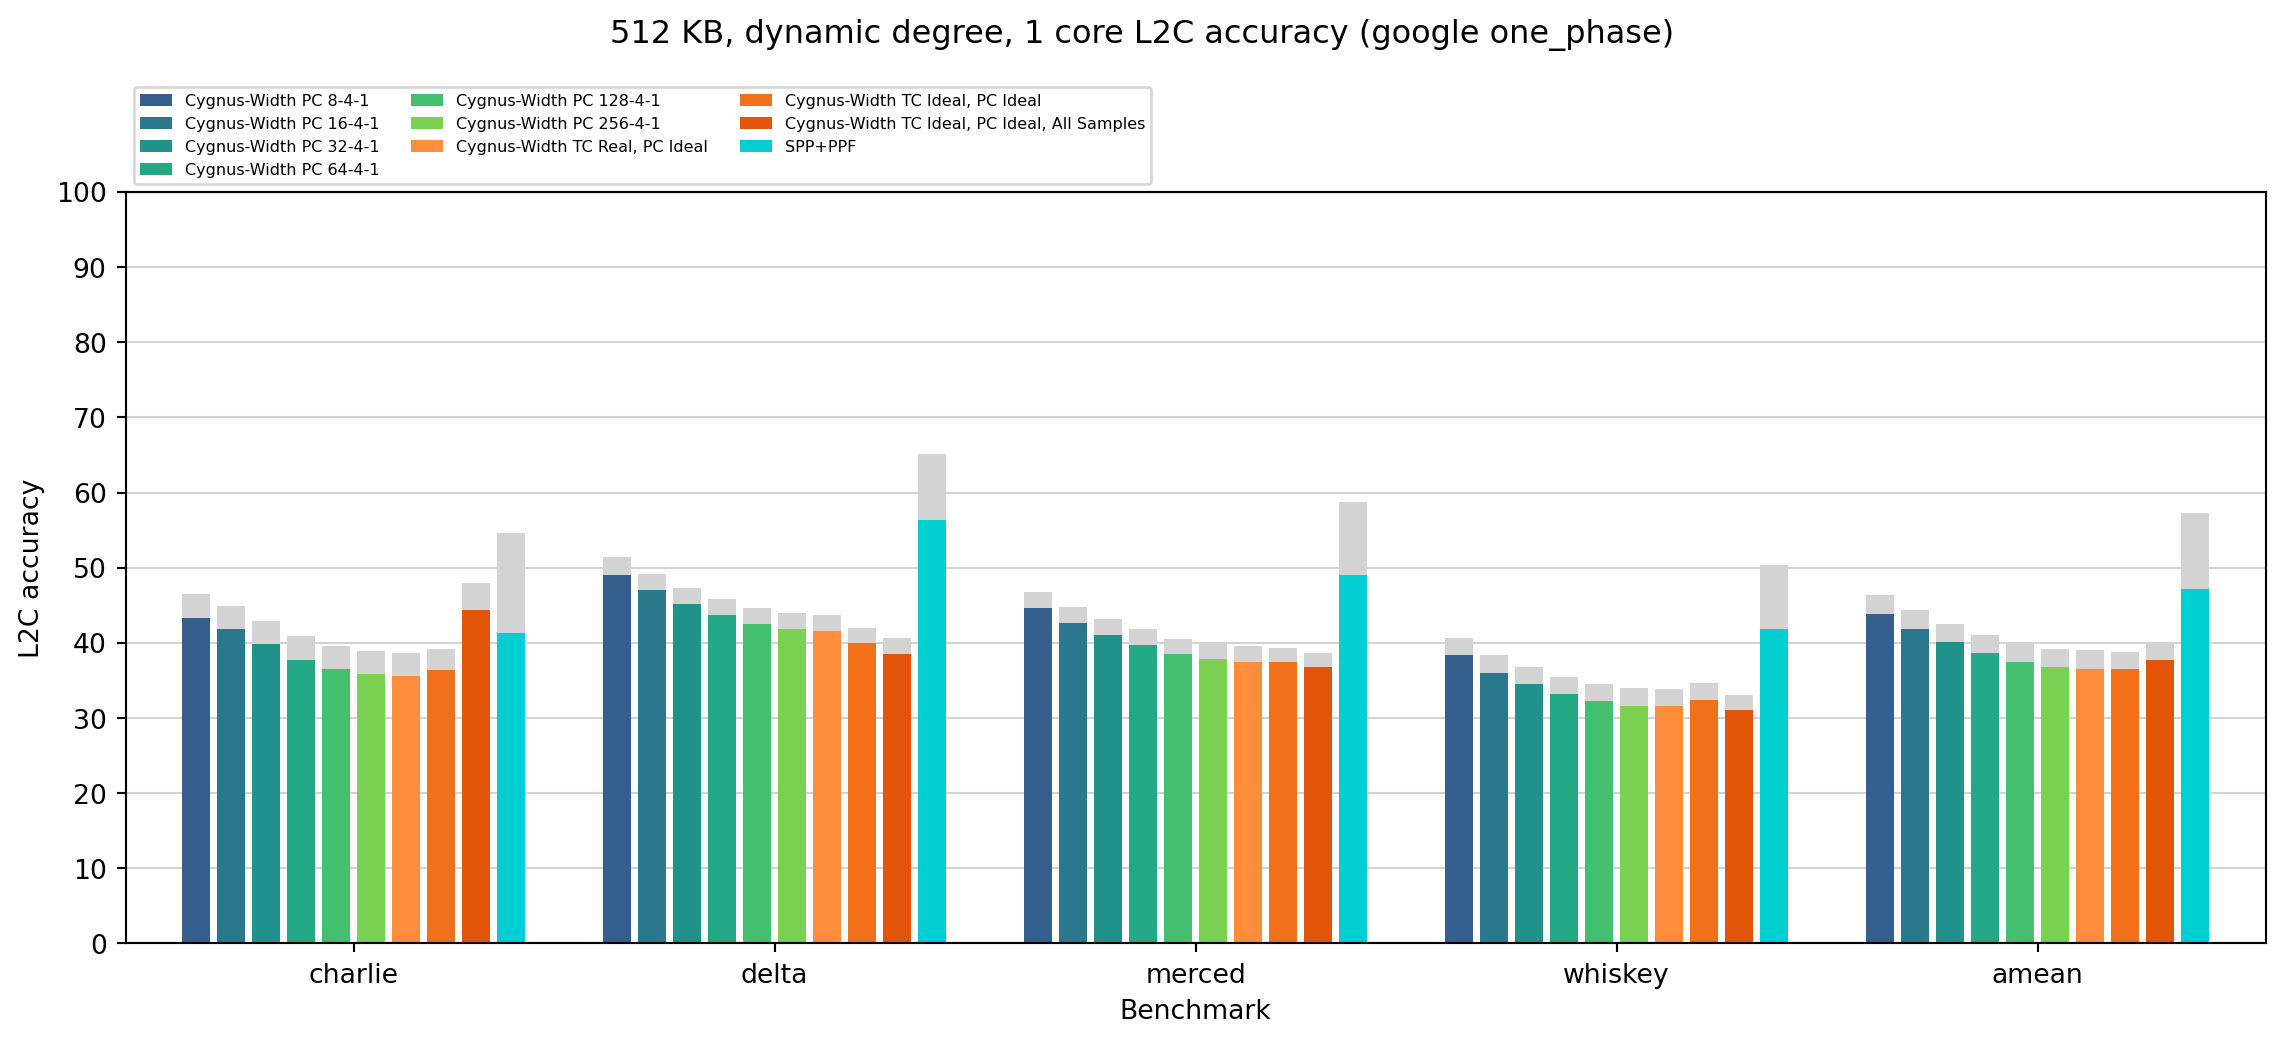

In [35]:
plots.plot_everything_accuracy(degreedyn_1core_pc_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_pc_colors,
                               legend_kwargs=degreedyn_1core_pc_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_pc_suptitle)

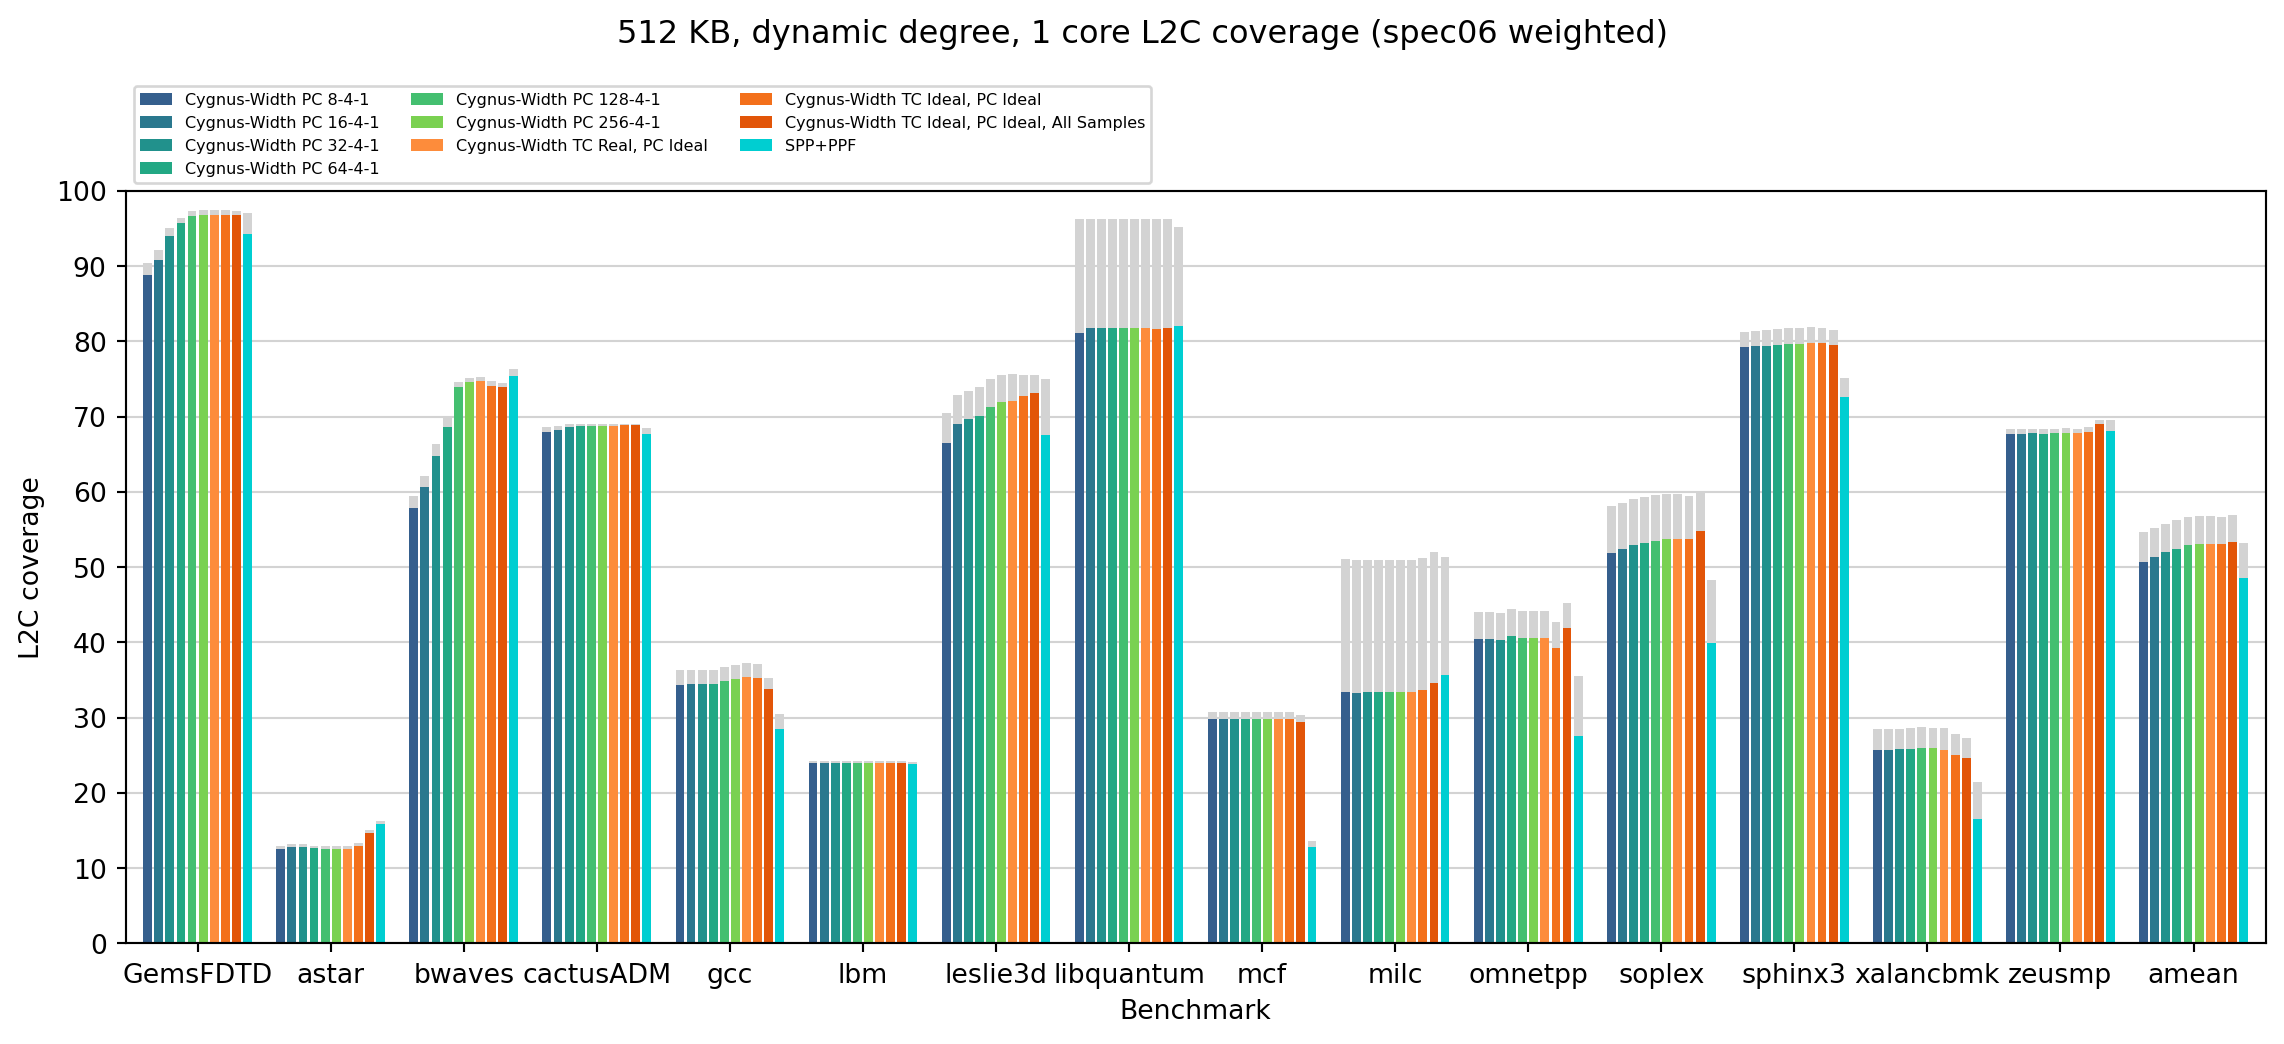

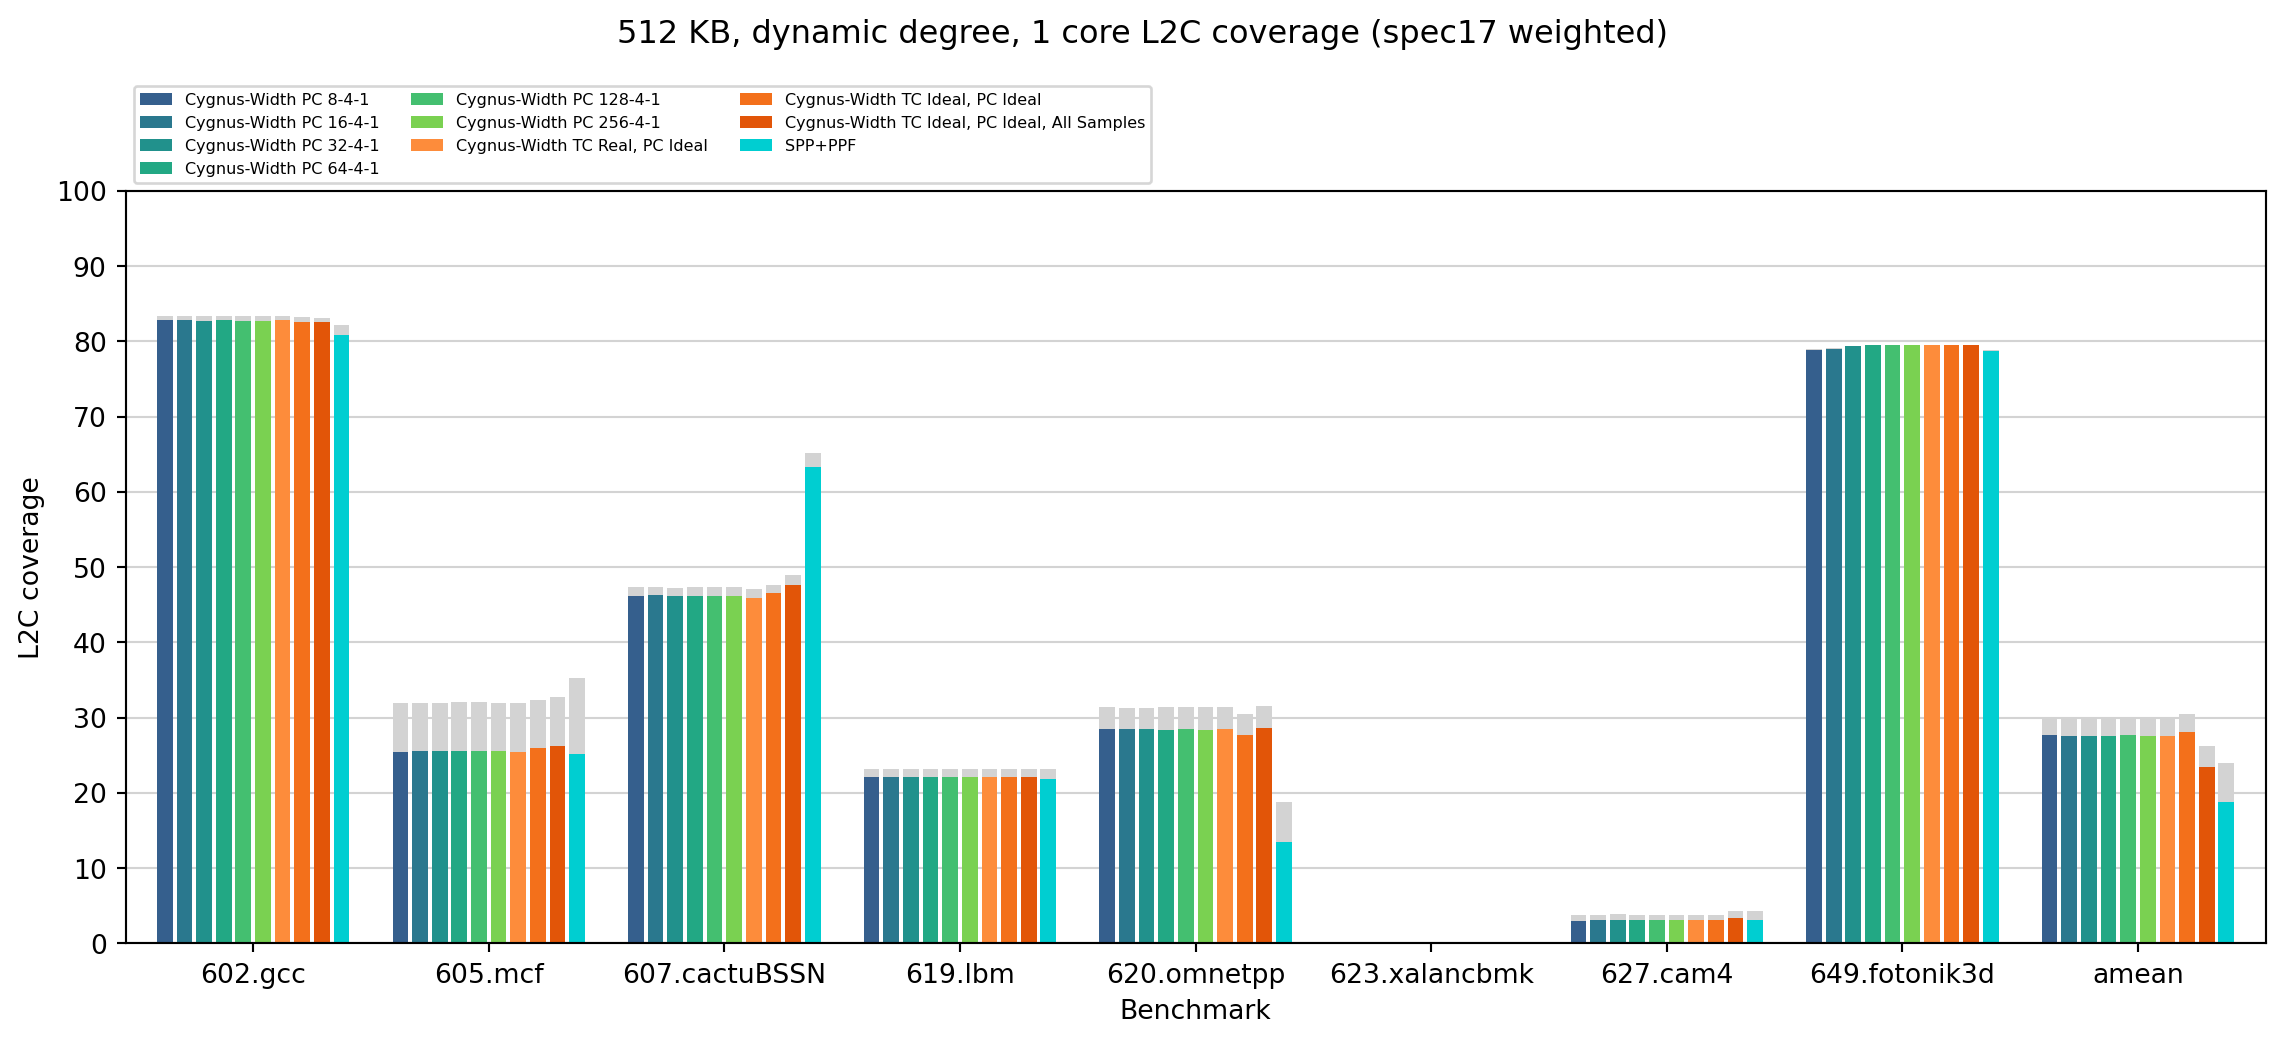

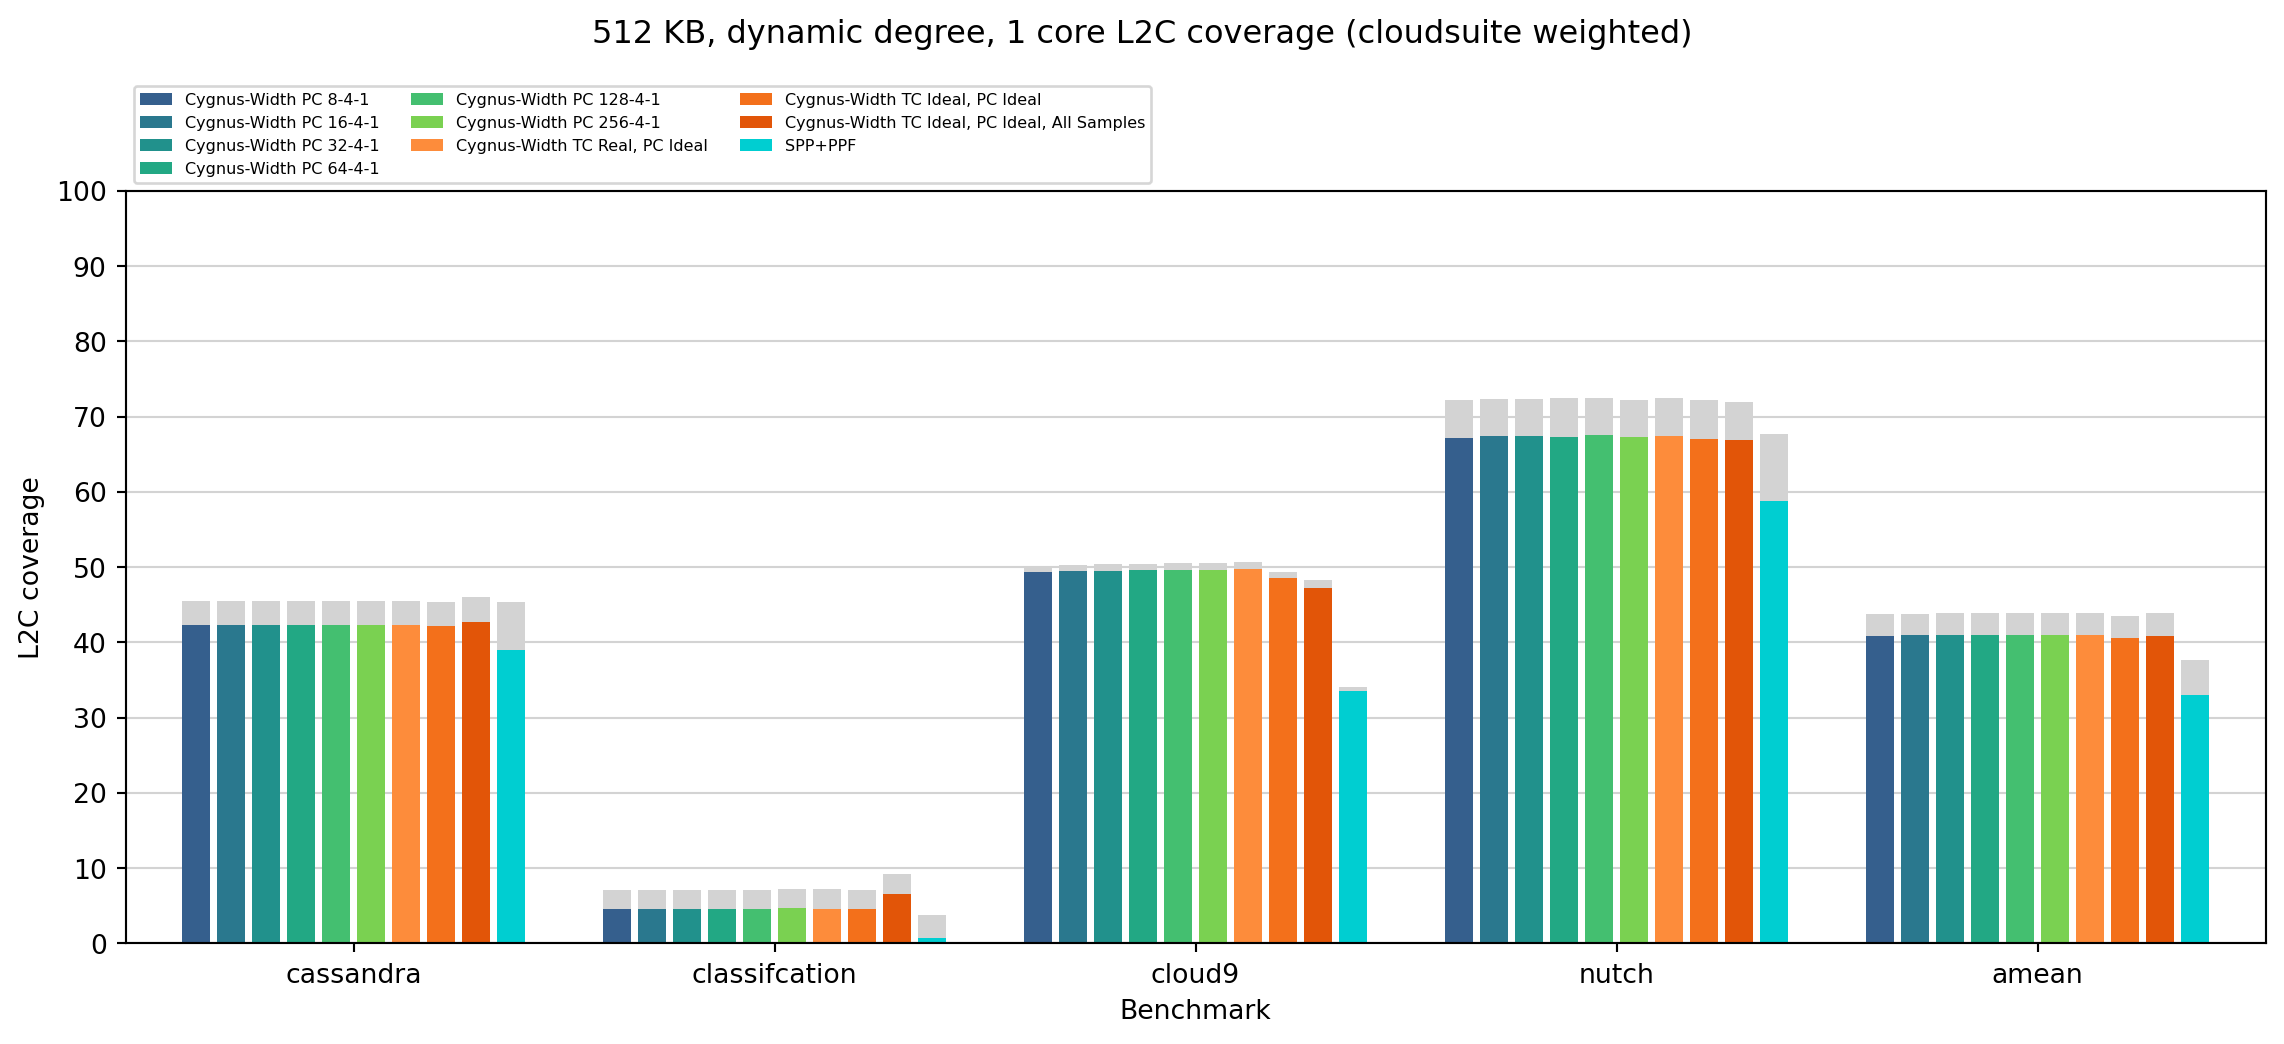

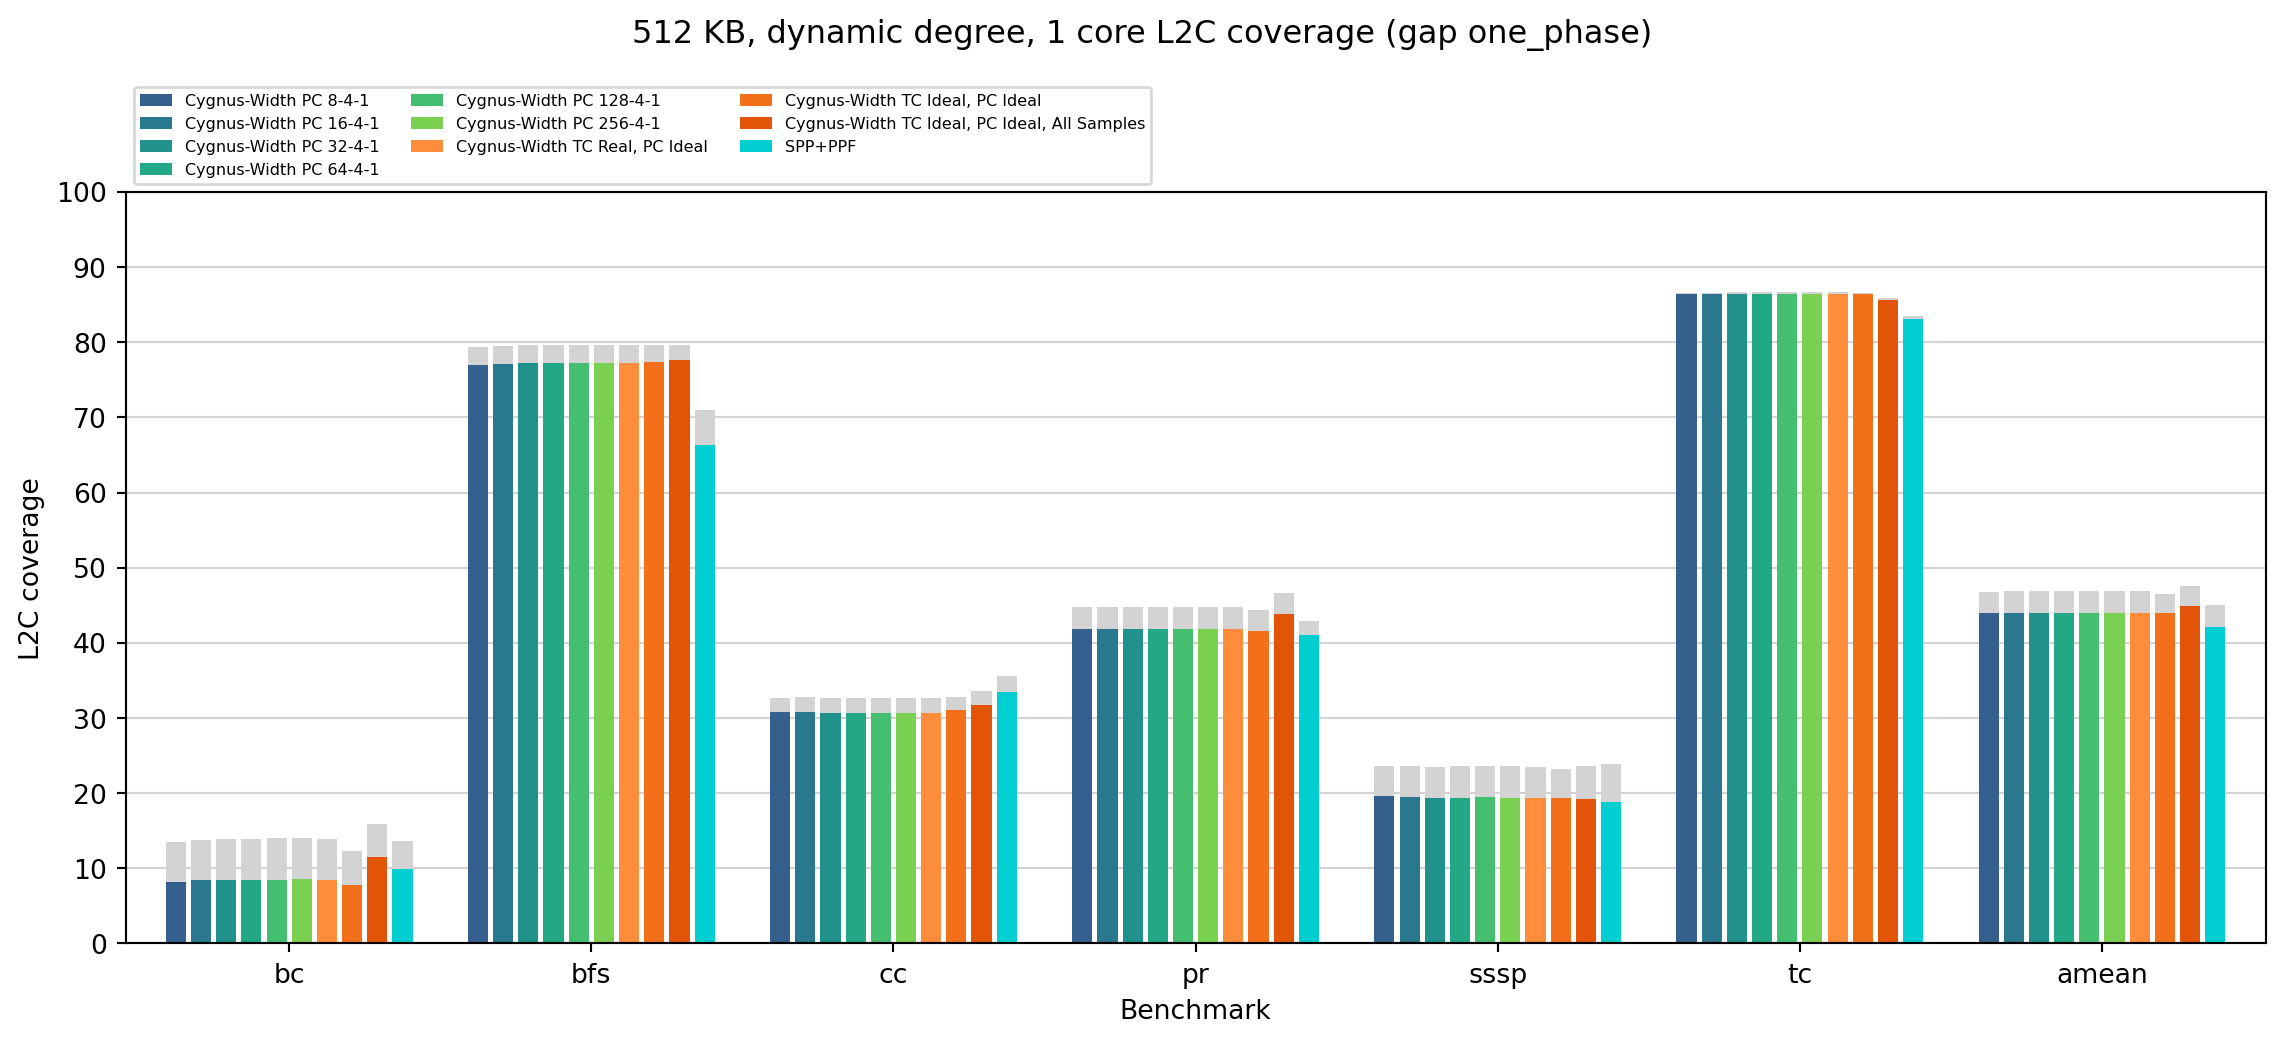

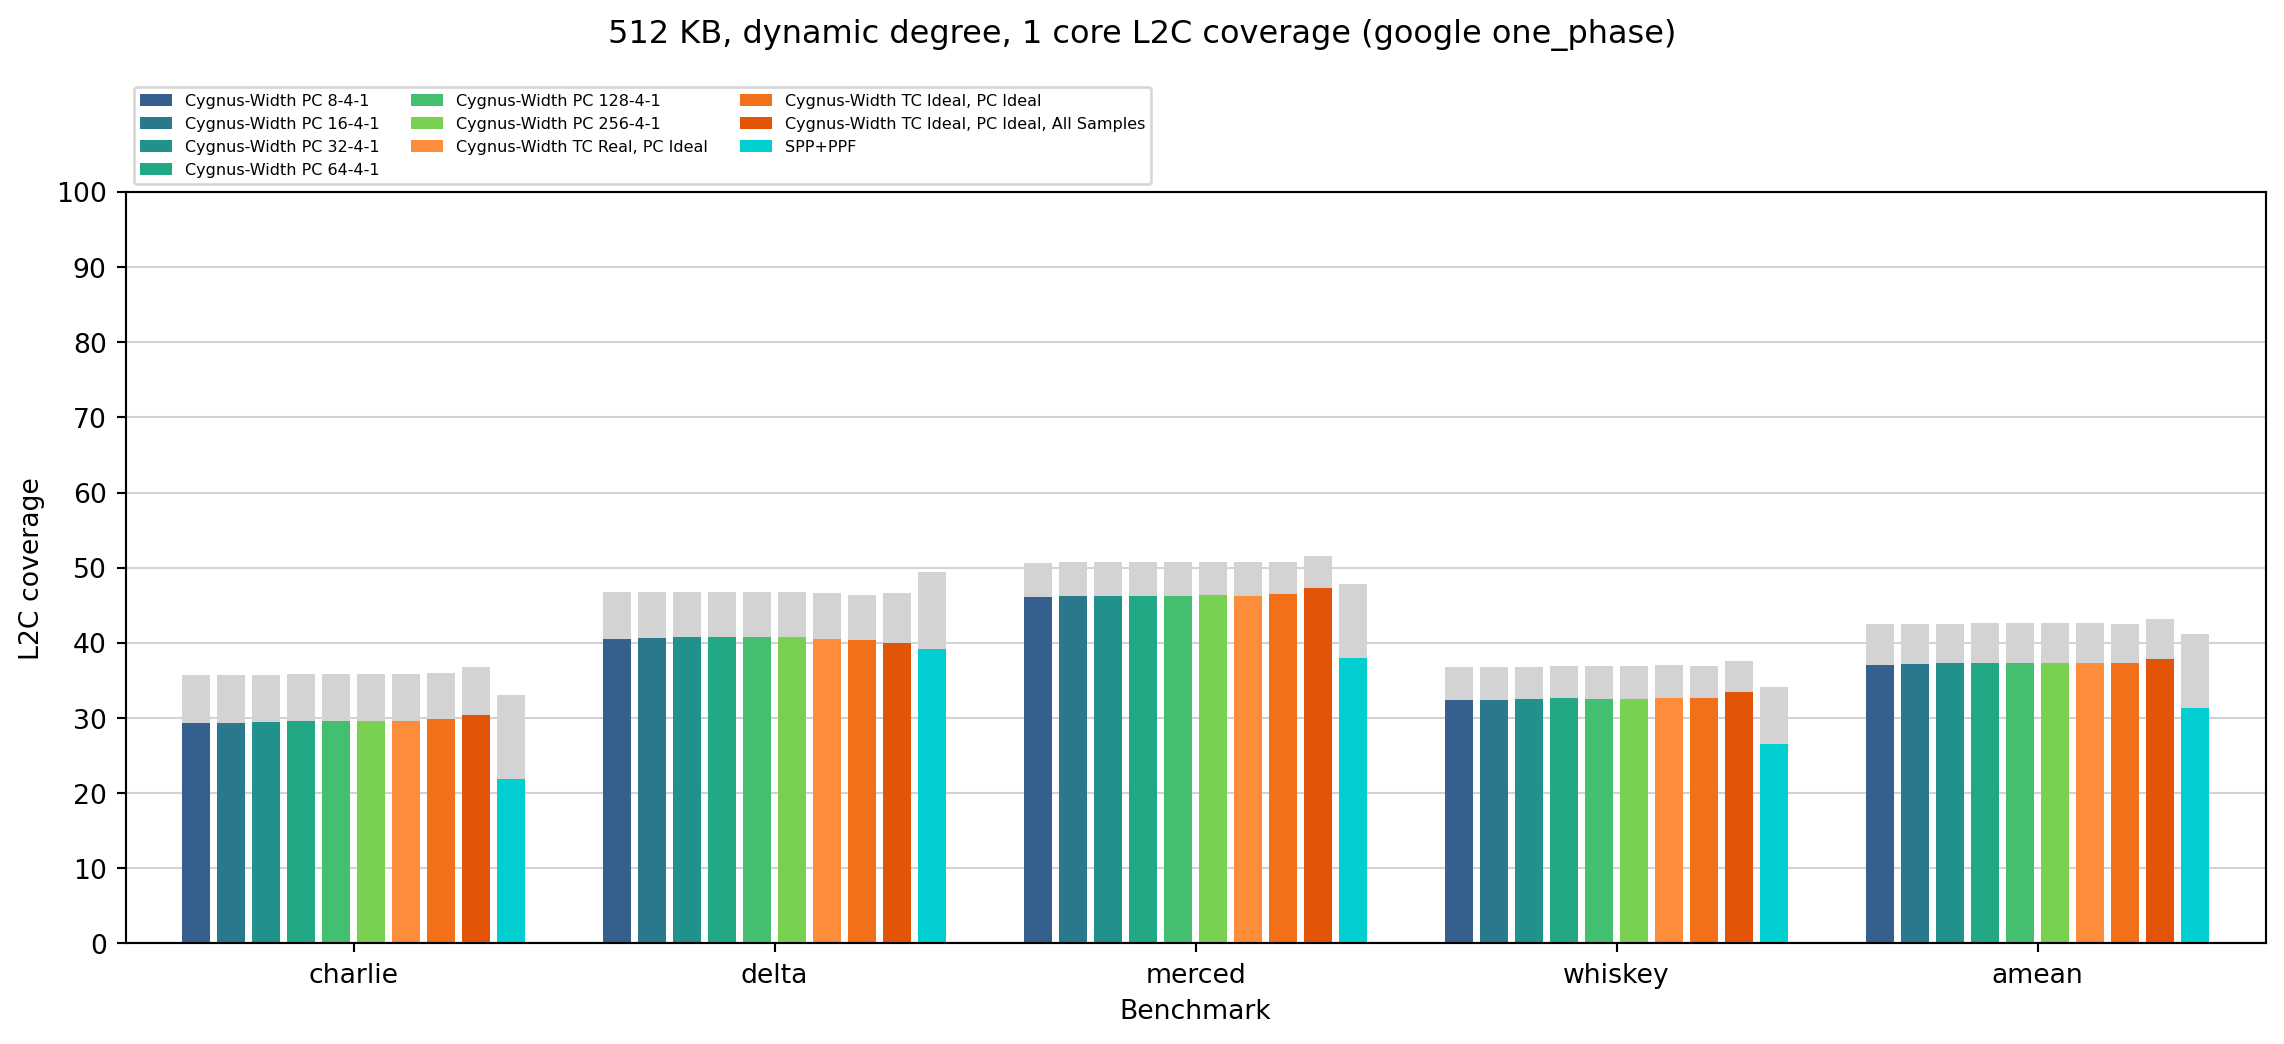

In [34]:
plots.plot_everything_coverage(degreedyn_1core_pc_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_pc_colors,
                               legend_kwargs=degreedyn_1core_pc_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_pc_suptitle)

## Partial Tags

In [12]:
feature = 'Delta_Path, PC_Delta'
cygnus_feature = 'PC'
degreedyn_1core_config = 'bwaware3'

degreedyn_1core_tag_df = {
    #'1': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/1bits'][feature],
    '2': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/2bits'][feature],
    '4': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/4bits'][feature],
    '6': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/6bits'][feature],
    '8': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/8bits'][feature],
    '10': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/10bits'][feature],
    '12': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/12bits'][feature],
    '14': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/14bits'][feature],
    '16': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/16bits'][feature],
    '18': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/18bits'][feature],
    '20': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_tagbits/20bits'][feature],
    'All': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_prefetchcache/128set_4way_1triggers'][feature],

    #'TC Real, PC Ideal': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_targetcache/64set_4way_1triggers'][feature],
    'Ideal': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/1random'][feature],
    #'Ideal, Ideal, All Samples': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions'][feature],

    #'SPP+PPF': dfs['degreedyn/baseline']['spp_ppf_dev'],
}

degreedyn_1core_tag_colors = {
    '1': colormaps['viridis'](0.0),
    '2': colormaps['viridis'](0.1),
    '4': colormaps['viridis'](0.2),
    '6': colormaps['viridis'](0.3),
    '8': colormaps['viridis'](0.4),
    '10': colormaps['viridis'](0.5),
    '12': colormaps['viridis'](0.6),
    '14': colormaps['viridis'](0.7),
    '16': colormaps['viridis'](0.8),
    '18': colormaps['viridis'](0.9),
    '20': colormaps['viridis'](1.0),

    'All': colormaps['Oranges'](0.5),
    'TC Real, PC Ideal': colormaps['Oranges'](0.6),
    'Ideal': colormaps['Oranges'](0.7),
    'Ideal, All Samples': colormaps['Oranges'](0.8),

    'SPP+PPF': 'darkturquoise'
}

degreedyn_1core_tag_legend_kwargs = {
    'ncol': 13,
    'fontsize': 8,
    'loc': 'lower center',
    'framealpha': 0.0,
    'bbox_to_anchor': (0.5, 1.0),
}

degreedyn_1core_tag_suptitle = '512 KB, dynamic degree, 1 core'

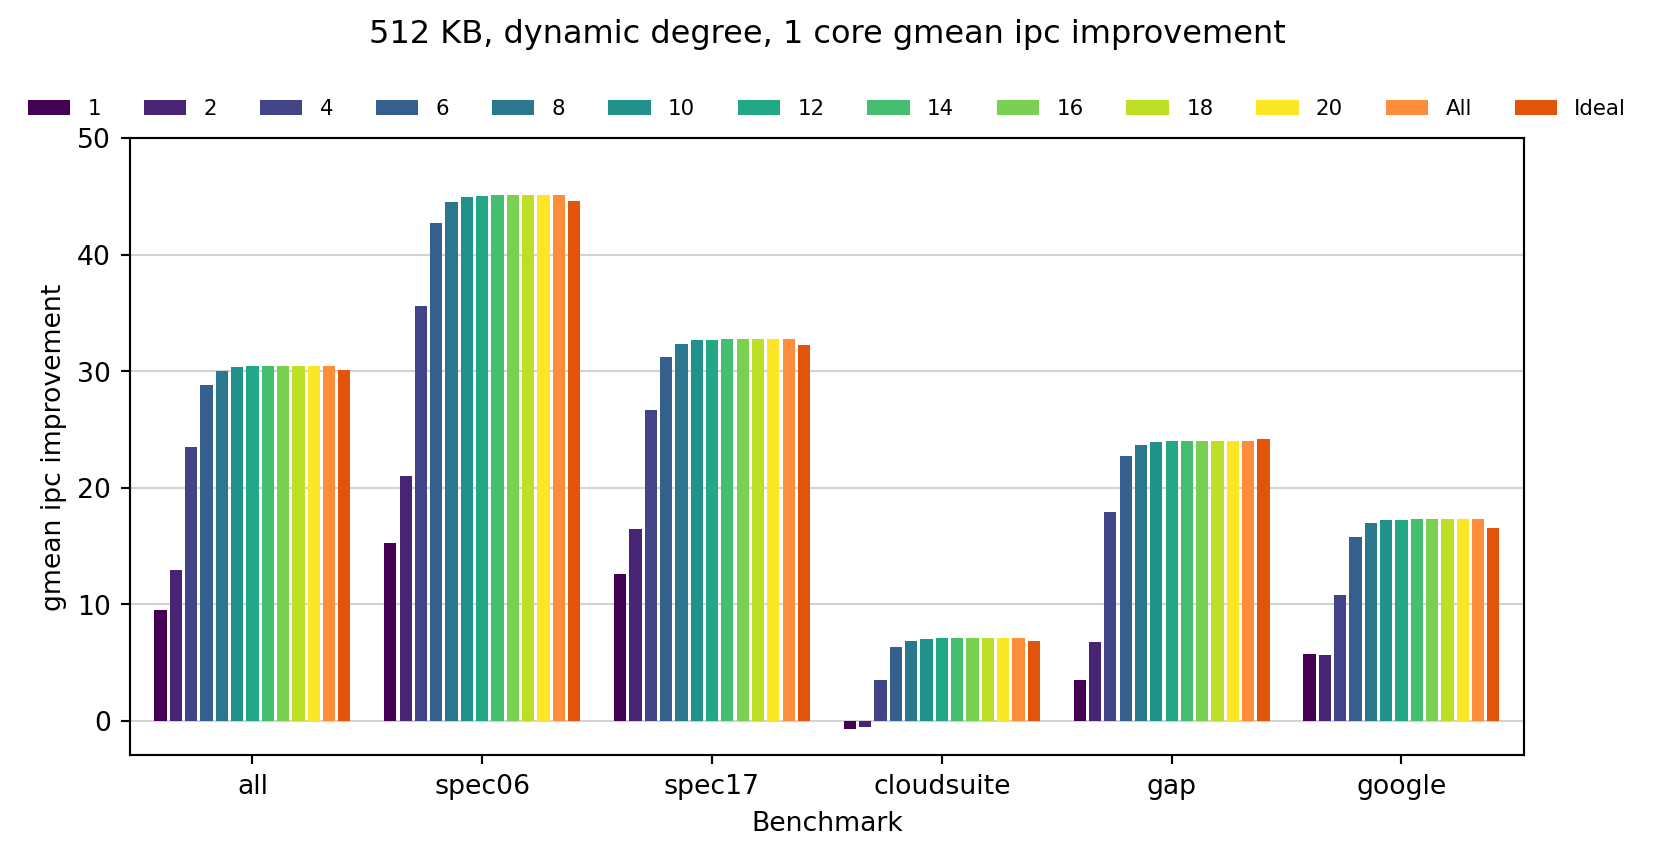

In [22]:
plots.plot_metric_means(degreedyn_1core_tag_df, suites=suites, metric='ipc_improvement', 
                        colors=degreedyn_1core_tag_colors,
                        legend_kwargs=degreedyn_1core_tag_legend_kwargs, 
                        dpi=192, figsize=(9, 4.5),
                        suptitle=degreedyn_1core_tag_suptitle)

In [ ]:
plots.plot_everything(degreedyn_1core_tag_df, suites=suites, metrics=metrics, 
                      colors=degreedyn_1core_tag_colors,
                      legend_kwargs=degreedyn_1core_tag_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_pc_suptitle)

## Summary plot

In [15]:
def estimate_size(sets, tag_bits):
    if sets == 'Ideal':
        return 'Unl'
    if tag_bits == 'All':
        tag_bits = 52

    sets = int(sets)
    tag_bits = int(tag_bits)
    entries = sets * 4
    tag_size = tag_bits * entries
    data_size = 8 * entries
    return f'{(tag_size + data_size) / 8 / 1024:0.2f}'

def plot_summary(tc_df, pc_df, tag_df, dpi=192, figsize=(8, 3)):

    # Collect data for TC
    means_tc = tables.gen_table_metric_all(tc_df, suites, 'ipc_improvement')
    means_tc.index = means_tc.index.str.split().str[0]

    X_tc = np.arange(0, len(means_tc))
    Xlabel_tc = means_tc.index.to_numpy()
    y_tc = means_tc['all'].to_numpy()

    # print(X_tc, Xlabel_tc, y_tc)
    # display(means_tc)

    # Collect data for PC
    means_pc = tables.gen_table_metric_all(pc_df, suites, 'ipc_improvement')
    means_pc.index = means_pc.index.str.split().str[0]

    X_pc = np.arange(0, len(means_pc))
    Xlabel_pc = means_pc.index.to_numpy()
    y_pc = means_pc['all'].to_numpy()

    # display(means_pc)
    # print(X_pc, Xlabel_pc, y_pc)

    # Collect data for Tag bits
    means_tag = tables.gen_table_metric_all(tag_df, suites, 'ipc_improvement')
    means_tag.index = means_tag.index.str.split().str[0]
    means_tag.drop('Ideal', inplace=True)

    X_tag = means_tag.index[:-1].astype(int).to_numpy()
    X_tag = np.append(X_tag, X_tag.max() + 2)
    Xlabel_tag = means_tag.index.to_numpy()
    y_tag = means_tag['all'].to_numpy()

    # display(means_tag)
    # print(X_tag, Xlabel_tag, y_tag)

    # Plot on 3 subfigures
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize, dpi=dpi)

    # Plot TC sweep
    ax1.plot(X_tc, y_tc, color='C0', marker='o')
    ax1.set_xticks(X_tc)
    ax1.set_xticklabels(Xlabel_tc)
    ax1.set_ylim(10, 35.0)
    ax1.set_yticks(np.arange(10, 36, 5))
    ax1.grid(True)
    ax1.set_xlabel('TC sets')
    ax1.set_ylabel('IPC improvement (%)')
    ax1_sec = ax1.secondary_xaxis('top')
    ax1_sec.set_xticks(X_tc)
    ax1_sec.set_xticklabels([estimate_size(x, 52) for x in Xlabel_tc])
    ax1_sec.set_xlabel('TC size (KiB)')
    
    ax1.plot([2], [y_tc[2]], color='red', marker='*', markersize=11)

    # Plot PC sweep
    ax2.plot(X_pc, y_pc, color='C1', marker='o')
    ax2.set_xticks(X_pc)
    ax2.set_xticklabels(Xlabel_pc)
    ax2.set_ylim(10, 35.0)
    ax2.set_yticks(np.arange(10, 36, 5))
    ax2.grid(True)
    ax2.set_xlabel('PC sets')
    ax2_sec = ax2.secondary_xaxis('top')
    ax2_sec.set_xticks(X_pc)
    ax2_sec.set_xticklabels([estimate_size(x, 52) for x in Xlabel_pc])
    ax2_sec.set_xlabel('PC size (KiB)')

    ax2.plot([4], [y_pc[4]], color='red', marker='*', markersize=11)


    # Plot tag sweep
    ax3.plot(X_tag, y_tag, color='C2', marker='o')
    ax3.set_xticks(X_tag)
    ax3.set_xticklabels(Xlabel_tag)
    ax3.set_ylim(10, 35.0)
    ax3.set_yticks(np.arange(10, 36, 5))
    ax3.grid(True)
    ax3.set_xlabel('TC/PC tag bits')
    ax3_sec = ax3.secondary_xaxis('top')
    ax3_sec.set_xticks(X_tag[::2])
    ax3_sec.set_xticklabels([estimate_size(64 + 128, x) for x in Xlabel_tag[::2]])
    ax3_sec.set_xlabel('TC+PC size (KiB)')

    ax3.plot([10], [y_tag[4]], color='red', marker='*', markersize=11)
    

    fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

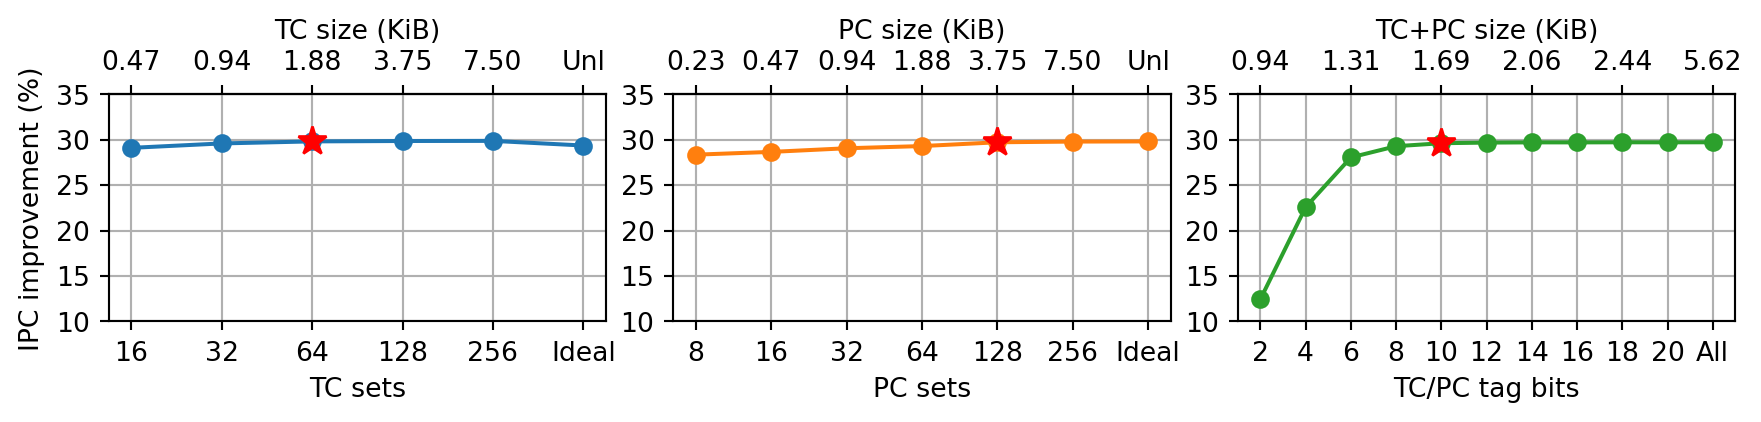

In [17]:
plot_summary(degreedyn_1core_tc_df, degreedyn_1core_pc_df, degreedyn_1core_tag_df,
             dpi=192, figsize=(9, 2))
# plt.savefig('../../cvs/papers/micro-23r/figures/tcpc_sensitivity.pdf')

# Tables

## Target Cache

In [14]:
tables.table_everything(degreedyn_1core_tc_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus-Width TC 16-4-4,Cygnus-Width TC 32-4-4,Cygnus-Width TC 64-4-1*,Cygnus-Width TC 64-4-2,Cygnus-Width TC 64-4-4,Cygnus-Width TC 128-4-2,Cygnus-Width TC 128-4-4,Cygnus-Width TC 256-4-1,Cygnus-Width TC 256-4-4,Cygnus-Width TC Ideal,"Cygnus-Width TC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,,,
GemsFDTD_weighted,134.702150,128.291928,133.842156,128.153721,127.883621,127.310175,127.570906,133.252513,127.288642,127.494157,127.170980,118.789546
astar_weighted,8.596807,8.419621,8.316481,8.316230,8.311794,8.204888,8.223161,8.172157,8.187773,8.166896,7.720892,7.639228
bwaves_weighted,63.093752,60.340302,62.003547,60.505765,60.191773,60.260303,59.609449,61.690020,59.578202,59.491538,58.711319,63.564616
cactusADM_weighted,11.886114,11.895107,11.868548,11.873768,11.884422,11.883447,11.879168,11.865291,11.877050,11.870257,11.916730,11.650472
gcc_weighted,40.997259,40.965852,40.452597,40.281853,40.266403,40.259621,40.062829,40.140905,40.218869,40.137988,39.302438,29.627600
lbm_weighted,38.289860,38.661425,39.379017,38.627141,38.667794,38.643198,38.847189,39.382237,38.847189,38.628239,38.002218,42.309817
leslie3d_weighted,97.230999,97.285592,99.611298,97.695904,97.300244,97.711466,96.954072,100.032437,97.329102,97.311746,98.792981,92.649128
libquantum_weighted,94.982436,95.081129,96.768572,95.265480,95.130935,95.267963,95.142842,96.761075,95.142842,94.964082,95.954018,104.588503
mcf_weighted,31.435465,31.212300,31.213680,31.231830,31.220311,31.253661,31.222487,31.255645,31.219298,31.227088,31.018916,11.104799


=== spec17 weighted ===
ipc_improvement


,Cygnus-Width TC 16-4-4,Cygnus-Width TC 32-4-4,Cygnus-Width TC 64-4-1*,Cygnus-Width TC 64-4-2,Cygnus-Width TC 64-4-4,Cygnus-Width TC 128-4-2,Cygnus-Width TC 128-4-4,Cygnus-Width TC 256-4-1,Cygnus-Width TC 256-4-4,Cygnus-Width TC Ideal,"Cygnus-Width TC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,,,
602.gcc_weighted,68.290331,68.263968,68.301534,68.249851,68.245156,68.239717,68.232874,68.282328,68.227226,68.221110,68.228011,66.652849
605.mcf_weighted,10.839472,11.807414,12.830998,12.504129,12.491357,12.813119,12.789243,13.070787,12.857567,12.899576,13.268983,18.328855
607.cactuBSSN_weighted,7.884595,7.887144,7.879957,7.877974,7.882497,7.880783,7.884062,7.889407,7.888483,7.899378,7.895942,6.632047
619.lbm_weighted,16.986665,16.977588,17.589931,16.962898,17.007697,16.955059,16.995524,17.572288,16.998007,16.957254,16.983171,19.260663
620.omnetpp_weighted,11.794198,11.990111,11.389540,11.425117,11.160919,11.220485,11.147266,11.286905,10.884755,10.889238,10.762488,5.806984
623.xalancbmk_weighted,6.044831,8.070747,11.015468,10.863204,10.823199,11.111041,11.055703,11.286197,11.082441,11.063642,10.830423,8.691203
627.cam4_weighted,1.411134,1.408770,1.400614,1.412071,1.390480,1.438841,1.447219,1.423784,1.419998,1.423173,1.493673,1.375059
649.fotonik3d_weighted,89.893962,89.869173,89.969406,89.917432,89.886698,89.928173,89.876037,89.968767,89.888371,89.892175,89.914630,86.154831
mean,23.394093,23.842294,24.407753,24.255646,24.211758,24.307795,24.288767,24.465076,24.262466,24.262636,24.279175,23.587719


=== cloudsuite weighted ===
ipc_improvement


,Cygnus-Width TC 16-4-4,Cygnus-Width TC 32-4-4,Cygnus-Width TC 64-4-1*,Cygnus-Width TC 64-4-2,Cygnus-Width TC 64-4-4,Cygnus-Width TC 128-4-2,Cygnus-Width TC 128-4-4,Cygnus-Width TC 256-4-1,Cygnus-Width TC 256-4-4,Cygnus-Width TC Ideal,"Cygnus-Width TC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,,,
cassandra_weighted,13.005866,13.424318,14.642327,14.036045,13.866554,14.243158,14.086369,14.857134,14.141894,14.124731,15.268254,15.514123
classifcation_weighted,-6.636340,-6.313637,-5.901248,-5.951452,-5.946486,-5.733461,-5.742632,-5.646434,-5.705491,-5.683223,-4.681805,-3.999108
cloud9_weighted,23.139414,22.518171,21.628199,21.688289,21.622663,20.848253,20.851597,20.701918,20.692295,20.622677,18.881019,11.178424
nutch_weighted,7.276800,7.377678,7.619526,7.468108,7.456909,7.522176,7.436425,7.671294,7.462915,7.459974,7.489013,7.062853
mean,8.653929,8.736229,9.009300,8.825496,8.768969,8.763092,8.702179,8.938803,8.696963,8.682871,8.853031,7.187075


=== gap one_phase ===
ipc_improvement


,Cygnus-Width TC 16-4-4,Cygnus-Width TC 32-4-4,Cygnus-Width TC 64-4-1*,Cygnus-Width TC 64-4-2,Cygnus-Width TC 64-4-4,Cygnus-Width TC 128-4-2,Cygnus-Width TC 128-4-4,Cygnus-Width TC 256-4-1,Cygnus-Width TC 256-4-4,Cygnus-Width TC Ideal,"Cygnus-Width TC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,,,
bc,33.792855,32.475221,31.789400,31.885124,31.835271,31.603318,31.581854,31.587393,31.517807,31.577180,31.629110,26.196724
bfs,55.140004,55.109090,54.293046,54.680855,54.760914,54.441670,54.376078,53.449458,54.393714,54.360026,53.600460,42.117789
cc,51.241748,51.330732,51.285687,51.250915,51.233055,51.215037,51.172204,51.271462,51.198441,51.186745,51.373880,49.662003
pr,2.852495,2.649233,2.416245,2.437535,2.436330,2.365229,2.363622,2.336708,2.351571,2.358801,2.505021,2.234675
sssp,26.506648,26.621508,26.933518,26.690285,26.763740,26.904413,26.894019,27.106761,26.917926,26.782104,27.012344,23.849279
tc,26.060951,26.144470,26.303614,26.213602,26.215385,26.268220,26.259054,26.331751,26.258290,26.249378,26.204945,25.818542
mean,31.408319,31.191311,30.987827,31.000564,31.013736,30.945806,30.923080,30.850346,30.920145,30.900183,30.891207,27.401362


=== google one_phase ===
ipc_improvement


,Cygnus-Width TC 16-4-4,Cygnus-Width TC 32-4-4,Cygnus-Width TC 64-4-1*,Cygnus-Width TC 64-4-2,Cygnus-Width TC 64-4-4,Cygnus-Width TC 128-4-2,Cygnus-Width TC 128-4-4,Cygnus-Width TC 256-4-1,Cygnus-Width TC 256-4-4,Cygnus-Width TC Ideal,"Cygnus-Width TC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,,,
charlie,-4.001017,-3.875560,-3.453430,-3.679685,-3.735994,-3.549906,-3.570117,-3.276113,-3.539356,-3.546474,-0.717277,-0.033684
delta,13.686779,14.529872,17.370889,16.112051,15.711103,16.631223,16.232596,18.012928,16.441194,16.452218,16.761198,19.933823
merced,26.374361,26.662845,27.481808,27.238671,27.098066,27.451006,27.372575,27.728366,27.429330,27.484517,27.487797,24.182143
whiskey,1.170243,4.062567,7.246987,6.582118,6.453911,7.369203,7.348434,8.128729,7.535487,7.591669,8.004383,8.835801
mean,8.685621,9.754944,11.566199,10.974875,10.798755,11.387157,11.263523,12.052860,11.383152,11.410338,12.401098,12.825320


In [9]:
tables.table_metric_all(degreedyn_1core_tc_df, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus-Width TC 16-4-4,28.722017,44.539541,23.394093,8.653929,31.408319,8.685621
Cygnus-Width TC 32-4-4,28.922264,44.510942,23.842294,8.736229,31.191311,9.754944
Cygnus-Width TC 64-4-1*,29.627924,45.499711,24.407753,9.009300,30.987827,11.566199
Cygnus-Width TC 64-4-2,29.227070,44.737433,24.255646,8.825496,31.000564,10.974875
Cygnus-Width TC 64-4-4,29.147781,44.620255,24.211758,8.768969,31.013736,10.798755
Cygnus-Width TC 128-4-2,29.286863,44.783418,24.307795,8.763092,30.945806,11.387157
Cygnus-Width TC 128-4-4,29.200526,44.630271,24.288767,8.702179,30.923080,11.263523
Cygnus-Width TC 256-4-1,29.672130,45.513255,24.465076,8.938803,30.850346,12.052860
Cygnus-Width TC 256-4-4,29.224336,44.676282,24.262466,8.696963,30.920145,11.383152
Cygnus-Width TC Ideal,29.202000,44.618492,24.262636,8.682871,30.900183,11.410338


## Prefetch Cache

In [13]:
tables.table_everything(degreedyn_1core_pc_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus-Width PC 8-4-1,Cygnus-Width PC 16-4-1,Cygnus-Width PC 32-4-1,Cygnus-Width PC 64-4-1,Cygnus-Width PC 128-4-1,Cygnus-Width PC 256-4-1,"Cygnus-Width TC Real, PC Ideal","Cygnus-Width TC Ideal, PC Ideal","Cygnus-Width TC Ideal, PC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,
GemsFDTD_weighted,84.208361,93.359539,110.871487,122.006941,132.799972,133.631323,133.842156,127.494157,127.170980,118.789546
astar_weighted,8.305613,8.318024,8.307704,8.297218,8.320332,8.309434,8.316481,8.166896,7.720892,7.639228
bwaves_weighted,41.743968,44.220783,48.467398,50.918186,59.934792,61.964086,62.003547,59.491538,58.711319,63.564616
cactusADM_weighted,11.696685,11.771072,11.878510,11.855348,11.861833,11.875339,11.868548,11.870257,11.916730,11.650472
gcc_weighted,40.133774,40.385362,40.444628,40.431425,40.470973,40.452199,40.452597,40.137988,39.302438,29.627600
lbm_weighted,40.146338,39.325866,39.314778,39.157745,39.290468,39.414974,39.379017,38.628239,38.002218,42.309817
leslie3d_weighted,80.190508,84.271890,87.196943,89.663007,94.664328,98.935807,99.611298,97.311746,98.792981,92.649128
libquantum_weighted,97.435849,96.338356,96.721342,96.811572,96.768572,96.768572,96.768572,94.964082,95.954018,104.588503
mcf_weighted,31.221931,31.260244,31.233374,31.217026,31.213491,31.219316,31.213680,31.227088,31.018916,11.104799


=== spec17 weighted ===
ipc_improvement


,Cygnus-Width PC 8-4-1,Cygnus-Width PC 16-4-1,Cygnus-Width PC 32-4-1,Cygnus-Width PC 64-4-1,Cygnus-Width PC 128-4-1,Cygnus-Width PC 256-4-1,"Cygnus-Width TC Real, PC Ideal","Cygnus-Width TC Ideal, PC Ideal","Cygnus-Width TC Ideal, PC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,
602.gcc_weighted,68.311961,68.311258,68.315893,68.311479,68.313402,68.306756,68.301534,68.221110,68.228011,66.652849
605.mcf_weighted,13.100401,12.853294,12.875847,12.831679,12.851946,12.830760,12.830998,12.899576,13.268983,18.328855
607.cactuBSSN_weighted,7.876820,7.877280,7.882502,7.880677,7.877226,7.881939,7.879957,7.899378,7.895942,6.632047
619.lbm_weighted,17.874573,17.513068,17.638575,17.450441,17.539005,17.526539,17.589931,16.957254,16.983171,19.260663
620.omnetpp_weighted,11.359639,11.361653,11.326801,11.315515,11.273970,11.404961,11.389540,10.889238,10.762488,5.806984
623.xalancbmk_weighted,11.059408,11.047452,11.056072,11.031603,11.035181,11.029413,11.015468,11.063642,10.830423,8.691203
627.cam4_weighted,1.379426,1.410759,1.410992,1.396496,1.397289,1.414008,1.400614,1.423173,1.493673,1.375059
649.fotonik3d_weighted,85.386268,86.234374,89.015684,89.918643,89.955268,89.952102,89.969406,89.892175,89.914630,86.154831
mean,24.102275,24.094908,24.342323,24.377549,24.389558,24.404846,24.407753,24.262636,24.279175,23.587719


=== cloudsuite weighted ===
ipc_improvement


,Cygnus-Width PC 8-4-1,Cygnus-Width PC 16-4-1,Cygnus-Width PC 32-4-1,Cygnus-Width PC 64-4-1,Cygnus-Width PC 128-4-1,Cygnus-Width PC 256-4-1,"Cygnus-Width TC Real, PC Ideal","Cygnus-Width TC Ideal, PC Ideal","Cygnus-Width TC Ideal, PC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,
cassandra_weighted,14.707021,14.658848,14.654728,14.646855,14.627359,14.645988,14.642327,14.124731,15.268254,15.514123
classifcation_weighted,-5.859920,-5.882107,-5.881598,-5.892967,-5.904159,-5.925319,-5.901248,-5.683223,-4.681805,-3.999108
cloud9_weighted,21.460411,21.539182,21.572624,21.611592,21.652780,21.657929,21.628199,20.622677,18.881019,11.178424
nutch_weighted,7.695286,7.663239,7.654133,7.655623,7.639576,7.626508,7.619526,7.459974,7.489013,7.062853
mean,9.018198,9.009885,9.014245,9.018193,9.015483,9.011627,9.009300,8.682871,8.853031,7.187075


=== gap one_phase ===
ipc_improvement


,Cygnus-Width PC 8-4-1,Cygnus-Width PC 16-4-1,Cygnus-Width PC 32-4-1,Cygnus-Width PC 64-4-1,Cygnus-Width PC 128-4-1,Cygnus-Width PC 256-4-1,"Cygnus-Width TC Real, PC Ideal","Cygnus-Width TC Ideal, PC Ideal","Cygnus-Width TC Ideal, PC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,
bc,31.821943,31.820731,31.802383,31.796670,31.794074,31.770878,31.789400,31.577180,31.629110,26.196724
bfs,53.912371,54.345362,54.404217,54.422448,54.413729,54.232606,54.293046,54.360026,53.600460,42.117789
cc,51.249334,51.277626,51.288531,51.269249,51.285370,51.279680,51.285687,51.186745,51.373880,49.662003
pr,2.411826,2.419057,2.415040,2.423476,2.424279,2.420664,2.416245,2.358801,2.505021,2.234675
sssp,26.982373,26.963662,26.894712,26.957426,26.977695,26.980120,26.933518,26.782104,27.012344,23.849279
tc,26.275095,26.284644,26.284262,26.279679,26.288464,26.283753,26.303614,26.249378,26.204945,25.818542
mean,30.936580,31.001759,30.995835,31.006477,31.012317,30.980861,30.987827,30.900183,30.891207,27.401362


=== google one_phase ===
ipc_improvement


,Cygnus-Width PC 8-4-1,Cygnus-Width PC 16-4-1,Cygnus-Width PC 32-4-1,Cygnus-Width PC 64-4-1,Cygnus-Width PC 128-4-1,Cygnus-Width PC 256-4-1,"Cygnus-Width TC Real, PC Ideal","Cygnus-Width TC Ideal, PC Ideal","Cygnus-Width TC Ideal, PC Ideal, All Samples",SPP+PPF
run_name,,,,,,,,,,
charlie,-3.161969,-3.253615,-3.293019,-3.374496,-3.339795,-3.418221,-3.453430,-3.546474,-0.717277,-0.033684
delta,17.741954,17.634609,17.553085,17.457780,17.496801,17.453283,17.370889,16.452218,16.761198,19.933823
merced,27.594320,27.595746,27.534570,27.528438,27.522306,27.530292,27.481808,27.484517,27.487797,24.182143
whiskey,7.273214,7.356688,7.398492,7.209975,7.170035,7.252978,7.246987,7.591669,8.004383,8.835801
mean,11.769924,11.740032,11.706769,11.610216,11.617765,11.608114,11.566199,11.410338,12.401098,12.825320


In [12]:
tables.table_metric_all(degreedyn_1core_pc_df, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus-Width PC 8-4-1,27.980963,40.996509,24.102275,9.018198,30.936580,11.769924
Cygnus-Width PC 16-4-1,28.257531,41.759665,24.094908,9.009885,31.001759,11.740032
Cygnus-Width PC 32-4-1,28.757571,43.024015,24.342323,9.014245,30.995835,11.706769
Cygnus-Width PC 64-4-1,29.023756,43.779282,24.377549,9.018193,31.006477,11.610216
Cygnus-Width PC 128-4-1,29.494794,45.101296,24.389558,9.015483,31.012317,11.617765
Cygnus-Width PC 256-4-1,29.607735,45.431615,24.404846,9.011627,30.980861,11.608114
"Cygnus-Width TC Real, PC Ideal",29.627924,45.499711,24.407753,9.009300,30.987827,11.566199
"Cygnus-Width TC Ideal, PC Ideal",29.202000,44.618492,24.262636,8.682871,30.900183,11.410338
"Cygnus-Width TC Ideal, PC Ideal, All Samples",29.502166,45.046141,24.279175,8.853031,30.891207,12.401098
SPP+PPF,27.197318,41.101552,23.587719,7.187075,27.401362,12.825320


## Partial Tags

In [9]:
tables.table_everything(degreedyn_1core_tag_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus-Width 1,Cygnus-Width 2,Cygnus-Width 4,Cygnus-Width 6,Cygnus-Width 8,Cygnus-Width 10,Cygnus-Width 12,Cygnus-Width 14,Cygnus-Width 18,Cygnus-Width 20,Cygnus-Width All,"Cygnus-Width TC Ideal, PC Ideal",SPP+PPF
run_name,,,,,,,,,,,,,
GemsFDTD_weighted,24.576238,41.409589,89.556197,118.717957,129.051087,131.363507,132.390601,132.498687,132.915713,132.790190,132.964726,127.494157,118.789546
astar_weighted,2.109709,3.034253,6.992011,8.233793,8.273720,8.303986,8.306080,8.300986,8.303696,8.309292,8.312285,8.166896,7.639228
bwaves_weighted,21.222566,31.157218,47.630096,55.965656,58.894794,59.766036,59.843580,59.933439,60.016141,59.857687,59.864055,59.491538,63.564616
cactusADM_weighted,4.056334,6.310437,10.716294,11.650211,11.798733,11.865619,11.864144,11.875264,11.875454,11.878010,11.878010,11.870257,11.650472
gcc_weighted,8.830678,13.930909,30.142897,37.763532,39.396612,39.751524,39.795328,39.830423,39.874938,39.870016,39.870016,40.137988,29.627600
lbm_weighted,19.521341,26.474641,35.127647,38.034426,38.865427,39.240401,39.322721,39.295272,39.182178,39.182178,39.182178,38.628239,42.309817
leslie3d_weighted,25.429750,39.317360,72.599797,88.354139,93.077521,94.515069,94.683770,94.978750,94.909986,94.664375,94.700719,97.311746,92.649128
libquantum_weighted,40.343986,57.244093,82.320567,92.971564,95.389619,96.362625,96.374286,96.738090,96.749678,96.749678,96.749678,94.964082,104.588503
mcf_weighted,6.256873,9.687322,10.115334,26.691022,30.558991,30.944306,31.034861,31.040115,31.055290,31.058217,31.037327,31.227088,11.104799


=== spec17 weighted ===
ipc_improvement


,Cygnus-Width 1,Cygnus-Width 2,Cygnus-Width 4,Cygnus-Width 6,Cygnus-Width 8,Cygnus-Width 10,Cygnus-Width 12,Cygnus-Width 14,Cygnus-Width 18,Cygnus-Width 20,Cygnus-Width All,"Cygnus-Width TC Ideal, PC Ideal",SPP+PPF
run_name,,,,,,,,,,,,,
602.gcc_weighted,24.286322,35.319057,55.794254,65.001926,67.427376,68.052657,68.279116,68.297841,68.310350,68.312366,68.313876,68.221110,66.652849
605.mcf_weighted,-3.208720,-3.960433,1.512135,11.920646,13.067304,13.482931,13.494763,13.484715,13.545150,13.518999,13.540265,12.899576,18.328855
607.cactuBSSN_weighted,4.140824,4.415343,6.556020,7.243101,7.805902,7.842789,7.852553,7.843147,7.848983,7.847706,7.852061,7.899378,6.632047
619.lbm_weighted,9.572654,12.273368,15.735185,17.032676,17.443756,17.404788,17.476420,17.603879,17.514473,17.508973,17.508973,16.957254,19.260663
620.omnetpp_weighted,-0.408993,-0.769778,4.749732,11.138733,11.256688,11.426260,11.402242,11.365966,11.408506,11.285022,11.394728,10.889238,5.806984
623.xalancbmk_weighted,-0.791678,-3.554418,-1.974241,7.845967,10.615106,10.942607,10.997894,11.027005,11.040408,11.057869,11.052755,11.063642,8.691203
627.cam4_weighted,0.599960,0.848404,1.231386,1.356792,1.377898,1.386662,1.410440,1.438882,1.403113,1.403113,1.403113,1.423173,1.375059
649.fotonik3d_weighted,27.357760,43.126692,73.220957,85.163605,88.580603,89.592844,89.873828,89.925826,89.960440,89.961492,89.961492,89.892175,86.154831
mean,7.151135,9.747787,17.001167,22.926126,24.137246,24.406391,24.470935,24.494442,24.498060,24.479025,24.497324,24.262636,23.587719


=== cloudsuite weighted ===
ipc_improvement


,Cygnus-Width 1,Cygnus-Width 2,Cygnus-Width 4,Cygnus-Width 6,Cygnus-Width 8,Cygnus-Width 10,Cygnus-Width 12,Cygnus-Width 14,Cygnus-Width 18,Cygnus-Width 20,Cygnus-Width All,"Cygnus-Width TC Ideal, PC Ideal",SPP+PPF
run_name,,,,,,,,,,,,,
cassandra_weighted,0.727750,1.635093,7.800941,13.240294,14.335110,14.629055,14.691892,14.681547,14.724870,14.710910,14.687093,14.124731,15.514123
classifcation_weighted,-7.641903,-9.276356,-12.743591,-6.364743,-6.026355,-5.916466,-5.888465,-5.891883,-5.891254,-5.888986,-5.890016,-5.683223,-3.999108
cloud9_weighted,4.572588,7.490757,20.327824,21.379362,21.525929,21.558869,21.530988,21.565939,21.574282,21.561023,21.572380,20.622677,11.178424
nutch_weighted,2.665270,3.729056,6.037992,7.232313,7.528842,7.616789,7.631688,7.636987,7.636845,7.638707,7.639855,7.459974,7.062853
mean,-0.030762,0.695237,4.667502,8.387133,8.854127,8.985508,9.006072,9.011802,9.024112,9.018951,9.015830,8.682871,7.187075


=== gap one_phase ===
ipc_improvement


,Cygnus-Width 1,Cygnus-Width 2,Cygnus-Width 4,Cygnus-Width 6,Cygnus-Width 8,Cygnus-Width 10,Cygnus-Width 12,Cygnus-Width 14,Cygnus-Width 18,Cygnus-Width 20,Cygnus-Width All,"Cygnus-Width TC Ideal, PC Ideal",SPP+PPF
run_name,,,,,,,,,,,,,
bc,8.847641,12.171846,27.689535,30.920613,31.643823,31.659748,31.721026,31.707351,31.671346,31.764993,31.683463,31.577180,26.196724
bfs,7.276024,13.480768,36.708479,49.300874,52.757070,53.599865,53.932584,53.904445,53.977766,53.977766,53.912966,54.360026,42.117789
cc,20.311776,28.477929,41.483364,50.093331,51.013834,51.219778,51.261504,51.278890,51.287583,51.287583,51.287583,51.186745,49.662003
pr,1.368201,1.643368,1.648590,2.412630,2.434322,2.419860,2.425484,2.418655,2.423476,2.424279,2.424279,2.358801,2.234675
sssp,6.746589,9.547923,20.709775,25.360301,26.396986,26.715232,26.865261,26.866646,26.837542,26.844645,26.785222,26.782104,23.849279
tc,-1.237378,1.198929,16.415792,23.670986,25.598160,26.115060,26.239447,26.277387,26.296739,26.283498,26.288464,26.249378,25.818542
mean,7.007208,10.725835,23.382047,29.231641,30.496042,30.789256,30.901106,30.902700,30.907744,30.922362,30.890309,30.900183,27.401362


=== google one_phase ===
ipc_improvement


,Cygnus-Width 1,Cygnus-Width 2,Cygnus-Width 4,Cygnus-Width 6,Cygnus-Width 8,Cygnus-Width 10,Cygnus-Width 12,Cygnus-Width 14,Cygnus-Width 18,Cygnus-Width 20,Cygnus-Width All,"Cygnus-Width TC Ideal, PC Ideal",SPP+PPF
run_name,,,,,,,,,,,,,
charlie,-3.007404,-4.580635,-5.209571,-3.639391,-3.440465,-3.257936,-3.281833,-3.327084,-3.295942,-3.274206,-3.281070,-3.546474,-0.033684
delta,0.360186,-0.696292,6.720958,14.811000,17.034783,17.686396,17.841901,17.837984,17.827830,17.809988,17.809988,16.452218,19.933823
merced,2.827938,5.322615,18.494894,25.575506,27.042166,27.492218,27.600167,27.544267,27.624837,27.632680,27.659775,27.484517,24.182143
whiskey,-4.139519,-6.755857,-3.859006,5.517583,7.204916,7.486627,7.608577,7.682466,7.652511,7.643325,7.681268,7.591669,8.835801
mean,-1.027921,-1.783083,3.610939,10.034330,11.382812,11.762197,11.847552,11.840478,11.856953,11.858335,11.872143,11.410338,12.825320


In [8]:
tables.table_metric_all(degreedyn_1core_tag_df, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus-Width 1,7.312464,12.492807,7.151135,-0.030762,7.007208,-1.027921
Cygnus-Width 2,10.801759,18.764927,9.747787,0.695237,10.725835,-1.783083
Cygnus-Width 4,21.020083,33.759463,17.001167,4.667502,23.382047,3.610939
Cygnus-Width 6,27.542658,42.091893,22.926126,8.387133,29.231641,10.034330
Cygnus-Width 8,28.986084,44.196715,24.137246,8.854127,30.496042,11.382812
Cygnus-Width 10,29.345710,44.730028,24.406391,8.985508,30.789256,11.762197
Cygnus-Width 12,29.427967,44.835069,24.470935,9.006072,30.901106,11.847552
Cygnus-Width 14,29.454933,44.896133,24.494442,9.011802,30.902700,11.840478
Cygnus-Width 18,29.473952,44.934440,24.498060,9.024112,30.907744,11.856953
Cygnus-Width 20,29.461562,44.906460,24.479025,9.018951,30.922362,11.858335
